 Problem Statement
---------------------------

- Description

`The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Prediction :
----------------    

- Primary Fuel
-  Capacity_mw

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Global_PowerPlant.csv")

In [4]:
df.head(5,)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
pd.set_option('display.max_columns', 27)

In [6]:
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [7]:
df.tail(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,NaN,NaN,iEnergy Wind Farms,CDM,https://cdm.unfccc.int/Projects/DB/RWTUV134503...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.size

24489

In [9]:
df.shape

(907, 27)

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

# Observation:

- 15 Float variable
- 12 Object Variable

size=191kb

# Checking Null Values

In [12]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

# Visualization on missing value

<AxesSubplot:>

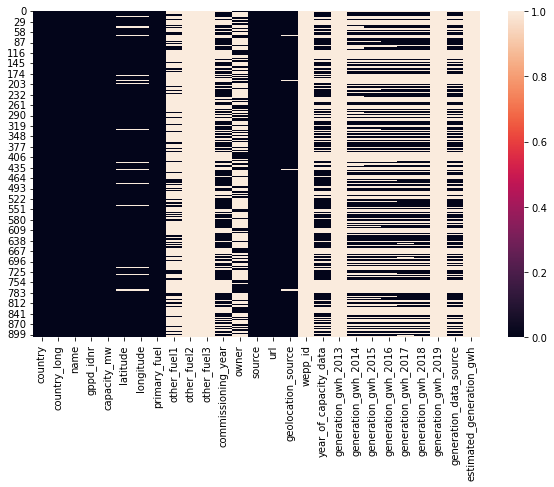

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

### Observation Shows:

- latitude                     46
- longitude                    46
- commissioning_year          380
- year_of_capacity_data       388
- geolocation_source           19
`Approx 50 to 70 percentage value missing

- generation_data_source      458
- generation_gwh_2014         509
- generation_gwh_2015         485
- generation_gwh_2016         473
- generation_gwh_2017         467
- generation_gwh_2018         459
- generation_data_source      458
- owner                       565
- other_fuel1                 709

`Total 90 to 100 percentage data is Empty in Columns

- estimated_generation_gwh    907
- wepp_id                     907
- generation_gwh_2013         907
- other_fuel2                 906
- other_fuel3                 907
- generation_gwh_2019         907

# Checking Unique Values

In [14]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [15]:
df['country'].unique()

array(['IND'], dtype=object)

In [16]:
df['country_long'].unique()

array(['India'], dtype=object)

In [17]:
df['name'].unique()

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

In [18]:
df['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000019',
       'WRI1019905', 'IND0000020', 'IND0000021', 'IND0000022',
       'IND0000023', 'IND0000025', 'IND0000024', 'WRI1019941',
       'WRI1019882', 'IND0000026', 'IND0000027', 'IND0000028',
       'IND0000029', 'IND0000030', 'IND0000031', 'IND0000032',
       'WRI1019883', 'IND0000033', 'IND0000034', 'IND0000035',
       'IND0000036', 'IND0000037', 'IND0000038', 'IND00

In [19]:
df['capacity_mw'].is_unique

False

In [20]:
df['latitude'].unique()

array([28.1839, 24.7663, 21.9038, 23.8712, 21.9603, 23.7689, 10.4547,
       32.2258, 16.33  , 23.1642, 21.0782, 31.2717, 24.2007, 31.2412,
           nan, 24.201 , 25.1797, 23.0666, 23.0655, 18.0845, 19.5867,
       16.7708, 26.6282, 21.7438, 19.7881, 28.3615, 14.5751, 14.9455,
       18.858 , 10.7245, 14.4791, 27.3473, 27.36  , 27.3632, 27.3661,
       27.3537, 27.3504, 27.3566, 28.506 , 16.2804, 33.1815, 32.8063,
       23.8285, 18.1396, 19.8601, 24.6929, 22.3421, 22.9956, 32.1686,
       24.1917, 24.223 , 23.6026, 21.9114, 23.807 , 25.3999, 22.9417,
       25.4865, 28.4723, 27.8453, 13.1021, 31.4306, 31.9546, 17.3816,
       20.805 , 16.6505, 16.2774, 15.1831, 15.1777, 15.1932, 13.7008,
       13.8274, 31.4107, 21.232 , 21.0813, 19.5555, 18.1012, 19.5132,
       21.5837, 11.331 , 11.2428, 11.3842, 18.2416, 21.184 , 18.455 ,
       18.4426, 18.9368, 21.0483, 25.2267, 24.2508, 23.3172, 24.8263,
       22.0103, 32.1121, 23.3256, 23.6783, 23.785 , 26.5145, 21.2083,
        9.9975, 10.0

- Shows nan Value

In [21]:
df['longitude'].unique()

array([73.2407, 74.609 , 69.3732, 91.3602, 82.4091, 68.6447, 77.0078,
       77.207 , 75.8863, 81.6373, 77.9009, 76.4938, 82.8   , 77.8769,
           nan, 82.7891, 76.3188, 81.7841, 81.7865, 76.1851, 74.7061,
       74.9191, 79.5286, 83.2741, 79.1518, 74.2402, 76.3926, 77.687 ,
       73.6396, 77.1893, 76.3482, 71.6917, 71.6918, 71.6916, 77.3066,
       75.225 , 75.3155, 76.1418, 87.4513, 82.1221, 79.3421, 74.689 ,
       82.4305, 88.4042, 76.4695, 81.2875, 81.2747, 74.2562, 83.1889,
       91.565 , 86.0218, 79.925 , 85.7452, 79.8066, 73.2   , 80.2682,
       78.241 , 76.7986, 74.5345, 79.0547, 74.8209, 74.7111, 76.7909,
       77.1036, 76.7195, 75.6373, 75.7131, 76.4328, 79.6311, 79.7708,
       73.8087, 73.7252, 73.4173, 72.2222, 77.758 , 77.8659, 77.7145,
       74.7529, 81.4237, 73.3907, 73.3498, 73.4527, 75.8425, 74.6216,
       78.1606, 78.1336, 73.0901, 83.2058, 76.6537, 81.0333, 86.0888,
       85.88  , 90.5287, 74.1543, 76.3744, 88.14  , 76.532 , 78.9535,
       78.9333, 76.1

- Shows nan Values

In [22]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [23]:
df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

- Shows nan Values

In [24]:
df['other_fuel2'].unique()

array([nan, 'Oil'], dtype=object)

In [25]:
df[df['other_fuel2']=='Oil']

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
811,IND,India,TORANGALLU IMP,IND0000460,260.0,15.1839,76.6622,Coal,Cogeneration,Oil,NaN,1999.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,2074.31,2029.2,1590.98,1550.69,1221.5,NaN,Central Electricity Authority,NaN


- Shows nan values

In [26]:
df['other_fuel3'].unique()

array([nan])

In [27]:
df['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

- Shows nan Value

In [28]:
df['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [29]:
df['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [30]:
df['url'].unique()

array(['http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=262',
       'http://www.ultratechcement.com/',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1328700673.83/view',
       'http://www.cea.nic.in/', 'http://www.hindustanpowerprojects.com/',
       'http://www.ambedkarsugar.com/',
       'http://www.mapsofindia.com/whitepages/foods-and-beverages/food-processors-and-manufacturers/ashokssklimited',
       'http://www.renukasugars.com/',
       'http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=254',
       'http://www.navbharatbuildcon.com/windmill--solar-plant.html',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1216117082.43/view',
       'http://www.meil.in/power-projects',
       'https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1348755977.79/view',
       'https://cdm.unfccc.int/Projects/DB/BVQI1379744232.36/viewhttps://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1278588174.29/view',
       'http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.p

In [31]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

- nan Values

In [32]:
df['wepp_id'].unique()

array([nan])

- Totally Empty

In [33]:
df['year_of_capacity_data'].unique()

array([  nan, 2019.])

- contain nan value

In [34]:
df['generation_gwh_2013'].unique()

array([nan])

In [35]:
df['generation_gwh_2014'].unique()

array([           nan, 6.17789264e+02, 3.03555000e+03, 1.15342100e+03,
       1.57558250e+02, 6.74391100e+02, 4.80594950e+02, 1.88790400e+03,
       1.92097100e+03, 6.14412500e+02, 7.74400000e+03, 9.67087900e+03,
       1.61198700e+03, 1.60700000e+03, 0.00000000e+00, 2.93600000e+03,
       2.92521045e+03, 7.92686650e+02, 7.23528100e+03, 1.33253385e+03,
       9.46141000e+02, 1.07595320e+03, 8.56595500e+01, 1.20444750e+02,
       2.65780000e+02, 3.04832800e+02, 4.95967700e+02, 1.22100000e+03,
       5.05760000e+02, 1.25573200e+03, 2.85387000e+00, 1.24631710e+03,
       2.93534950e+02, 5.44576300e+03, 5.03370500e+01, 5.24180925e+03,
       6.50730000e+01, 1.36872200e+02, 6.75605000e+01, 2.96272000e+03,
       8.32884650e+02, 9.07937500e+01, 2.99176600e+02, 5.85507000e+03,
       2.23699080e+03, 1.43887000e+03, 8.11580000e+00, 1.45560000e+02,
       5.37195000e+03, 2.34650850e+02, 3.30595670e+03, 3.73919000e+02,
       1.49121645e+03, 2.53904100e+03, 1.01567610e+03, 4.48805700e+03,
      

- contain Nan value

In [36]:
df['generation_gwh_2015'].unique()

array([           nan, 8.43747000e+02, 5.91637000e+03, 1.20885200e+03,
       1.52195200e+02, 7.21335200e+02, 1.44434200e+02, 1.64304600e+03,
       5.62966300e+03, 6.65197300e+02, 8.07681050e+03, 1.11510695e+04,
       9.09000000e+02, 2.70282320e+03, 1.46500000e+03, 9.86247350e+02,
       2.01300000e+03, 2.98513930e+03, 5.53220000e+01, 7.41862050e+02,
       5.97912500e+03, 1.43795470e+03, 6.18909900e+02, 1.96760200e+02,
       9.48831000e+02, 5.71607600e+02, 1.06942600e+02, 3.96806000e+01,
       2.31610720e+03, 2.31626436e+02, 0.00000000e+00, 3.26459500e+02,
       4.05600000e+03, 3.06379000e+02, 1.16531800e+03, 8.29591247e+00,
       1.29797750e+03, 3.14320500e+02, 5.74131900e+03, 3.98796000e+01,
       5.86315690e+03, 8.21372500e+01, 6.99485000e+00, 5.65160000e+00,
       1.55727450e+02, 3.26358400e+03, 6.37138300e+02, 7.35006500e+01,
       1.95935400e+02, 7.50597200e+03, 1.20406750e+03, 2.80500000e-01,
       1.63427400e+03, 1.06579200e+02, 1.28899000e+01, 3.41720000e+00,
      

- contain Nan value

In [37]:
df['generation_gwh_2016'].unique()

array([           nan, 8.86004428e+02, 6.24300000e+03, 1.17576500e+03,
       6.14213500e+01, 6.75724400e+02, 4.02029750e+02, 1.33809300e+03,
       1.70100800e+03, 6.70500650e+02, 7.90202160e+03, 1.32273523e+04,
       6.66420000e+02, 3.51574960e+03, 5.09000000e+02, 2.83200000e+02,
       1.51100000e+03, 2.17363720e+03, 1.75018510e+03, 6.65983350e+02,
       6.34120200e+03, 2.80000000e+03, 9.96373100e+02, 1.29033000e+03,
       1.66863100e+03, 1.23282490e+03, 1.09181350e+02, 5.32126000e+01,
       6.77378800e+03, 1.87193669e+02, 1.20903640e+02, 4.43242650e+02,
       7.17700000e+03, 3.54900000e+02, 1.27499900e+03, 1.04689800e+01,
       1.33603625e+03, 2.96271200e+02, 0.00000000e+00, 5.99932000e+03,
       2.69247000e+01, 5.14242865e+03, 4.68844000e+01, 4.99230000e+01,
       1.97308500e+01, 1.73826500e+01, 2.04870500e+01, 3.37910050e+03,
       9.46871850e+02, 1.01072100e+02, 2.05557050e+02, 5.66607190e+03,
       7.39155400e+02, 1.91560000e+02, 1.27252000e+03, 5.11710000e+00,
      

- contain Nan value

In [38]:
df['generation_gwh_2017'].unique()

array([           nan, 6.63774500e+02, 5.38557974e+03, 1.14791300e+03,
       8.96296000e+01, 6.79594950e+02, 4.39372100e+02, 1.56345700e+03,
       4.35055800e+03, 6.44570950e+02, 7.94074000e+03, 1.53348763e+04,
       4.30000000e+02, 5.77712000e+03, 3.57000000e+02, 5.40290000e+02,
       1.39500000e+03, 2.49417645e+03, 1.81284025e+03, 6.38521350e+02,
       6.77925600e+03, 2.12068000e+03, 1.46980405e+03, 2.01879000e+03,
       1.71320100e+03, 5.42643150e+02, 5.58394000e+01, 6.84560000e+01,
       6.15376000e+03, 1.78106690e+02, 3.47098000e+01, 1.58254750e+02,
       8.77800000e+03, 1.71355000e+02, 1.43607200e+03, 5.85771000e+00,
       1.32996675e+03, 3.13594150e+02, 0.00000000e+00, 3.73840000e+03,
       1.56115500e+01, 5.10834990e+03, 4.23372500e+01, 4.32135000e+02,
       3.74319000e+01, 1.68752000e+01, 3.59090000e+03, 8.87838500e+02,
       9.66642500e+01, 3.05664000e+02, 6.15962100e+03, 2.26547000e+03,
       5.46795000e+02, 2.75796180e+03, 4.93548800e+02, 1.54500000e+03,
      

- contain Nan value

In [39]:
df[ 'generation_gwh_2018'].unique()

array([           nan, 6.26239128e+02, 7.27900000e+03, 9.76655000e+02,
       4.83271500e+01, 5.79318850e+02, 4.06377900e+02, 1.48788000e+03,
       3.71715400e+03, 4.25641100e+02, 7.87397300e+03, 1.86976559e+04,
       5.28280000e+02, 6.24180100e+03, 5.21000000e+02, 0.00000000e+00,
       1.26800000e+03, 2.27969425e+03, 1.84862045e+03, 3.64836650e+02,
       6.52664500e+03, 2.55300000e+03, 1.72354895e+03, 1.94495000e+03,
       1.16634200e+03, 5.75458250e+02, 3.69045500e+01, 8.48934000e+01,
       6.34482000e+03, 1.73720000e+02, 4.01506167e+01, 3.54409050e+02,
       9.33400000e+03, 1.33912800e+02, 1.17900700e+03, 5.60000000e-02,
       1.26920210e+03, 2.50302200e+02, 3.78775000e+03, 5.49339500e+01,
       4.21699905e+03, 5.61578000e+01, 4.67430000e+02, 7.67742000e+01,
       3.38897000e+01, 6.98490000e+01, 3.13930800e+03, 9.05241050e+02,
       9.40971500e+01, 3.14320500e+02, 6.14642200e+03, 2.29963000e+03,
       1.29485400e+03, 2.75010000e+03, 5.67610000e+02, 2.57406200e+03,
      

- contain Nan value

In [40]:
df['generation_gwh_2019'].unique()

array([nan])

- Totally Empty 

In [41]:
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

- contain Nan value

In [42]:
df['estimated_generation_gwh'].unique()

array([nan])

- Totally Empty 

# Droping Totally Null Columns

In [43]:
# dropped column with totally empty rows
df.drop(['estimated_generation_gwh','wepp_id','generation_gwh_2013','other_fuel2','other_fuel3','generation_gwh_2019'],axis=1,inplace=True)

In [44]:
# dropping rows that no values
df.drop(['country'],axis=1,inplace=True)

# Finding Data Missing Percentage

In [45]:
Total_Value=len(df['latitude'])
Missing_Value=df['latitude'].isnull().sum()

print("latitude Missing percentage ",((Missing_Value/Total_Value)*100))

latitude Missing percentage  5.071664829106946


In [46]:
Total_Value=len(df['longitude'])
Missing_Value=df['longitude'].isnull().sum()

print("Longitude Missing percentage ",((Missing_Value/Total_Value)*100))

Longitude Missing percentage  5.071664829106946


In [47]:
Total_Value=len(df['commissioning_year'])
Missing_Value=df['commissioning_year'].isnull().sum()

print("Commissioning_year  Missing percentage ",((Missing_Value/Total_Value)*100))

Commissioning_year  Missing percentage  41.89636163175303


In [48]:
Total_Value=len(df['year_of_capacity_data'])
Missing_Value=df['year_of_capacity_data'].isnull().sum()

print("year_of_capacity_data Missing percentage ",((Missing_Value/Total_Value)*100))

year_of_capacity_data Missing percentage  42.77839029768467


In [49]:
Total_Value=len(df['generation_gwh_2014'])
Missing_Value=df['generation_gwh_2014'].isnull().sum()

print("Generation_GWH_2014  Missing percentage ",((Missing_Value/Total_Value)*100))

Generation_GWH_2014  Missing percentage  56.119073869900774


In [50]:
Total_Value=len(df['generation_gwh_2015'])
Missing_Value=df['generation_gwh_2015'].isnull().sum()

print("Generation_GWH_2015 Missing percentage ",((Missing_Value/Total_Value)*100))

Generation_GWH_2015 Missing percentage  53.47298787210585


In [51]:
Total_Value=len(df['generation_gwh_2016'])
Missing_Value=df['generation_gwh_2016'].isnull().sum()

print("Generation_GWH_2016 Missing percentage ",((Missing_Value/Total_Value)*100))

Generation_GWH_2016 Missing percentage  52.149944873208376


In [52]:
Total_Value=len(df['generation_gwh_2017'])
Missing_Value=df['generation_gwh_2017'].isnull().sum()

print("Generation_GWH_2017 Missing percentage ",((Missing_Value/Total_Value)*100))

Generation_GWH_2017 Missing percentage  51.48842337375965


In [53]:
Total_Value=len(df['generation_gwh_2018'])
Missing_Value=df['generation_gwh_2018'].isnull().sum()

print("Generation_GWH_2018 Missing percentage ",((Missing_Value/Total_Value)*100))

Generation_GWH_2018 Missing percentage  50.60639470782801


In [54]:
Total_Value=len(df['geolocation_source'])
Missing_Value=df['geolocation_source'].isnull().sum()

print("geolocation_source Missing percentage ",((Missing_Value/Total_Value)*100))

geolocation_source Missing percentage  2.0948180815876514


In [55]:
Total_Value=len(df['generation_data_source'])
Missing_Value=df['generation_data_source'].isnull().sum()

print("Generation_data_source Missing percentage ",((Missing_Value/Total_Value)*100))

Generation_data_source Missing percentage  50.49614112458654


# Replacing Missing Values

In [56]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan, strategy='median')

Numeric=['latitude','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
Categorical=['owner','other_fuel1','geolocation_source','generation_data_source']

for i in Numeric:
     df[i]=si.fit_transform(df[i].values.reshape(-1,1))

In [57]:
# for category variable
si=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for i in Categorical:
     df[i]=si.fit_transform(df[i].values.reshape(-1,1))

### Checking samples from Missing Columns

In [58]:
df['other_fuel1'].unique()

array(['Oil', 'Cogeneration', 'Gas'], dtype=object)

In [59]:
df['commissioning_year'].unique()

array([2011., 2001., 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2006., 2007., 1988., 1973.,
       2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993., 1997.,
       1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983.,
       1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971., 1955.,
       2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982., 1937.,
       1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927., 1974.,
       1953.])

# Checking Missing Value after Imputation

In [60]:
df.isnull().sum()

country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

# Heatmap Checking Missing Values

<AxesSubplot:>

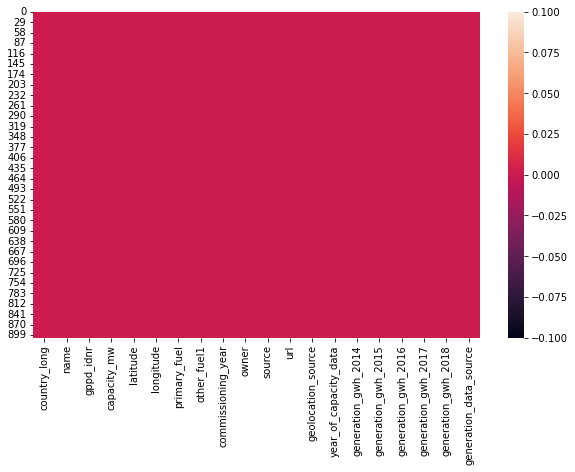

In [61]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

# EDA (Exploratory Data Analysis)

## Uni-variate Analysis

Total Country counts  India    907
Name: country_long, dtype: int64


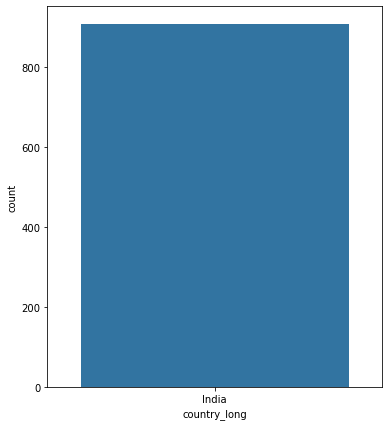

In [62]:
plt.figure(figsize=(6,7))
sns.countplot(data=df,x='country_long')
print("Total Country counts ",df['country_long'].value_counts())

Total Country counts  India    907

Total Power Plant Counts  907


<Figure size 432x504 with 0 Axes>

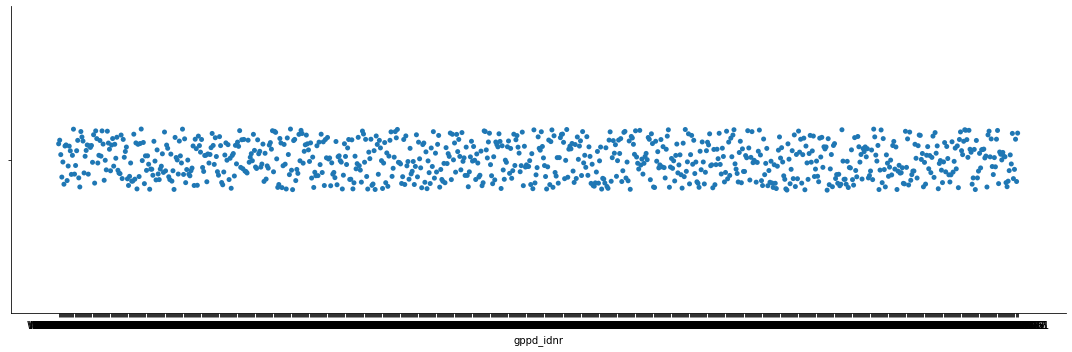

In [63]:
plt.figure(figsize=(6,7))
sns.catplot(data=df,x='gppd_idnr',aspect=3)
print("Total Power Plant Counts ",df['gppd_idnr'].value_counts().sum())

Total Power Plant Counts  907

Total Electrical Generating Capacity in MegaWatts  295884.946


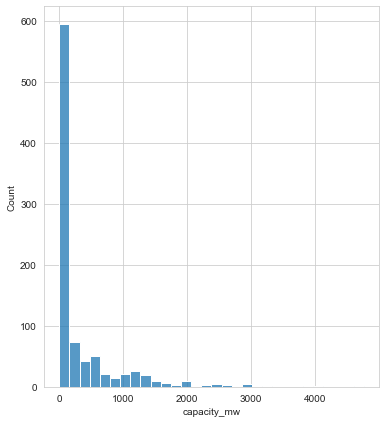

In [64]:
plt.figure(figsize=(6,7))
sns.set_style("whitegrid")
sns.histplot(data=df,x='capacity_mw',bins=30)
print("Total Electrical Generating Capacity in MegaWatts ",df['capacity_mw'].sum())

Total Electrical Generating Capacity in MegaWatts  295884.946, Maximum point lies between 0 to 100

Total Electrical Generating Capacity in MegaWatts  0.0 And Maximum Capacity  4760.0


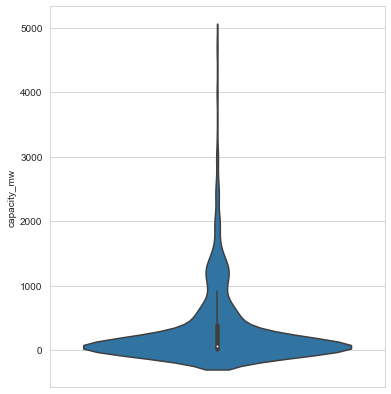

In [65]:
plt.figure(figsize=(6,7))
sns.violinplot(data=df,y='capacity_mw')
print("Total Electrical Generating Capacity in MegaWatts ",df['capacity_mw'].min(), "And Maximum Capacity ",df['capacity_mw'].max())

Total Electrical Generating Capacity in MegaWatts  0.0 And Maximum Capacity  4760.0

Total geolocation Location  907


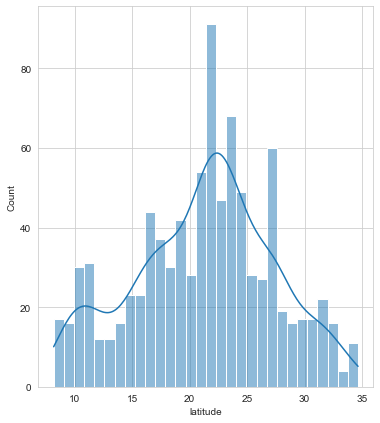

In [66]:
plt.figure(figsize=(6,7))
sns.set_style("whitegrid")
sns.histplot(data=df,x='latitude',bins=30,kde=True)
print("Total geolocation Location ",df['latitude'].value_counts().sum())

Maximum Counts lies between 20 to 25

Total latitude  8.1689 And Maximum latitude  34.649


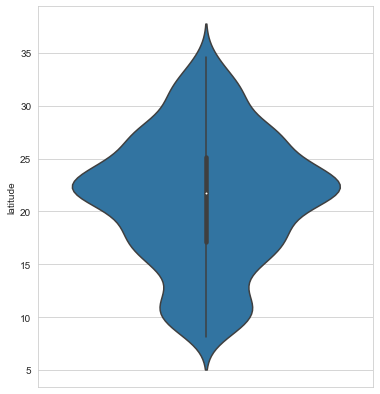

In [67]:
plt.figure(figsize=(6,7))
sns.violinplot(data=df,y='latitude')
print("Total latitude ",df['latitude'].min(), "And Maximum latitude ",df['latitude'].max())

Total latitude  8.1689 And Maximum latitude  34.649

Total geolocation Location  907


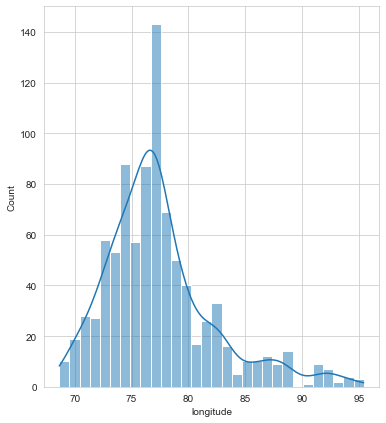

In [68]:
plt.figure(figsize=(6,7))
sns.set_style("whitegrid")
sns.histplot(data=df,x='longitude',bins=30,kde=True)
print("Total geolocation Location ",df['longitude'].value_counts().sum())

Total geolocation Location  907 Density is maximum between 75 to 80

Total 'longitude'  68.6447 And Maximum 'longitude'  95.408


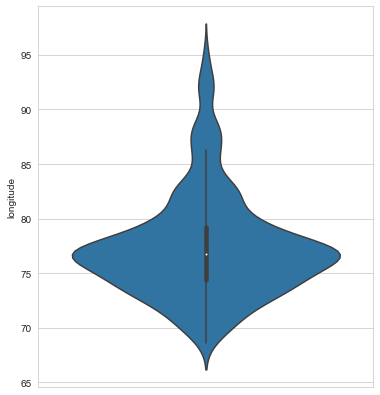

In [69]:
plt.figure(figsize=(6,7))
sns.violinplot(data=df,y='longitude')
print("Total 'longitude' ",df['longitude'].min(), "And Maximum 'longitude' ",df['longitude'].max())

Total 'longitude'  68.6447 And Maximum 'longitude'  95.408

Total primary_fuel counts 
 Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


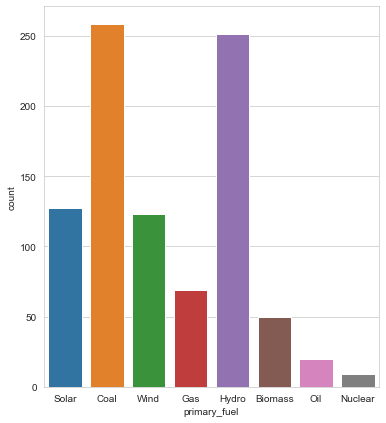

In [70]:
plt.figure(figsize=(6,7))
sns.countplot(data=df,x='primary_fuel')
print("Total primary_fuel counts \n",df['primary_fuel'].value_counts())

Total primary_fuel counts 
 Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9

Total other_fuel1 counts 
 Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


<Figure size 432x504 with 0 Axes>

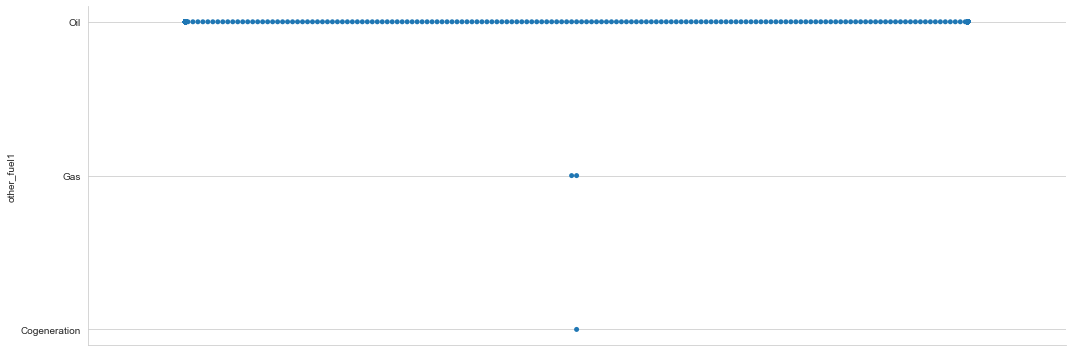

In [71]:
plt.figure(figsize=(6,7))
sns.catplot(data=df,y='other_fuel1', kind='swarm',aspect=3)
print("Total other_fuel1 counts \n",df['other_fuel1'].value_counts())

Oil             904
Gas               2
Cogeneration      1

Total commissioning_year  907


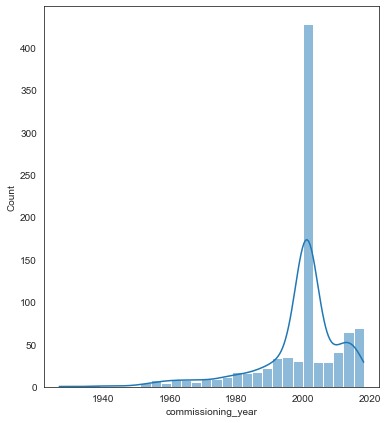

In [72]:
plt.figure(figsize=(6,7))
sns.set_style("white")
sns.histplot(data=df,x='commissioning_year',bins=30,kde=True)
print("Total commissioning_year ",df['commissioning_year'].value_counts().sum())

Total commissioning_year  907, Shows Maximum commissioning_year=2000

Total commissioning_year year of plant operation 
 2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64


<Figure size 432x504 with 0 Axes>

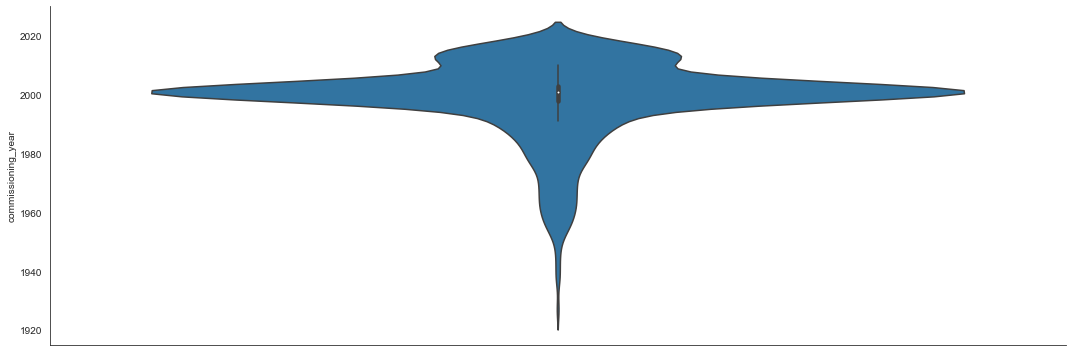

In [73]:
plt.figure(figsize=(6,7))
sns.catplot(data=df,y='commissioning_year', kind='violin',aspect=3)
print("Total commissioning_year year of plant operation \n",df['commissioning_year'].value_counts())

#### Top 5
2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19

Total owner counts 
 907


<Figure size 432x504 with 0 Axes>

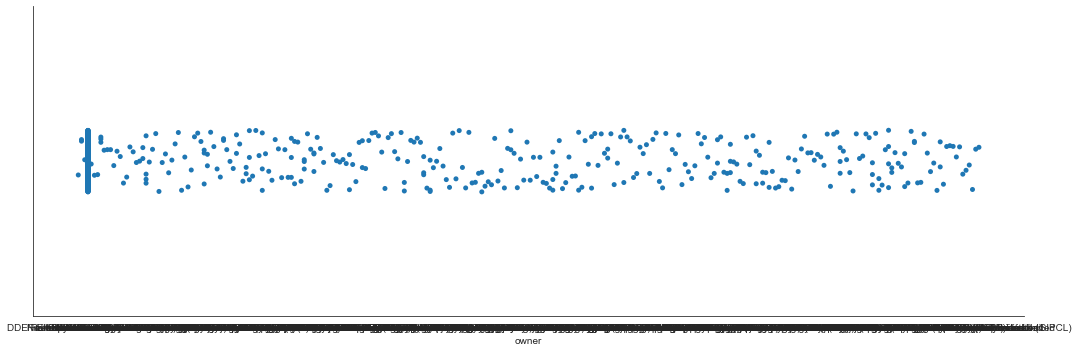

In [74]:
plt.figure(figsize=(6,7))
sns.catplot(data=df,x='owner', kind='strip',aspect=3)
print("Total owner counts \n",df['owner'].value_counts().sum())

Total owner counts 
 907

Total top 5 source counts 
 Central Electricity Authority                519
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
Name: source, dtype: int64


<Figure size 432x504 with 0 Axes>

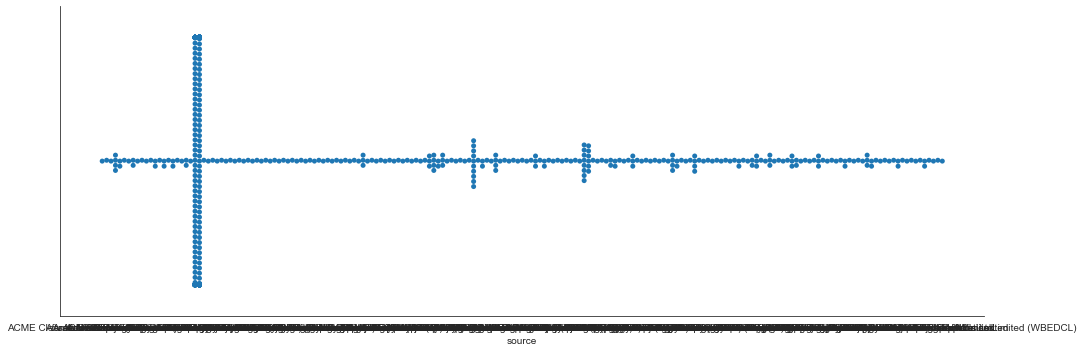

In [75]:
plt.figure(figsize=(6,7))
sns.catplot(data=df,x='source', kind='swarm',aspect=3)
print("Total top 5 source counts \n",df['source'].value_counts()[:5])

Total top 5 source counts 

- Central Electricity Authority                519
- CDM                                          124
- Lancosola                                     10
- National Renewable Energy Laboratory           8
- National Thermal Power Corporation (NTPC)      6

Total top Geolocation_source counts 
 WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


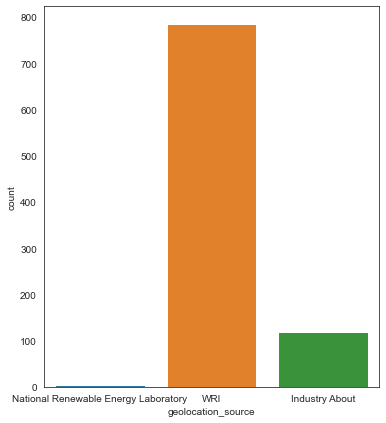

In [76]:
plt.figure(figsize=(6,7))
sns.countplot(data=df,x='geolocation_source')
print("Total top Geolocation_source counts \n",df['geolocation_source'].value_counts())

Total top Geolocation_source counts 
- WRI                                     784
- Industry About                          119
- National Renewable Energy Laboratory      4

Total year_of_capacity_data  2019.0    907
Name: year_of_capacity_data, dtype: int64


<Figure size 432x504 with 0 Axes>

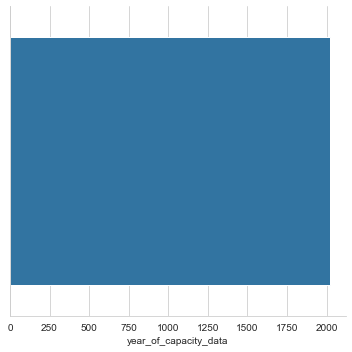

In [77]:
plt.figure(figsize=(6,7))
sns.set_style("whitegrid")
sns.catplot(data=df,x='year_of_capacity_data',kind='bar')
print("Total year_of_capacity_data ",df['year_of_capacity_data'].value_counts())

Total year_of_capacity_data  2019.0    907

Total year_of_capacity_data  2019.0    907
Name: year_of_capacity_data, dtype: int64


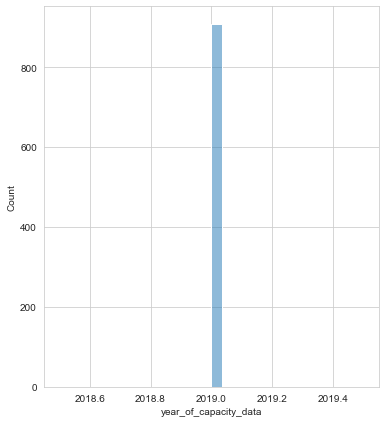

In [78]:
plt.figure(figsize=(6,7))
sns.set_style("whitegrid")
sns.histplot(data=df,x='year_of_capacity_data',bins=30,kde=True)
print("Total year_of_capacity_data ",df['year_of_capacity_data'].value_counts())

Total year_of_capacity_data  2019. is   907

Total generation_gwh_2014  907
Total Minimum generation 0.0 And Maximum Geberation 28127.0


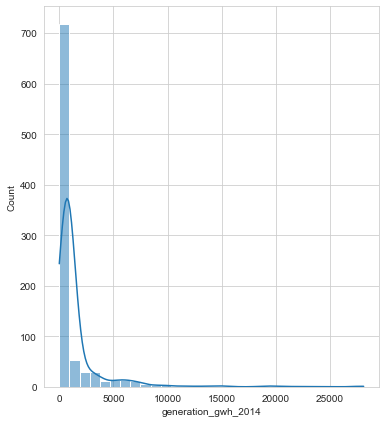

In [79]:
plt.figure(figsize=(6,7))
sns.set_style("whitegrid")
sns.histplot(data=df,x='generation_gwh_2014',bins=30,kde=True)
print("Total generation_gwh_2014 ",df['generation_gwh_2014'].value_counts().sum())
print("Total Minimum generation",df['generation_gwh_2014'].min(),"And Maximum Geberation",df['generation_gwh_2014'].max())

Total generation_gwh_2015  907
Total Minimum generation 0.0 And Maximum Geberation 30539.0


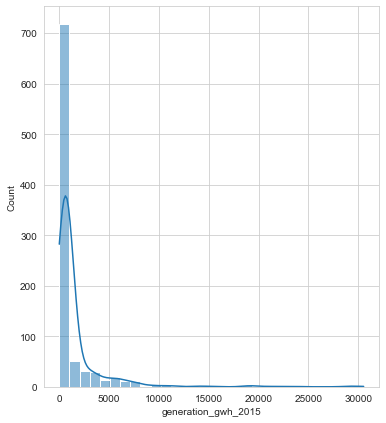

In [80]:
plt.figure(figsize=(6,7))
sns.set_style("whitegrid")
sns.histplot(data=df,x='generation_gwh_2015',bins=30,kde=True)
print("Total generation_gwh_2015 ",df['generation_gwh_2015'].value_counts().sum())
print("Total Minimum generation",df['generation_gwh_2015'].min(),"And Maximum Geberation",df['generation_gwh_2015'].max())

Total generation_gwh_2015  907
Total Minimum generation 0.0 And Maximum Geberation 30539

Total generation_gwh_2016  907
Total Minimum generation 0.0 And Maximum Geberation 30015.0


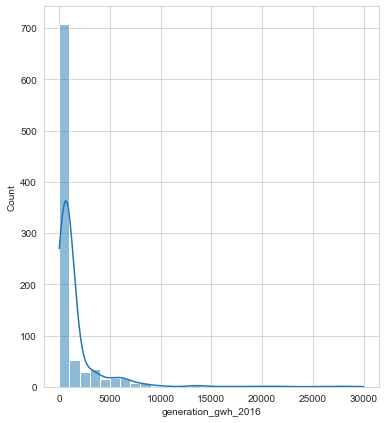

In [81]:
plt.figure(figsize=(6,7))
sns.set_style("whitegrid")
sns.histplot(data=df,x='generation_gwh_2016',bins=30,kde=True)
print("Total generation_gwh_2016 ",df['generation_gwh_2016'].value_counts().sum())
print("Total Minimum generation",df['generation_gwh_2016'].min(),"And Maximum Geberation",df['generation_gwh_2016'].max())

Total generation_gwh_2016  907
Total Minimum generation 0.0 And Maximum Geberation 30015.0


Total generation_gwh_2017  907
Total Minimum generation 0.0 And Maximum Geberation 35116.0


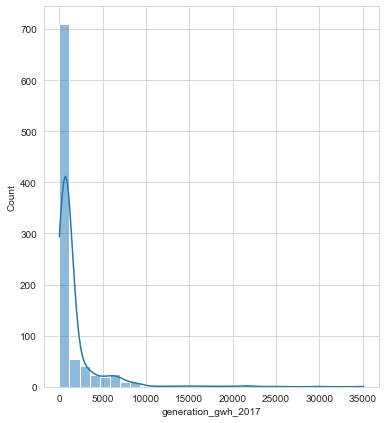

In [82]:
plt.figure(figsize=(6,7))
sns.set_style("whitegrid")
sns.histplot(data=df,x='generation_gwh_2017',bins=30,kde=True)
print("Total generation_gwh_2017 ",df['generation_gwh_2017'].value_counts().sum())
print("Total Minimum generation",df['generation_gwh_2017'].min(),"And Maximum Geberation",df['generation_gwh_2017'].max())

Total generation_gwh_2018  907
Total Minimum generation 0.0 And Maximum Geberation 35136.0


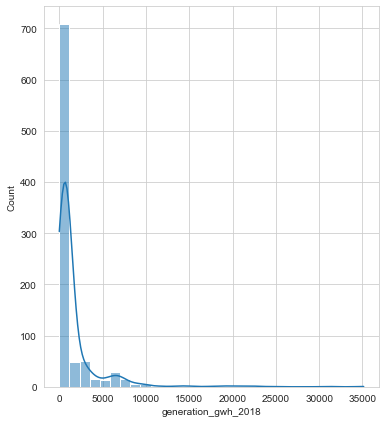

In [83]:
plt.figure(figsize=(6,7))
sns.set_style("whitegrid")
sns.histplot(data=df,x='generation_gwh_2018',bins=30,kde=True)
print("Total generation_gwh_2018 ",df['generation_gwh_2018'].value_counts().sum())
print("Total Minimum generation",df['generation_gwh_2018'].min(),"And Maximum Geberation",df['generation_gwh_2018'].max())

Total generation_gwh_2018  907
Total Minimum generation 0.0 And Maximum Geberation 35136.0

Total top generation_data_source 
 Central Electricity Authority    907
Name: generation_data_source, dtype: int64


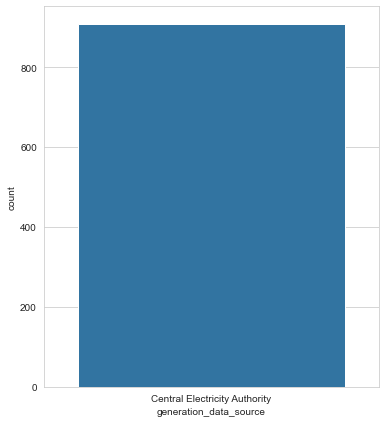

In [84]:
plt.figure(figsize=(6,7))
sns.countplot(data=df,x='generation_data_source')
print("Total top generation_data_source \n",df['generation_data_source'].value_counts())

Total top generation_data_source 
 Central Electricity Authority    907

In [85]:
#however name and url and owner is not adding any contribution to predict varible. hence deleting those columns

df.drop(['name','owner','url','country_long'],axis=1,inplace=True)

# Bi-Variate Analysis

<Figure size 576x504 with 0 Axes>

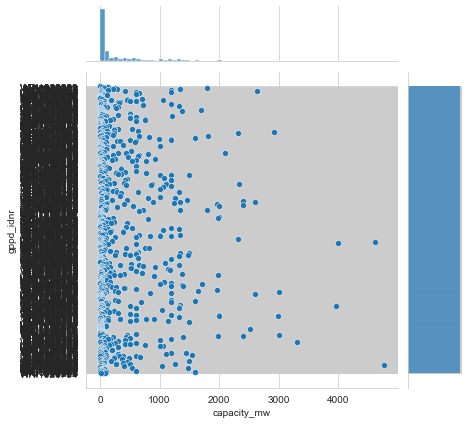

In [86]:
plt.figure(figsize=(8,7))
sns.jointplot(x='capacity_mw',y='gppd_idnr',data=df)

Maximum Points are located between 0 to 1000

<Figure size 576x504 with 0 Axes>

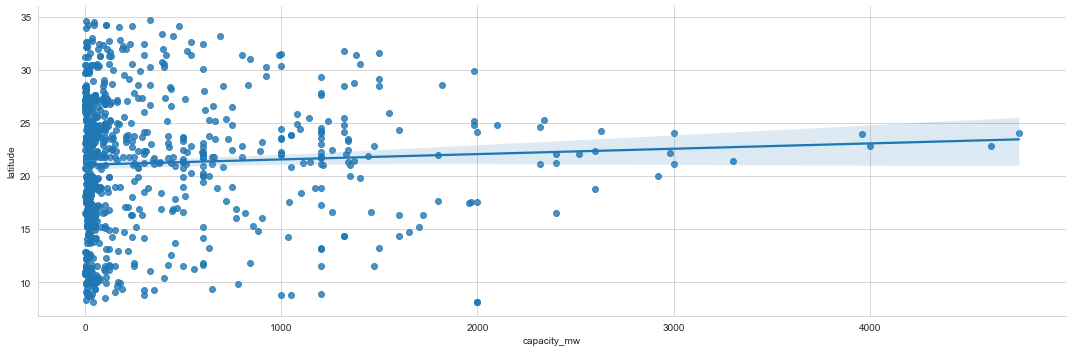

In [87]:
plt.figure(figsize=(8,7))
sns.lmplot(x='capacity_mw',y='latitude',data=df,aspect=3)

Shows quite Positive relation with capacity_mw

<AxesSubplot:xlabel='capacity_mw', ylabel='longitude'>

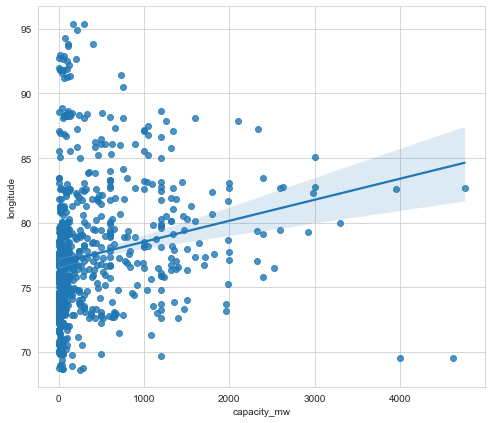

In [88]:
plt.figure(figsize=(8,7))
sns.regplot(x='capacity_mw',y='longitude',data=df)

longitude shows positive relation with capacity_mw

<AxesSubplot:xlabel='capacity_mw', ylabel='longitude'>

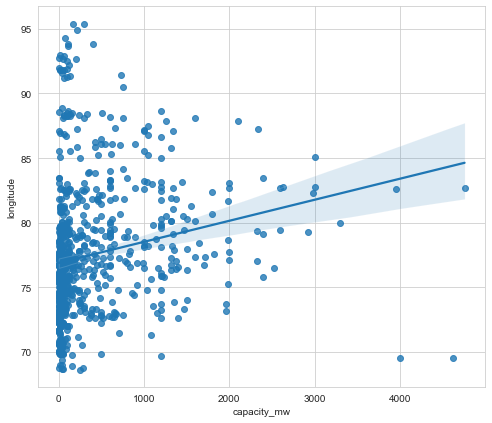

In [89]:
plt.figure(figsize=(8,7))
sns.regplot(x='capacity_mw',y='longitude',data=df)

longitude shows positive relation with capacity_mw

<Figure size 576x504 with 0 Axes>

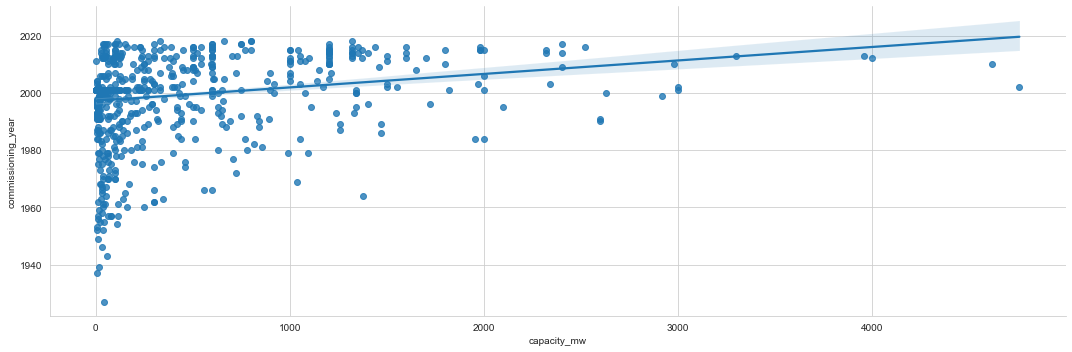

In [90]:
plt.figure(figsize=(8,7))
sns.lmplot(x='capacity_mw',y='commissioning_year',data=df,aspect=3)

shows positive relation with target variable

<Figure size 576x504 with 0 Axes>

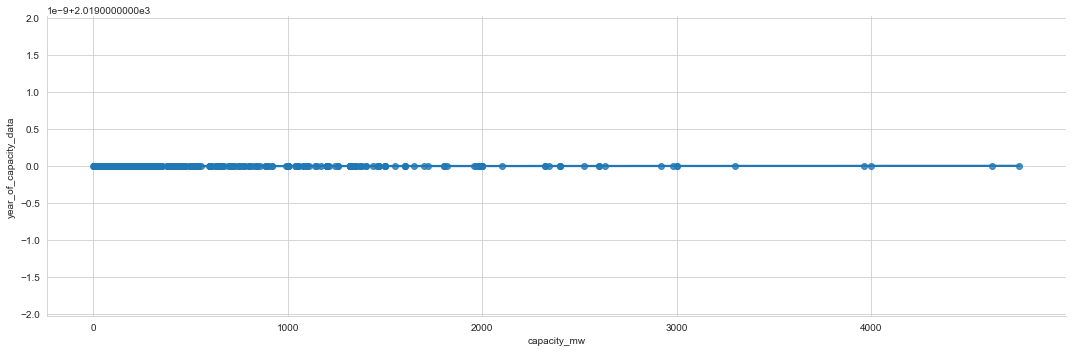

In [91]:
plt.figure(figsize=(8,7))
sns.lmplot(x='capacity_mw',y='year_of_capacity_data',data=df,aspect=3)

Shows Maximum Capacity lies till 1000

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

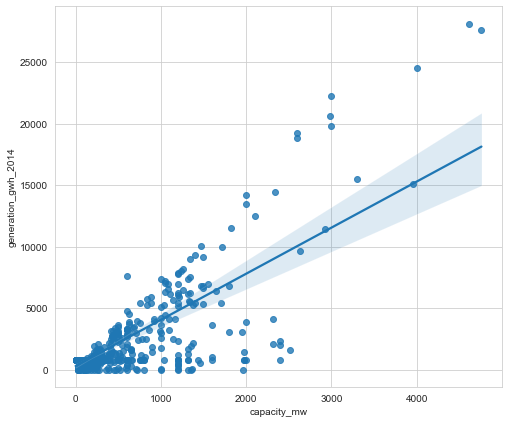

In [92]:
plt.figure(figsize=(8,7))
sns.regplot(x='capacity_mw',y='generation_gwh_2014',data=df)

Shows positive relation with Target Variable

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

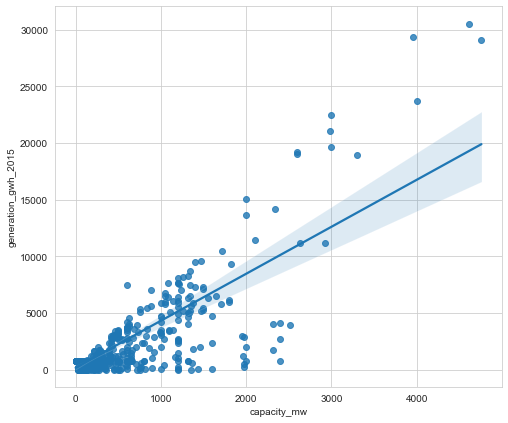

In [93]:
plt.figure(figsize=(8,7))
sns.regplot(x='capacity_mw',y='generation_gwh_2015',data=df)

Shows Positive realation With Target Variable

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

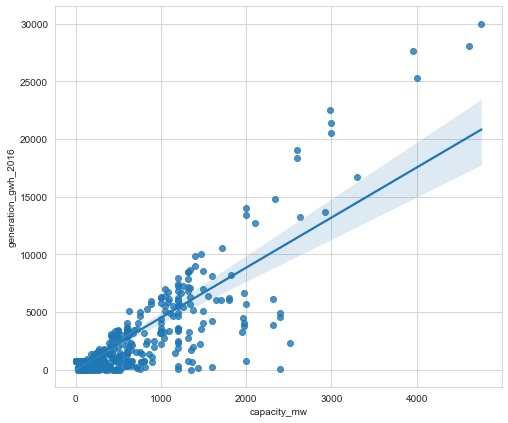

In [94]:
plt.figure(figsize=(8,7))
sns.regplot(x='capacity_mw',y='generation_gwh_2016',data=df)

Shows Positive realation With Target Variable

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

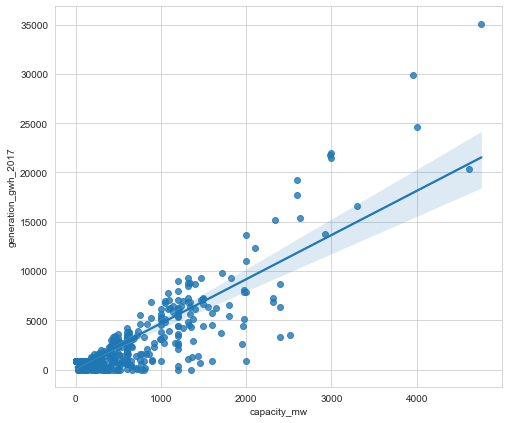

In [95]:
plt.figure(figsize=(8,7))
sns.regplot(x='capacity_mw',y='generation_gwh_2017',data=df)

Shows Positive realation With Target Variable

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2018'>

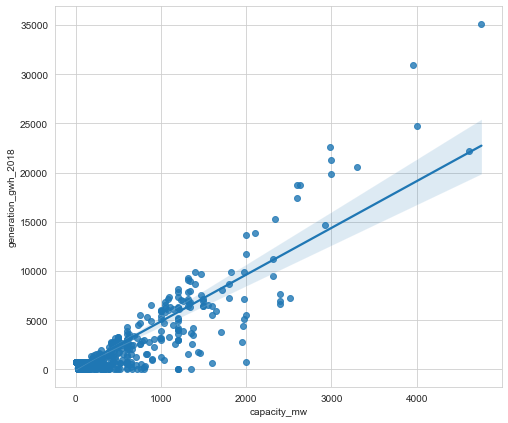

In [96]:
plt.figure(figsize=(8,7))
sns.regplot(x='capacity_mw',y='generation_gwh_2018',data=df)

Shows Positive realation With Target Variable

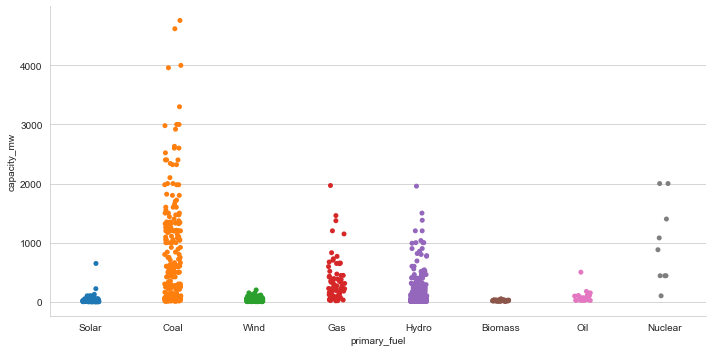

In [97]:
sns.catplot(y='capacity_mw',x='primary_fuel',data=df,aspect=2,kind='strip')

Maximum dependence in coal

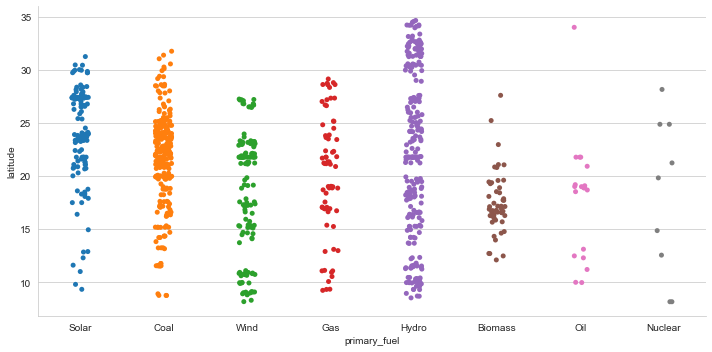

In [98]:
sns.catplot(y='latitude',x='primary_fuel',data=df,aspect=2,kind='strip')

Maximum Is Hydro coal 

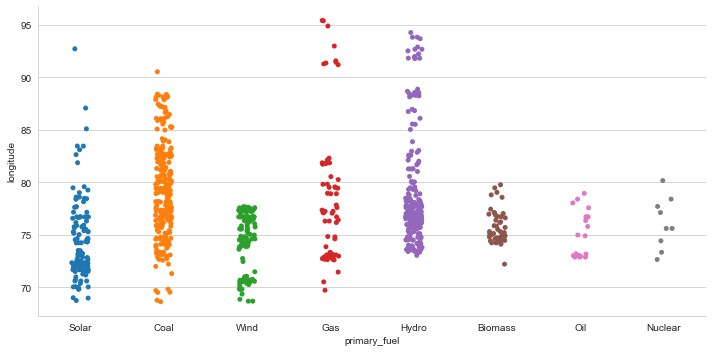

In [99]:
sns.catplot(y='longitude',x='primary_fuel',data=df,aspect=2,kind='strip')

By logitude it shows hydro

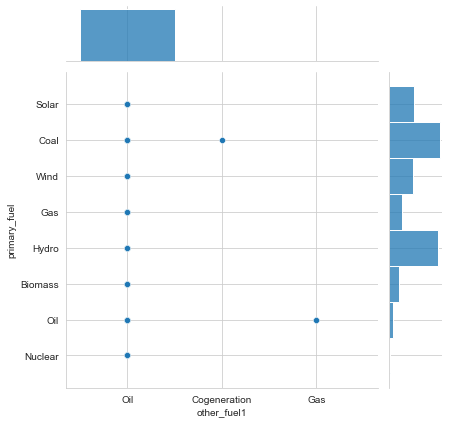

In [100]:
sns.jointplot(x='other_fuel1',y='primary_fuel',data=df,kind='scatter')

coal and Hydro use is max

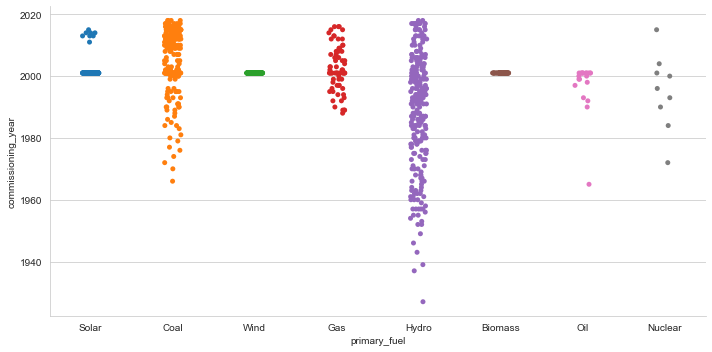

In [101]:
sns.catplot(y='commissioning_year',x='primary_fuel',data=df,aspect=2,kind='strip')

Hydro is used as main source followed by coal

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

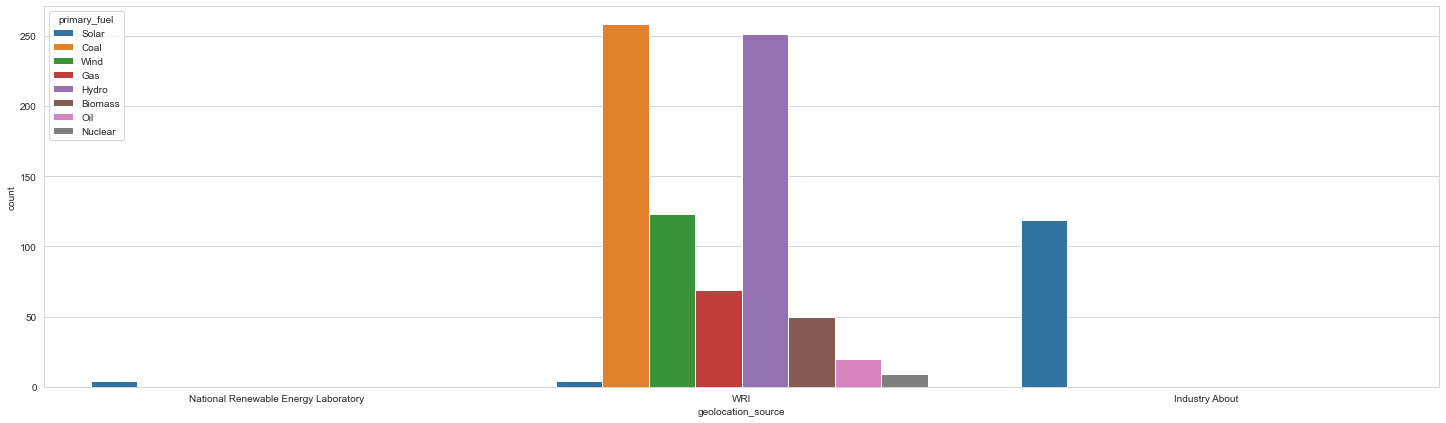

In [102]:
plt.figure(figsize=(25,7))
sns.countplot(x='geolocation_source',hue='primary_fuel',data=df)

WRI is main source

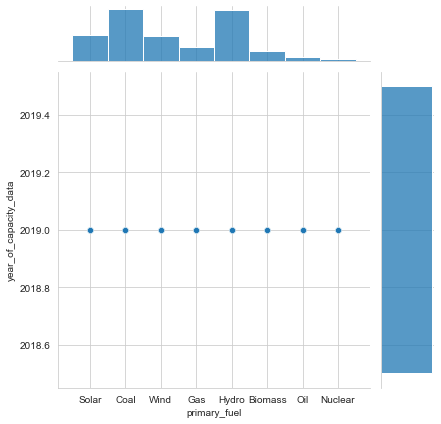

In [103]:
sns.jointplot(y='year_of_capacity_data',x='primary_fuel',data=df,kind='scatter')

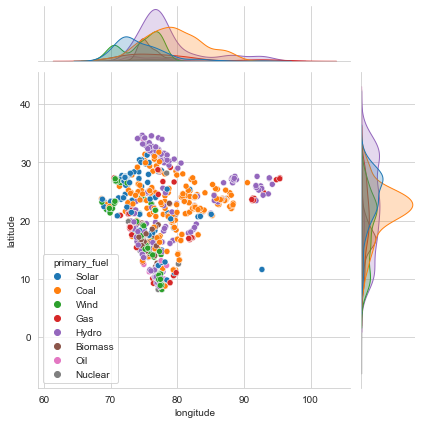

In [104]:
sns.jointplot(data=df,y='latitude',x='longitude',hue='primary_fuel')

<Figure size 576x504 with 0 Axes>

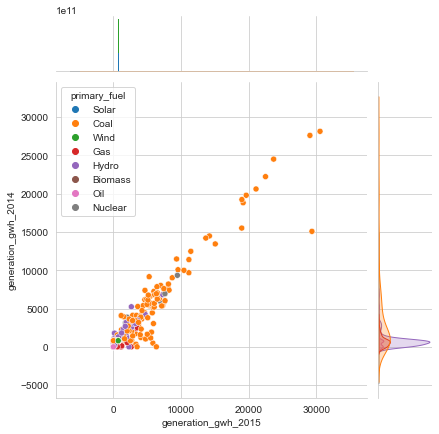

In [105]:
plt.figure(figsize=(8,7))
sns.jointplot(data=df,y='generation_gwh_2014',x='generation_gwh_2015',hue='primary_fuel')

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='generation_gwh_2016'>

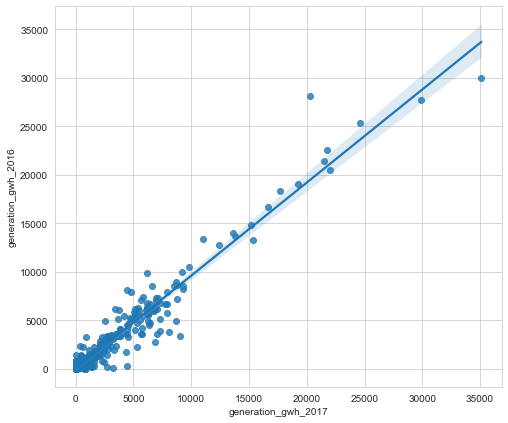

In [106]:
plt.figure(figsize=(8,7))
sns.regplot(data=df,y='generation_gwh_2016',x='generation_gwh_2017')

Shows positive relation

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='generation_gwh_2017'>

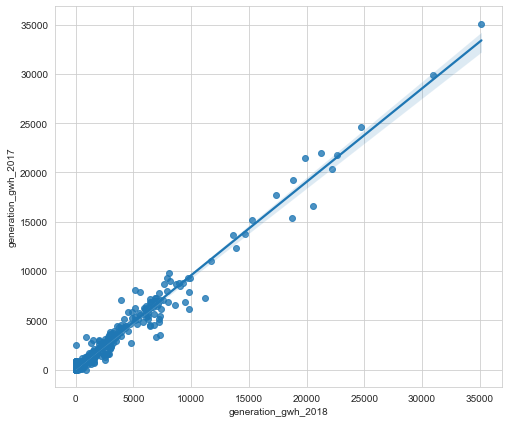

In [107]:
plt.figure(figsize=(8,7))
sns.regplot(data=df,y='generation_gwh_2017',x='generation_gwh_2018')

Shows Positive Relation

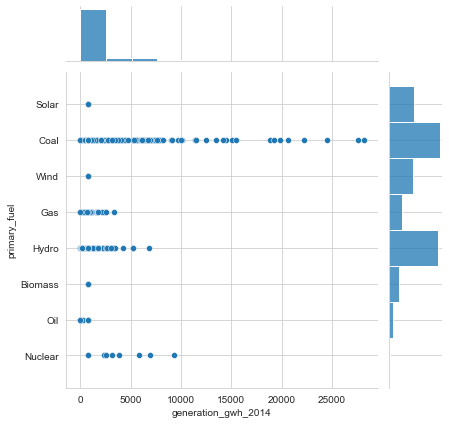

In [108]:
sns.jointplot(x='generation_gwh_2014',y='primary_fuel',data=df,kind='scatter')

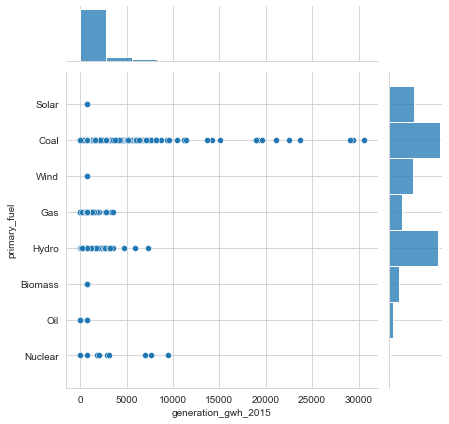

In [109]:
sns.jointplot(x='generation_gwh_2015',y='primary_fuel',data=df,kind='scatter')

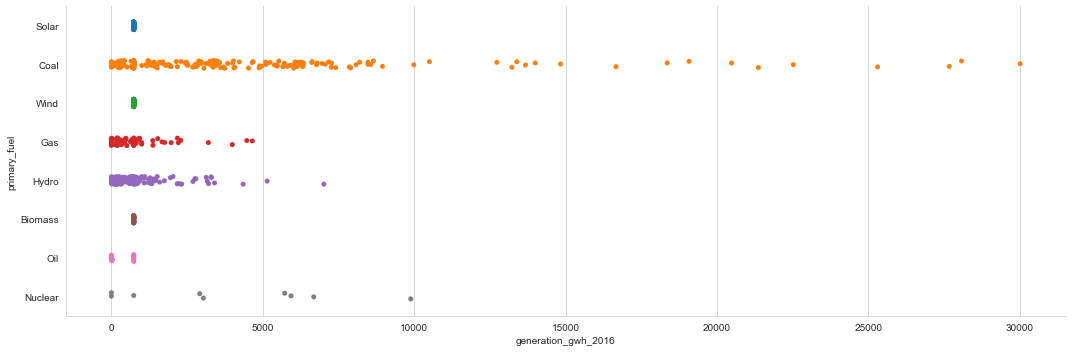

In [110]:
sns.catplot(x='generation_gwh_2016',y='primary_fuel',data=df,aspect=3,kind='strip')

Coal is used More

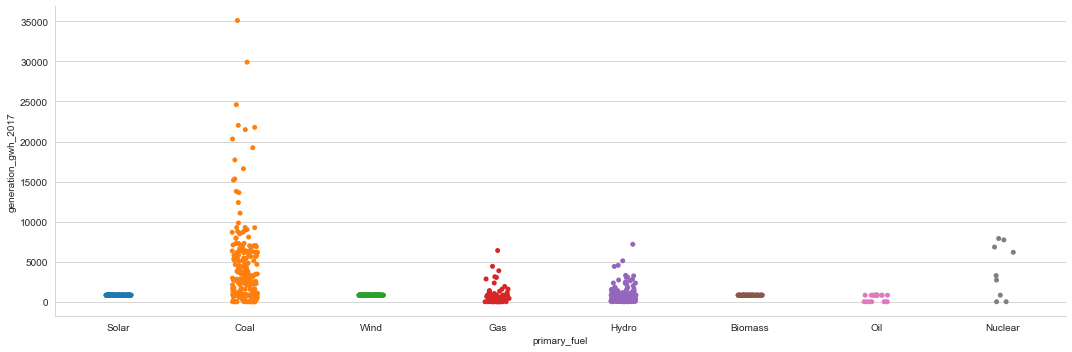

In [111]:
sns.catplot(y='generation_gwh_2017',x='primary_fuel',data=df,aspect=3,kind='strip')

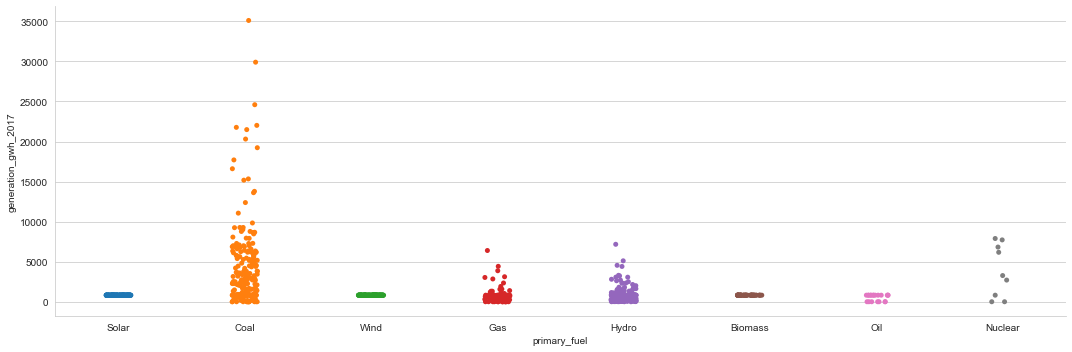

In [112]:
sns.catplot(y='generation_gwh_2017',x='primary_fuel',data=df,aspect=3,kind='strip')

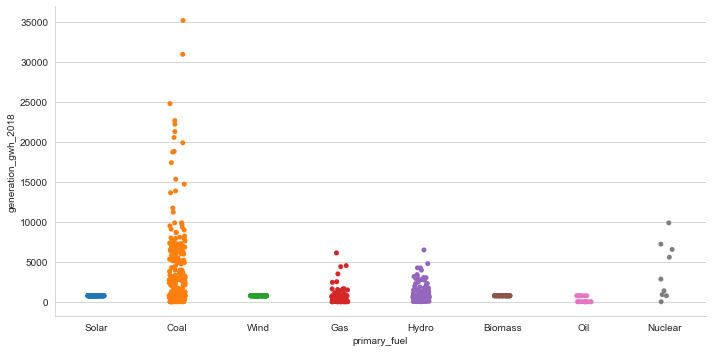

In [113]:
sns.catplot(y='generation_gwh_2018',x='primary_fuel',data=df,aspect=2,kind='strip')

<AxesSubplot:xlabel='generation_data_source', ylabel='count'>

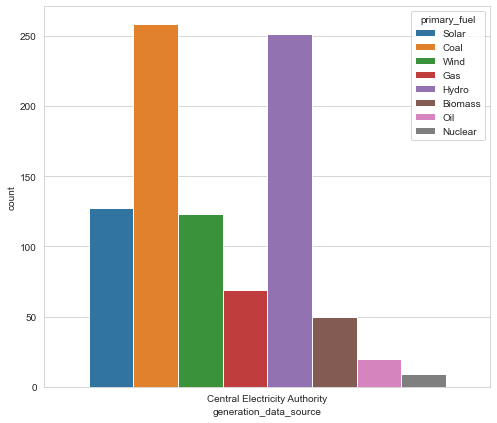

In [114]:
plt.figure(figsize=(8,7))
sns.countplot(x='generation_data_source',hue='primary_fuel',data=df)

# Multi-Variate Analysis

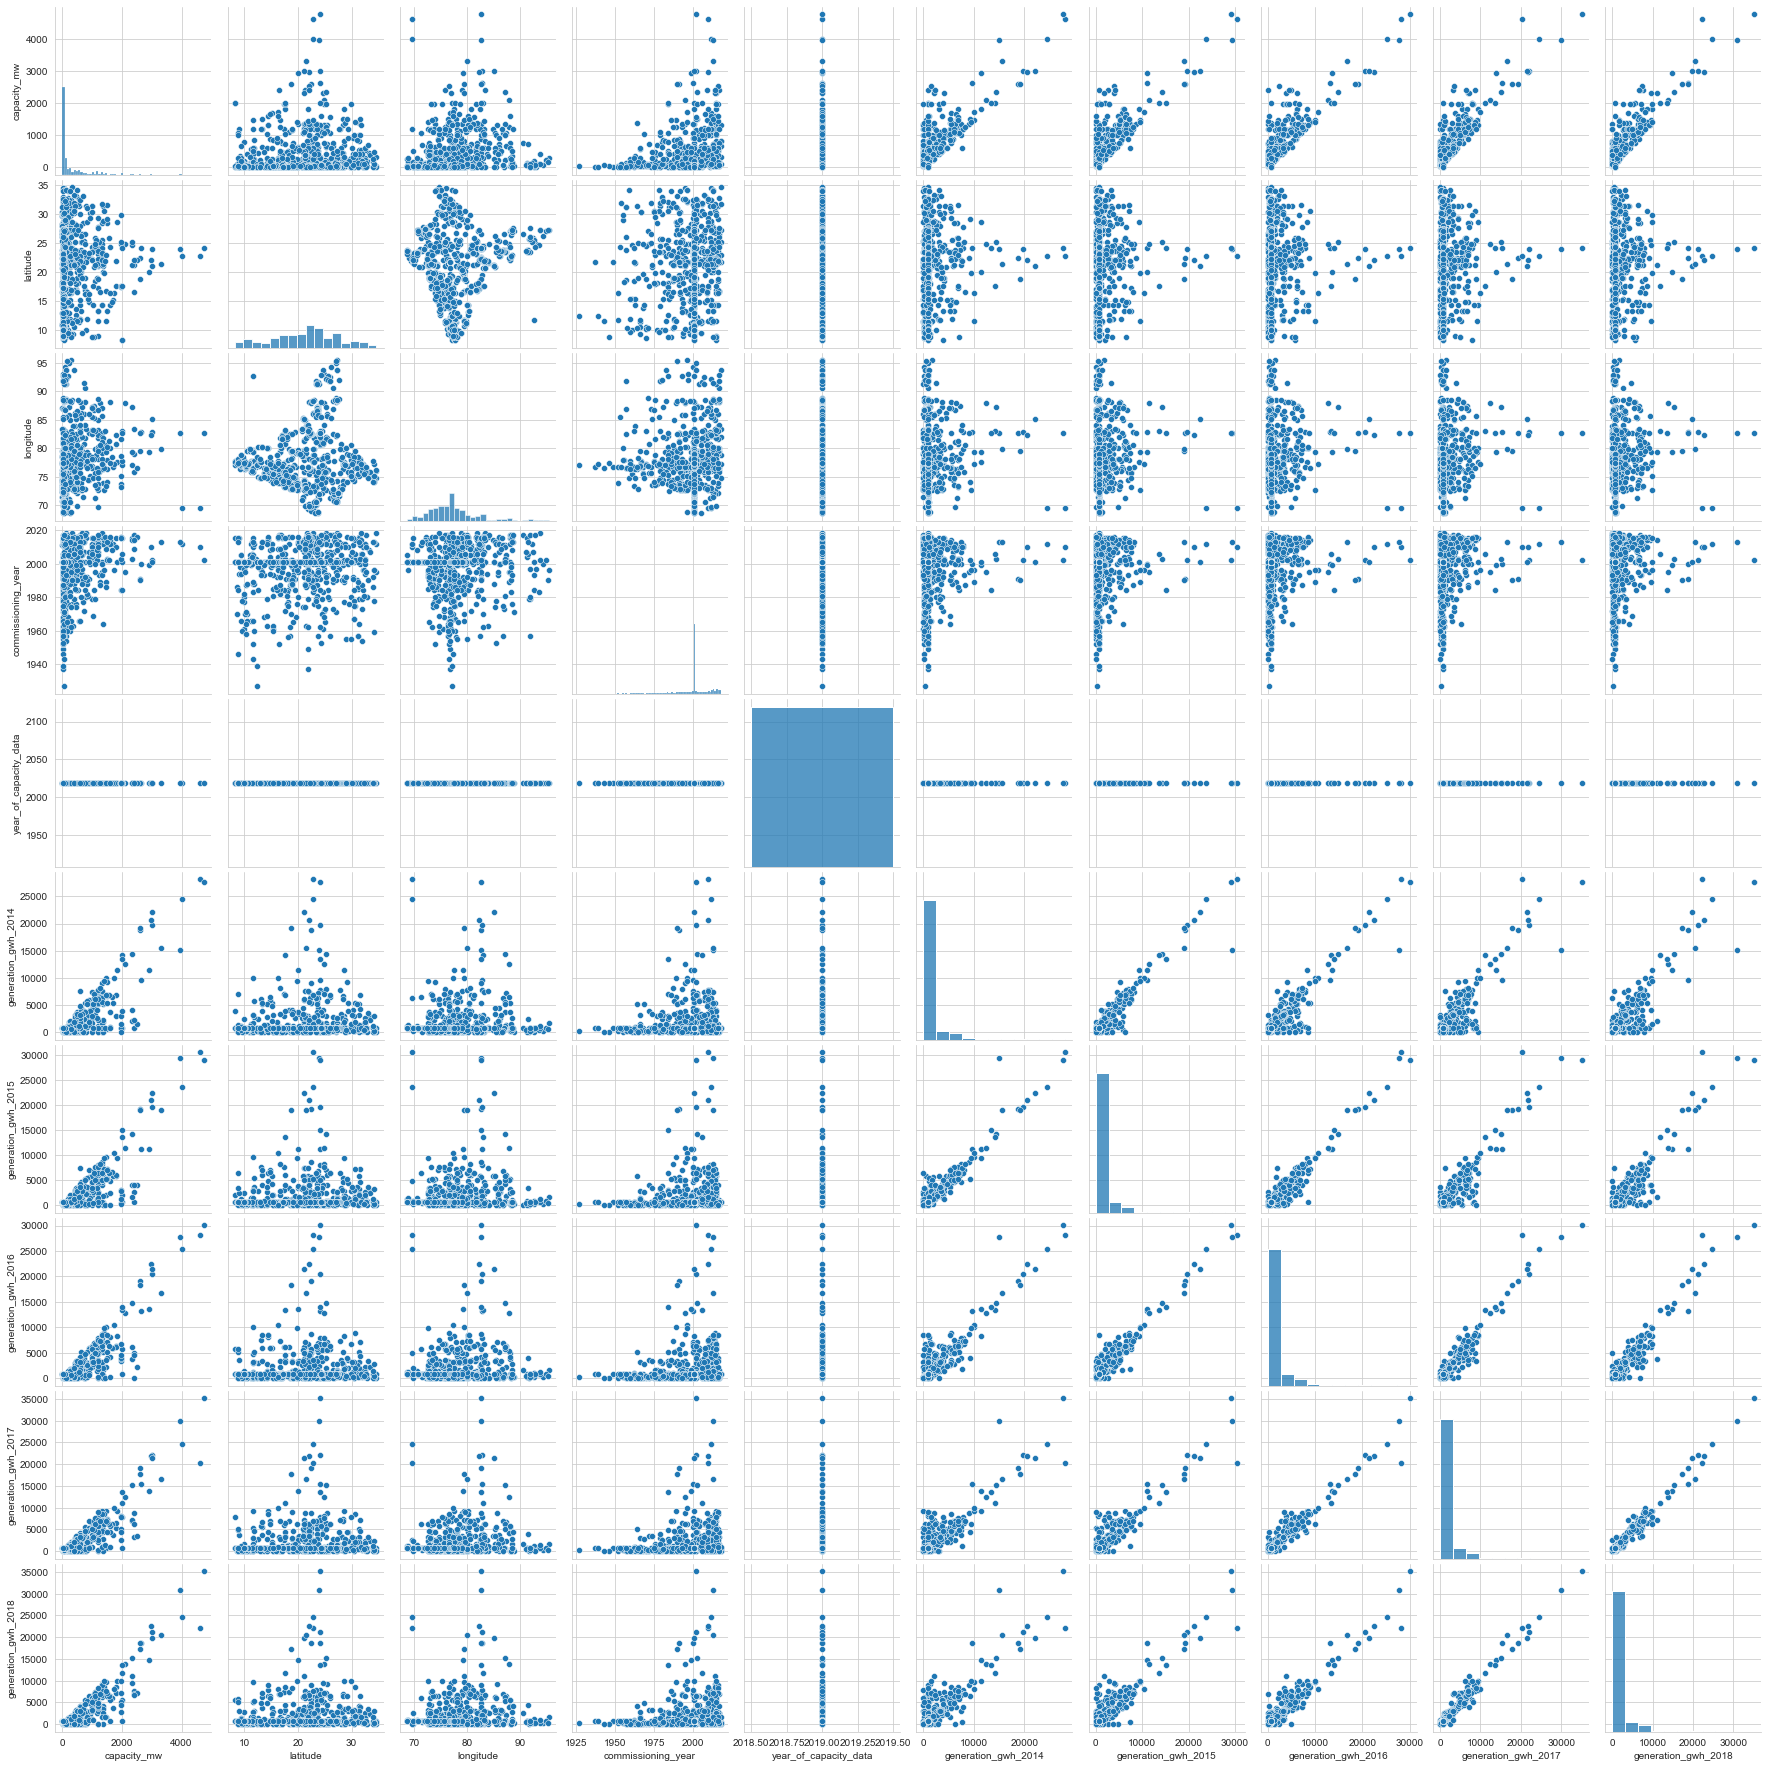

In [115]:
sns.pairplot(df)

# Feature Engneering

In [116]:
df['longitude'].unique()

array([73.2407, 74.609 , 69.3732, 91.3602, 82.4091, 68.6447, 77.0078,
       77.207 , 75.8863, 81.6373, 77.9009, 76.4938, 82.8   , 77.8769,
       76.7195, 82.7891, 76.3188, 81.7841, 81.7865, 76.1851, 74.7061,
       74.9191, 79.5286, 83.2741, 79.1518, 74.2402, 76.3926, 77.687 ,
       73.6396, 77.1893, 76.3482, 71.6917, 71.6918, 71.6916, 77.3066,
       75.225 , 75.3155, 76.1418, 87.4513, 82.1221, 79.3421, 74.689 ,
       82.4305, 88.4042, 76.4695, 81.2875, 81.2747, 74.2562, 83.1889,
       91.565 , 86.0218, 79.925 , 85.7452, 79.8066, 73.2   , 80.2682,
       78.241 , 76.7986, 74.5345, 79.0547, 74.8209, 74.7111, 76.7909,
       77.1036, 75.6373, 75.7131, 76.4328, 79.6311, 79.7708, 73.8087,
       73.7252, 73.4173, 72.2222, 77.758 , 77.8659, 77.7145, 74.7529,
       81.4237, 73.3907, 73.3498, 73.4527, 75.8425, 74.6216, 78.1606,
       78.1336, 73.0901, 83.2058, 76.6537, 81.0333, 86.0888, 85.88  ,
       90.5287, 74.1543, 76.3744, 88.14  , 76.532 , 78.9535, 78.9333,
       76.1807, 73.5

In [117]:
df['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000019',
       'WRI1019905', 'IND0000020', 'IND0000021', 'IND0000022',
       'IND0000023', 'IND0000025', 'IND0000024', 'WRI1019941',
       'WRI1019882', 'IND0000026', 'IND0000027', 'IND0000028',
       'IND0000029', 'IND0000030', 'IND0000031', 'IND0000032',
       'WRI1019883', 'IND0000033', 'IND0000034', 'IND0000035',
       'IND0000036', 'IND0000037', 'IND0000038', 'IND00

In [118]:
# However 
id_name=df['gppd_idnr'].astype(str)

new_id_name=np.array([i[0] for i in id_name])

new_id_name= pd.Categorical(new_id_name)

new_id_name.describe()

,counts,freqs
categories,,
I,519,0.572216
W,388,0.427784


In [119]:
df['gppd_idnr']=new_id_name

In [120]:
df['gppd_idnr']

0      W
1      W
2      W
3      I
4      I
      ..
902    I
903    W
904    W
905    W
906    W
Name: gppd_idnr, Length: 907, dtype: category
Categories (2, object): ['I', 'W']

In [121]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [122]:
df['primary_fuel']=df['primary_fuel'].replace(['Solar','Wind','Hydro','Biomass'],'Renewable Energy')
df['primary_fuel']=df['primary_fuel'].replace(['Coal','Gas','Oil','Nuclear'],'Non-Renewable Energy')

In [123]:
df['other_fuel1'].unique()

array(['Oil', 'Cogeneration', 'Gas'], dtype=object)

In [124]:
df['other_fuel1']=df['other_fuel1'].replace(['Congeneration'],'Renewable Energy')
df['other_fuel1']=df['other_fuel1'].replace(['Oil','Gas'],'Non-Renewable Energy')

In [125]:
df['commissioning_year'].unique()

array([2011., 2001., 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2006., 2007., 1988., 1973.,
       2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993., 1997.,
       1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983.,
       1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971., 1955.,
       2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982., 1937.,
       1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927., 1974.,
       1953.])

In [126]:
df['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [127]:
#droping this column as no value get added by this column
df.drop(['source'],axis=1,inplace=True)

In [128]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [129]:
df['year_of_capacity_data'].unique()

array([2019.])

In [130]:
df['Year_of_capacity_data']=df['year_of_capacity_data']-df['commissioning_year']

In [131]:
df['Year_of_capacity_data']

0       8.0
1      18.0
2      18.0
3      15.0
4       4.0
       ... 
902     3.0
903    18.0
904    18.0
905    18.0
906    18.0
Name: Year_of_capacity_data, Length: 907, dtype: float64

In [132]:
df['generation_data_source'].unique()

array(['Central Electricity Authority'], dtype=object)

In [133]:
df.columns

Index(['gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source', 'Year_of_capacity_data'],
      dtype='object')

In [134]:
df.head()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,Year_of_capacity_data
0,W,2.5,28.1839,73.2407,Renewable Energy,Non-Renewable Energy,2011.0,National Renewable Energy Laboratory,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority,8.0
1,W,98.0,24.7663,74.6090,Non-Renewable Energy,Non-Renewable Energy,2001.0,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority,18.0
2,W,39.2,21.9038,69.3732,Renewable Energy,Non-Renewable Energy,2001.0,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority,18.0
3,I,135.0,23.8712,91.3602,Non-Renewable Energy,Non-Renewable Energy,2004.0,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,15.0
4,I,1800.0,21.9603,82.4091,Non-Renewable Energy,Non-Renewable Energy,2015.0,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,4.0


# Using Label Encoder:

In [135]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])

In [136]:
df.head(3)

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,Year_of_capacity_data
0,W,2.5,28.1839,73.2407,1,1,2011.0,1,2019.0,801.123775,711.181225,737.20545,817.97725,751.644375,0,8.0
1,W,98.0,24.7663,74.6090,0,1,2001.0,2,2019.0,801.123775,711.181225,737.20545,817.97725,751.644375,0,18.0
2,W,39.2,21.9038,69.3732,1,1,2001.0,2,2019.0,801.123775,711.181225,737.20545,817.97725,751.644375,0,18.0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   gppd_idnr               907 non-null    category
 1   capacity_mw             907 non-null    float64 
 2   latitude                907 non-null    float64 
 3   longitude               907 non-null    float64 
 4   primary_fuel            907 non-null    int32   
 5   other_fuel1             907 non-null    int32   
 6   commissioning_year      907 non-null    float64 
 7   geolocation_source      907 non-null    int32   
 8   year_of_capacity_data   907 non-null    float64 
 9   generation_gwh_2014     907 non-null    float64 
 10  generation_gwh_2015     907 non-null    float64 
 11  generation_gwh_2016     907 non-null    float64 
 12  generation_gwh_2017     907 non-null    float64 
 13  generation_gwh_2018     907 non-null    float64 
 14  generation_data_source  90

In [138]:
df.drop(['year_of_capacity_data','commissioning_year','generation_data_source'],axis=1,inplace=True)

In [139]:
for i in df.columns:
    if df[i].dtypes=='category':
        df[i]=le.fit_transform(df[i])

In [140]:
df.head(5)

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Year_of_capacity_data
0,1,2.5,28.1839,73.2407,1,1,1,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,1,98.0,24.7663,74.6090,0,1,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,1,39.2,21.9038,69.3732,1,1,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,0,135.0,23.8712,91.3602,0,1,2,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,0,1800.0,21.9603,82.4091,0,1,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0


# Descriptive Statistics

In [141]:
df.describe()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Year_of_capacity_data
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,0.427784,326.223755,21.227439,77.427103,0.607497,0.998897,1.733186,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,20.271224
std,0.495030,590.085456,6.080491,4.815073,0.488577,0.033204,0.677151,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,16.725000,17.072000,74.388900,0.000000,1.000000,2.000000,801.123775,711.181225,737.205450,817.977250,751.644375,16.000000
50%,0.000000,59.200000,21.780000,76.719500,1.000000,1.000000,2.000000,801.123775,711.181225,737.205450,817.977250,751.644375,18.000000
75%,1.000000,385.250000,25.176450,79.206100,1.000000,1.000000,2.000000,801.123775,711.181225,737.205450,817.977250,751.644375,21.000000
max,1.000000,4760.000000,34.649000,95.408000,1.000000,1.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,92.000000


Text(160.0, 0.5, 'Featues')

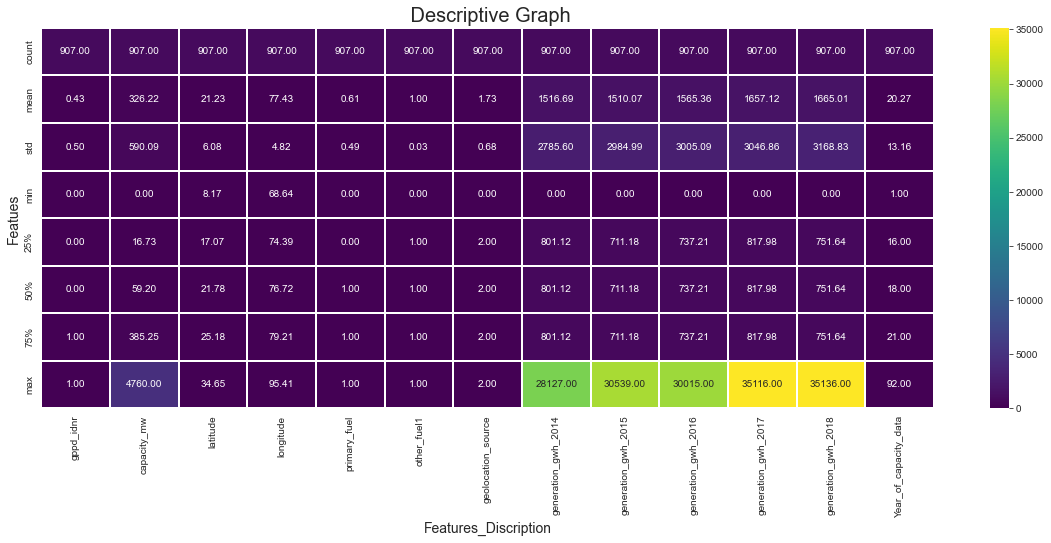

In [142]:
plt.figure(figsize=(20,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.02,linecolor='white',fmt='0.2f',cmap='viridis')
plt.title(" Descriptive Graph",fontsize=20)
plt.xlabel("Features_Discription",fontsize=14)
plt.ylabel("Featues",fontsize=14)

# Observations:

- Null Values  : No Missing Values.

- RightSkewed :generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,
  generation_gwh_2017, generation_gwh_2018,  	Year_of_capacity_data, capacity_mw,
- Left Skewed  : commissioning_year, geolocation_source
- Standard Deviation : generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018, capacity_mw
- Outliers     :  Generation_gwh_2014, 	Generation_gwh_2015,  Generation_gwh_2016, Generation_gwh_2017, Generation_gwh_2018

# Correlation 

In [143]:
df.corr()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Year_of_capacity_data
gppd_idnr,1.000000,-0.417896,-0.079361,-0.426917,0.293398,0.028726,-0.455963,-0.222230,-0.231534,-0.238411,-0.238262,-0.249355,-0.166096
capacity_mw,-0.417896,1.000000,0.048790,0.199299,-0.480222,0.003731,0.204865,0.793497,0.819676,0.853008,0.868338,0.884840,-0.211042
latitude,-0.079361,0.048790,1.000000,0.035619,0.022702,0.033039,-0.182319,0.057179,0.052422,0.046267,0.056407,0.053700,-0.088098
longitude,-0.426917,0.199299,0.035619,1.000000,-0.240048,0.005281,0.249100,0.106855,0.123763,0.145640,0.154014,0.157405,-0.029583
primary_fuel,0.293398,-0.480222,0.022702,-0.240048,1.000000,0.041332,-0.316892,-0.322543,-0.333299,-0.348025,-0.359572,-0.360615,0.297794
other_fuel1,0.028726,0.003731,0.033039,0.005281,0.041332,1.000000,-0.013098,-0.006654,-0.005781,-0.000283,0.001161,0.004652,0.000685
geolocation_source,-0.455963,0.204865,-0.182319,0.249100,-0.316892,-0.013098,1.000000,0.101329,0.105571,0.108707,0.108639,0.113697,0.073907
generation_gwh_2014,-0.222230,0.793497,0.057179,0.106855,-0.322543,-0.006654,0.101329,1.000000,0.963719,0.935067,0.904075,0.895143,-0.076971
generation_gwh_2015,-0.231534,0.819676,0.052422,0.123763,-0.333299,-0.005781,0.105571,0.963719,1.000000,0.973231,0.940229,0.933161,-0.108752
generation_gwh_2016,-0.238411,0.853008,0.046267,0.145640,-0.348025,-0.000283,0.108707,0.935067,0.973231,1.000000,0.973909,0.964988,-0.140964


Text(66.75, 0.5, 'Featues')

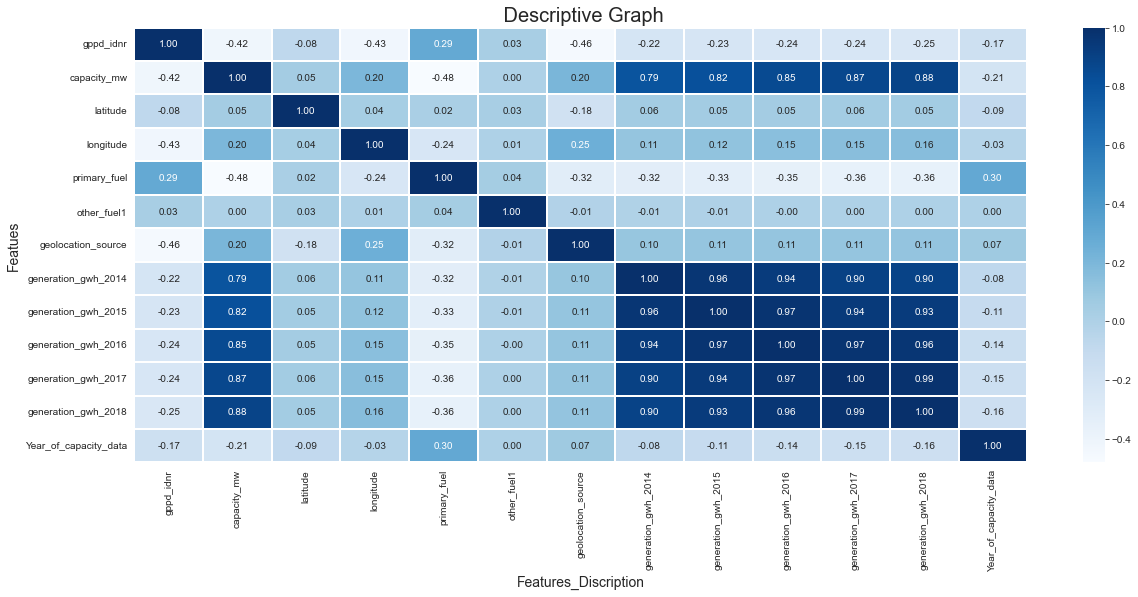

In [144]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.02,linecolor='white',fmt='0.2f',cmap='Blues')
plt.title(" Descriptive Graph",fontsize=20)
plt.xlabel("Features_Discription",fontsize=14)
plt.savefig("corr.jpeg")
plt.ylabel("Featues",fontsize=14)

# Regression Model (Predict-capacity_mw)

In [145]:
df.corr()['capacity_mw'].sort_values()

primary_fuel            -0.480222
gppd_idnr               -0.417896
Year_of_capacity_data   -0.211042
other_fuel1              0.003731
latitude                 0.048790
longitude                0.199299
geolocation_source       0.204865
generation_gwh_2014      0.793497
generation_gwh_2015      0.819676
generation_gwh_2016      0.853008
generation_gwh_2017      0.868338
generation_gwh_2018      0.884840
capacity_mw              1.000000
Name: capacity_mw, dtype: float64

# Correlation Graph

Text(0, 0.5, 'Feature_Scale')

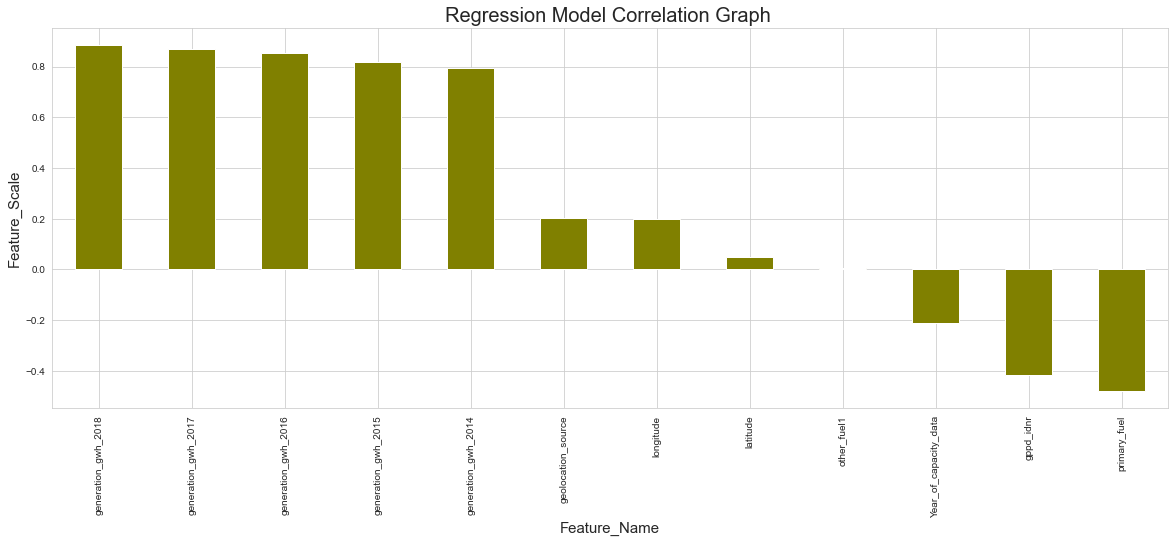

In [146]:
plt.figure(figsize=(20,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot(kind='bar',color='olive')
plt.title("Regression Model Correlation Graph ",fontsize=20)
plt.xlabel("Feature_Name",fontsize=15, loc='center')
plt.ylabel("Feature_Scale",fontsize=15, loc='center')

## Observation Shows:

- Primary_fuel is 48 percentage very negatively correlated with the target variable which is very week bond. 
- gppd_idr is 42 percentage very negatively correlated with the target variable which is very week bond.
- Year_of_capacity_data is 21 percentage correlated with the target variable which is a very week bond.
- other_fuel1 is zero percentage corelated with the target variable which shows no good relation.
- latitude is 5 percentage correlated with the target variable which shows no good relation.
- longitude is 20 percentage correlated with the target variable is a good bond.
- geolocation_source is 20 percentage correlated with the target variable is a good bond.
- generation_gwh_2014 is 79 percentage positively correlated with the target variable which is a  excellent bond.
- generation_gwh_2015 is 82 percentage positively correlated with the target variable which is a excellent bond.
- generation_gwh_2016 is 85 percentage positively correlated with the target variable which is a excellent bond.
- generation_gwh_2017 is 87 percentage positively correlated with the target variable which is a very excellent bond.
- generation_gwh_2018 is 88 percentage positively correlated with the target variable which is a very excellent bond.

`NOTE
1. Primary_fuel is Week bond.
2. Generation_GWH_2018 is excellet bond

# Logistic Model (Primary Fuel)

In [147]:
df.corr()['primary_fuel'].sort_values()

capacity_mw             -0.480222
generation_gwh_2018     -0.360615
generation_gwh_2017     -0.359572
generation_gwh_2016     -0.348025
generation_gwh_2015     -0.333299
generation_gwh_2014     -0.322543
geolocation_source      -0.316892
longitude               -0.240048
latitude                 0.022702
other_fuel1              0.041332
gppd_idnr                0.293398
Year_of_capacity_data    0.297794
primary_fuel             1.000000
Name: primary_fuel, dtype: float64

## Correlation Graph

Text(0, 0.5, 'Feature_Scale')

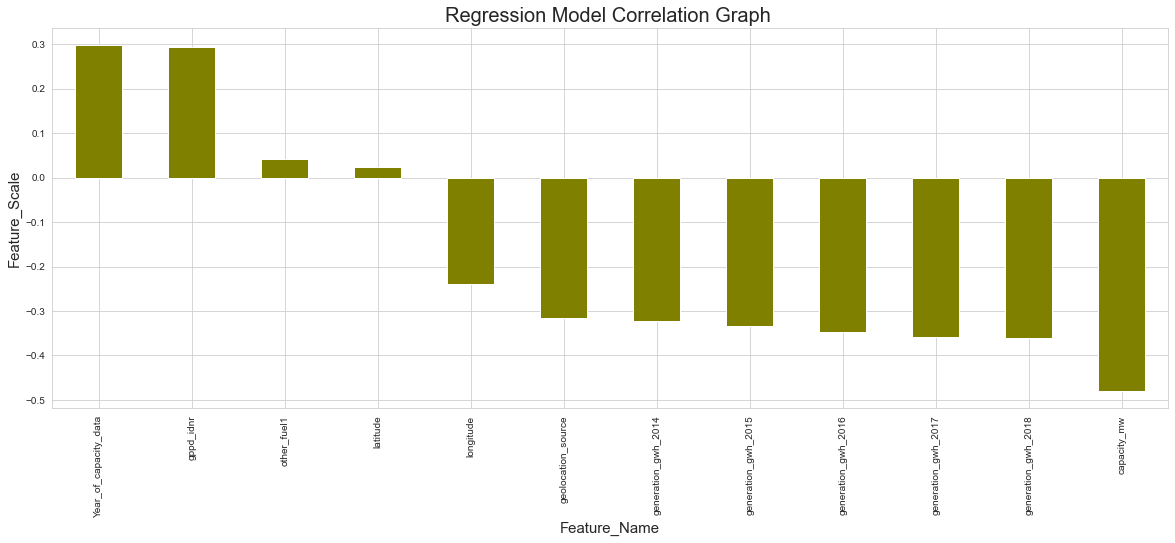

In [148]:
plt.figure(figsize=(20,7))
df.corr()['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot(kind='bar',color='olive')
plt.title("Regression Model Correlation Graph ",fontsize=20)
plt.xlabel("Feature_Name",fontsize=15, loc='center')
plt.ylabel("Feature_Scale",fontsize=15, loc='center')

## Observation Shows:

- capacity_mw is 48 percentage very negatively correlated with the target variable which is very week bond. 
- generation_gwh_2018 is 36 percentage negatively correlated with the target variable which is a very week bond.
- generation_gwh_2017 is 36 percentage negatively correlated with the target variable which is a  very week bond.
- generation_gwh_2016 is 35 percentage negatively correlated with the target variable which is a very week bond.
- generation_gwh_2015 is 33 percentage negatively correlated with the target variable which is a very week bond.
- generation_gwh_2014 is 32 percentage negatively correlated with the target variable which is a very week bond.
- geolocation_source is 32 percentage negatively correlated with the target variable is a very week bond.
- longitude is 24 percentage negatively correlated with the target variable is a week bond.
- latitude is 2 percentage positively correlated with the target variable which shows no good relation.
- other_fuel1 is 4 percentage positively corelated with the target variable which shows no good relation.
- gppd_idr is 30 percentage very positively correlated with the target variable which is very good bond.
- Year_of_capacity_data is 30 percentage positively correlated with the target variable which is a good bond.

`NOTE
1. Capacity_nw is very Negative
2. years_of_capacity_data is very positive

# Checking Outliers

<AxesSubplot:xlabel='gppd_idnr'>

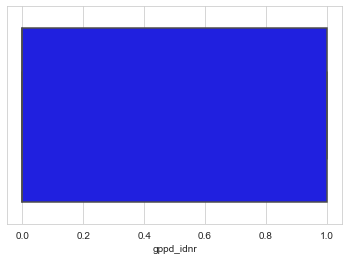

In [149]:
sns.boxplot(x='gppd_idnr',data=df,fliersize=6,color='blue')

Graph Shows No outliers

<AxesSubplot:xlabel='latitude'>

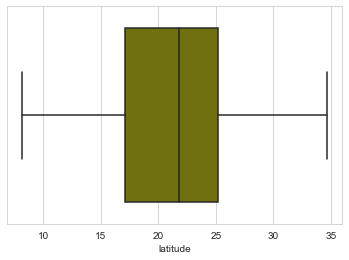

In [150]:
sns.boxplot(x='latitude',data=df,fliersize=6,color='olive')

Graph latitude Shows No outliers

<AxesSubplot:xlabel='longitude'>

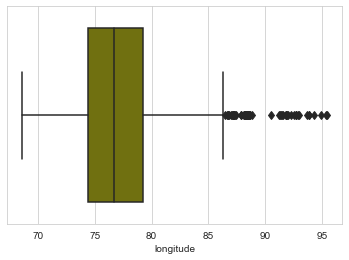

In [151]:
sns.boxplot(x='longitude',data=df,fliersize=6,color='olive')

Graph longitude Shows Outliers

<AxesSubplot:xlabel='primary_fuel'>

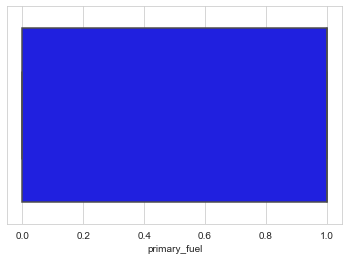

In [152]:
sns.boxplot(x='primary_fuel',data=df,fliersize=6,color='blue')

Graph primary_fuel Shows Outliers

<AxesSubplot:xlabel='other_fuel1'>

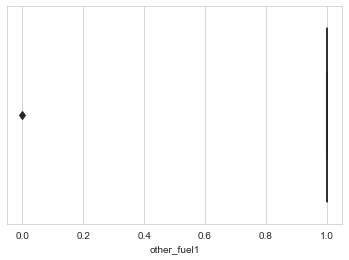

In [153]:
sns.boxplot(x='other_fuel1',data=df,fliersize=6,color='purple')

 Shows outlier but category Variable other_fuel1

<AxesSubplot:xlabel='geolocation_source'>

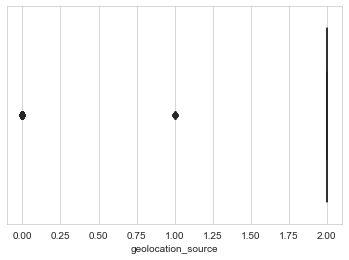

In [154]:
sns.boxplot(x='geolocation_source',data=df,fliersize=6,color='purple')

Category Variable geolocation_source shows outlier

<AxesSubplot:xlabel='generation_gwh_2014'>

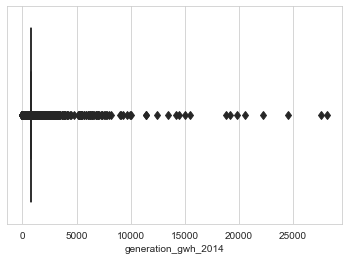

In [155]:
sns.boxplot(x='generation_gwh_2014',data=df,fliersize=6,color='purple')

generation_gwh_2014 SHows Huge Outliers

<AxesSubplot:xlabel='generation_gwh_2015'>

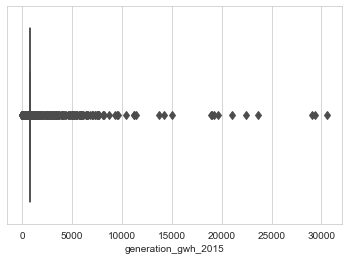

In [156]:
sns.boxplot(x='generation_gwh_2015',data=df,fliersize=6,color='blue')

generation_gwh_2015 Shows Huge Outliers

<AxesSubplot:xlabel='generation_gwh_2016'>

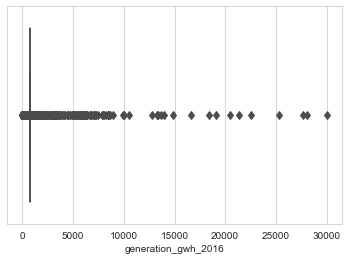

In [157]:
sns.boxplot(x='generation_gwh_2016',data=df,fliersize=6,color='blue')

generation_gwh_2016 Shows Huge Outliers

<AxesSubplot:xlabel='generation_gwh_2017'>

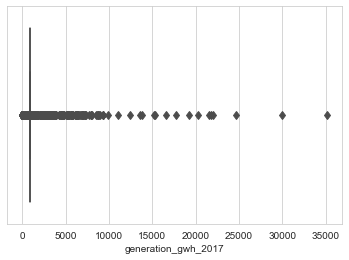

In [158]:
sns.boxplot(x='generation_gwh_2017',data=df,fliersize=6,color='blue')

generation_gwh_2017 Shows Huge Outliers

<AxesSubplot:xlabel='generation_gwh_2018'>

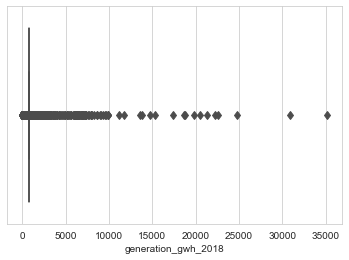

In [159]:
sns.boxplot(x='generation_gwh_2018',data=df,fliersize=6,color='blue')

generation_gwh_2018 Shows Huge Outliers

<AxesSubplot:xlabel='Year_of_capacity_data'>

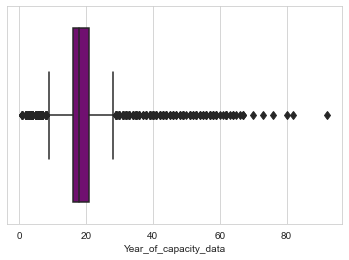

In [160]:
sns.boxplot(x='Year_of_capacity_data',data=df,fliersize=6,color='purple')

Year_of_capacity_data Graph Shows Huge Outliers

# Skewness

In [161]:
df.skew().sort_values()

other_fuel1             -30.116441
geolocation_source       -2.159841
primary_fuel             -0.441015
latitude                 -0.164152
gppd_idnr                 0.292409
longitude                 1.163320
Year_of_capacity_data     1.719575
capacity_mw               3.123576
generation_gwh_2018       5.133226
generation_gwh_2016       5.281953
generation_gwh_2017       5.315103
generation_gwh_2014       5.321360
generation_gwh_2015       5.566773
dtype: float64

# Observation:

### Skewness Threshold is taken is(+/-65).(Outcome shows, Column showing skewness are)

- other_fuel1             -30.116441
- geolocation_source       -2.159841
- longitude                 1.163320
- Year_of_capacity_data     1.719575
- capacity_mw               3.123576
- generation_gwh_2018       5.133226
- generation_gwh_2016       5.281953
- generation_gwh_2017       5.315103
- generation_gwh_2014       5.321360
- generation_gwh_2015       5.566773

<AxesSubplot:xlabel='other_fuel1', ylabel='Density'>

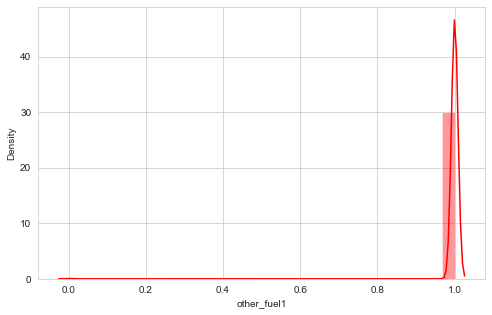

In [162]:
plt.figure(figsize=(8,5))
sns.distplot(df['other_fuel1'],color='r')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.

<AxesSubplot:xlabel='geolocation_source', ylabel='Density'>

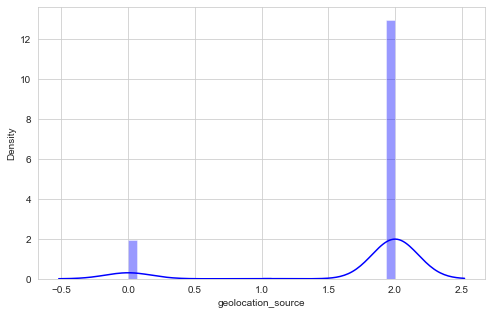

In [163]:
plt.figure(figsize=(8,5))
sns.distplot(df['geolocation_source'],color='b')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Bi-Modal)

<AxesSubplot:xlabel='longitude', ylabel='Density'>

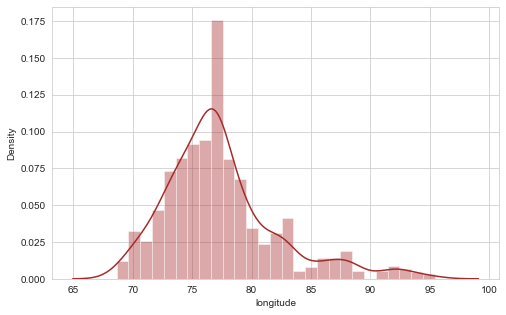

In [164]:
plt.figure(figsize=(8,5))
sns.distplot(df['longitude'],color='brown')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.

<AxesSubplot:xlabel='Year_of_capacity_data', ylabel='Density'>

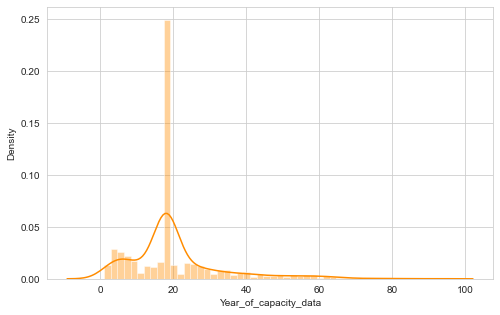

In [165]:
plt.figure(figsize=(8,5))
sns.distplot(df['Year_of_capacity_data'],color='darkorange')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

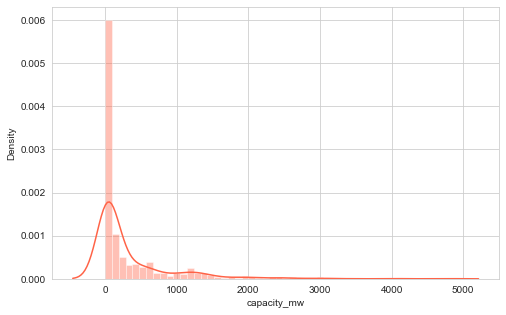

In [166]:
plt.figure(figsize=(8,5))
sns.distplot(df['capacity_mw'],color='tomato')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

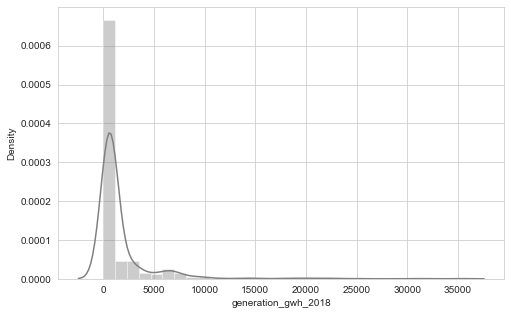

In [167]:
plt.figure(figsize=(8,5))
sns.distplot(df['generation_gwh_2018'],color='grey')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

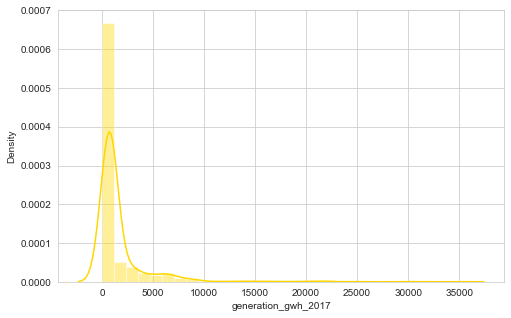

In [168]:
plt.figure(figsize=(8,5))
sns.distplot(df['generation_gwh_2017'],color='gold')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

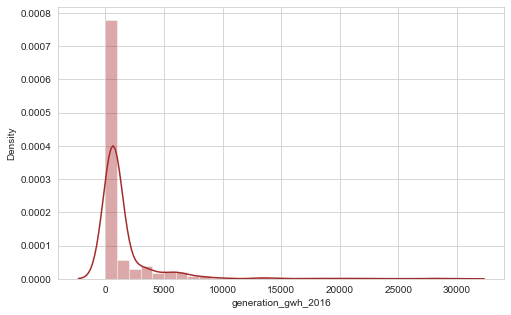

In [169]:
plt.figure(figsize=(8,5))
sns.distplot(df['generation_gwh_2016'],color='brown')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

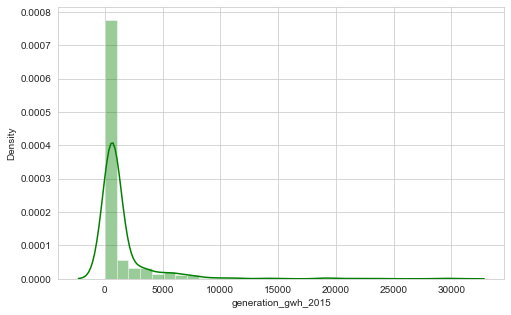

In [170]:
plt.figure(figsize=(8,5))
sns.distplot(df['generation_gwh_2015'],color='green')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

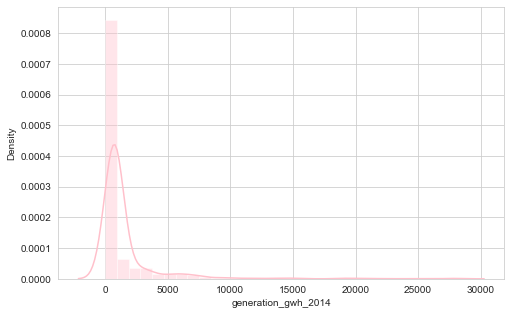

In [171]:
plt.figure(figsize=(8,5))
sns.distplot(df['generation_gwh_2014'],color='pink')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.

--------------------------

## Proceeding With Regression Model 

### * Logistic Model is after the Regression Model

--------------------

# Data Cleansing

## 1. Correlation

In [172]:
df.corr()['capacity_mw'].sort_values()

primary_fuel            -0.480222
gppd_idnr               -0.417896
Year_of_capacity_data   -0.211042
other_fuel1              0.003731
latitude                 0.048790
longitude                0.199299
geolocation_source       0.204865
generation_gwh_2014      0.793497
generation_gwh_2015      0.819676
generation_gwh_2016      0.853008
generation_gwh_2017      0.868338
generation_gwh_2018      0.884840
capacity_mw              1.000000
Name: capacity_mw, dtype: float64

### Droping Values

1. Primary_fuel as Highly Negative correlated with Target Variable.
2. Other_fuel1 is having no correlation

In [173]:
delete=pd.DataFrame(data={"Column_Name":['primary_fuel','other_fuel1'],
                         "Values":[-0.480222,0.003731],
                         "Outliers":['No','Yes'],
                         "Normalised":['Yes','No']})
delete

,Column_Name,Values,Outliers,Normalised
0,primary_fuel,-0.480222,No,Yes
1,other_fuel1,0.003731,Yes,No


In [174]:
df.drop(['primary_fuel','other_fuel1'],axis=1,inplace=True)

# Zscore

In [175]:
from scipy.stats import zscore

In [176]:
z=np.abs(zscore(df))

In [177]:
z.head(5)

,gppd_idnr,capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Year_of_capacity_data
0,1.156559,0.548908,1.144693,0.869917,1.083349,0.257022,0.267783,0.275737,0.275565,0.288394,0.933076
1,1.156559,0.386977,0.582324,0.585590,0.394241,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
2,1.156559,0.486679,0.111296,1.673567,0.394241,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
3,0.864634,0.324240,0.435034,2.895239,0.394241,0.322873,0.223348,0.226194,0.326203,0.327990,0.400812
4,0.864634,2.498942,0.120593,1.035238,0.394241,0.545554,1.476964,1.557432,1.224379,1.772608,1.237227


In [178]:
np.where(z>3)

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
        179, 183, 209, 209, 209, 209, 209, 209, 219, 222, 244, 308, 308,
        308, 308, 308, 308, 323, 333, 340, 342, 360, 363, 364, 364, 364,
        364, 364, 364, 371, 375, 416, 427, 444, 454, 478, 482, 482, 484,
        493, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494, 494, 499,
        519, 532, 538, 541, 546, 573, 577, 583, 592, 601, 621, 623, 638,
        648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657, 657, 695,
        695, 695, 695, 695, 695, 706, 709, 721, 721, 721, 721, 721, 724,
        724, 724, 724, 724, 726, 726, 726, 726, 726, 726, 728, 767, 786,
        786, 786, 786, 786, 786, 788, 807, 808, 808, 808, 808, 808, 808,
        818, 847, 848, 880, 880, 880, 880, 880, 880], dtype=int64),
 array([ 1,  6,  7,  8,  9,  1,  5,  6,  7,  8,  9,  1,  5,  3,  3,  1,  5,
         6,  7,  8,  9, 10, 10,  3,  1,  5,  6,  7,  8,  9,  3,  3,  3, 10,
         3,  1,  1,  5,  6,  7,  8,  9, 10,  1,  3

In [179]:
z.iloc[15,1]

3.906294028602196

In [180]:
new_df=df[(z<3).all(axis=1)]

In [181]:
new_df.head()

,gppd_idnr,capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Year_of_capacity_data
0,1,2.5,28.1839,73.2407,1,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,1,98.0,24.7663,74.6090,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,1,39.2,21.9038,69.3732,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,0,135.0,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,0,1800.0,21.9603,82.4091,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0


## Data Loss Percentage

In [182]:
print("Old Data Frame ",df.shape[0])
print("New_Data Frame ",new_df.shape[0])

Old Data Frame  907
New_Data Frame  846


In [183]:
print("Data Loss Percentage ",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Data Loss Percentage  6.725468577728775


#### However Data loss percentage is not more than 7 percentage so we will procced with the data set

In [184]:
new_df.head(4)

,gppd_idnr,capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Year_of_capacity_data
0,1,2.5,28.1839,73.2407,1,801.123775,711.181225,737.205450,817.97725,751.644375,8.0
1,1,98.0,24.7663,74.6090,2,801.123775,711.181225,737.205450,817.97725,751.644375,18.0
2,1,39.2,21.9038,69.3732,2,801.123775,711.181225,737.205450,817.97725,751.644375,18.0
3,0,135.0,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.77450,626.239128,15.0


In [185]:
# Spliting data for train and test

y=new_df.iloc[:,1] # y variable
x=new_df.drop(['capacity_mw'],axis=1)#x variable

In [186]:
x.head(4)

,gppd_idnr,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Year_of_capacity_data
0,1,28.1839,73.2407,1,801.123775,711.181225,737.205450,817.97725,751.644375,8.0
1,1,24.7663,74.6090,2,801.123775,711.181225,737.205450,817.97725,751.644375,18.0
2,1,21.9038,69.3732,2,801.123775,711.181225,737.205450,817.97725,751.644375,18.0
3,0,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.77450,626.239128,15.0


In [187]:
y.head(4)

0      2.5
1     98.0
2     39.2
3    135.0
Name: capacity_mw, dtype: float64

In [188]:
print("Present Size of X Data ",x.shape,"And present Size of Y Data ",y.shape)

Present Size of X Data  (846, 10) And present Size of Y Data  (846,)


In [189]:
x.columns

Index(['gppd_idnr', 'latitude', 'longitude', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'Year_of_capacity_data'],
      dtype='object')

# Checking Multicolinarity

In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif=pd.DataFrame()
    vif['Variable']=x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif
calc_vif(x)

,Variable,VIF Factors
0,gppd_idnr,2.290442
1,latitude,13.421292
2,longitude,35.628363
3,geolocation_source,9.424922
4,generation_gwh_2014,10.786178
5,generation_gwh_2015,20.968482
6,generation_gwh_2016,24.505163
7,generation_gwh_2017,32.394168
8,generation_gwh_2018,27.323417
9,Year_of_capacity_data,4.361748


# Removing Skewness

In [193]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

In [194]:
x=pd.DataFrame(data=x,columns=['gppd_idnr','latitude','longitude','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Year_of_capacity_data'])

In [195]:
x.skew()

gppd_idnr                0.171136
latitude                -0.072749
longitude                0.000318
geolocation_source      -2.030019
generation_gwh_2014      0.234988
generation_gwh_2015      0.168580
generation_gwh_2016      0.154255
generation_gwh_2017      0.131308
generation_gwh_2018      0.137478
Year_of_capacity_data    0.040771
dtype: float64

In [196]:
df['geolocation_source']=np.log(df['geolocation_source']+1)

In [197]:
x.skew()

gppd_idnr                0.171136
latitude                -0.072749
longitude                0.000318
geolocation_source      -2.030019
generation_gwh_2014      0.234988
generation_gwh_2015      0.168580
generation_gwh_2016      0.154255
generation_gwh_2017      0.131308
generation_gwh_2018      0.137478
Year_of_capacity_data    0.040771
dtype: float64

In [198]:
df['geolocation_source']=np.sqrt(df['geolocation_source']+1)

In [199]:
x.skew()

gppd_idnr                0.171136
latitude                -0.072749
longitude                0.000318
geolocation_source      -2.030019
generation_gwh_2014      0.234988
generation_gwh_2015      0.168580
generation_gwh_2016      0.154255
generation_gwh_2017      0.131308
generation_gwh_2018      0.137478
Year_of_capacity_data    0.040771
dtype: float64

In [200]:
x.drop(['geolocation_source'],axis=1,inplace=True)

# Standard Scaler(Standardization)

In [201]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(x)

In [202]:
x

array([[ 1.08905763,  1.16468806, -0.91818726, ..., -0.02578909,
        -0.04749522, -1.1084325 ],
       [ 1.08905763,  0.58934517, -0.49630095, ..., -0.02578909,
        -0.04749522,  0.03877261],
       [ 1.08905763,  0.11301779, -2.37396456, ..., -0.02578909,
        -0.04749522,  0.03877261],
       ...,
       [ 1.08905763, -0.96682645, -0.22115049, ..., -0.02578909,
        -0.04749522,  0.03877261],
       [ 1.08905763,  0.51974224, -0.75689461, ..., -0.02578909,
        -0.04749522,  0.03877261],
       [ 1.08905763, -1.80707231,  0.26334238, ..., -0.02578909,
        -0.04749522,  0.03877261]])

In [203]:
print("Mean ",round(x.mean()))
print("Standard Deviation ",round(x.std()))

Mean  0
Standard Deviation  1


# Principle Component Analysis

In [204]:
from sklearn.decomposition import PCA
pca=PCA(n_components=7)

x=pca.fit_transform(x)

# Target Variable

In [205]:
y.unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01, 2.40000e+01,
       6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00, 1.65000e+01,
       1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00, 7.05000e+02,
       2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03, 5.10000e+02,
       6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01, 3.15000e+02,
       3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02, 9.00000e+01,
       1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02, 2.28000e+01,
       1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03, 2.60000e+01,
       4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01, 5.00000e+02,
       8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01, 6.96000e+01,
       6.00000e+00, 7.50000e+02, 4.00000e+01, 1.65000e+02, 7.000

### However the value in target variable is continious we can use Linear Regression.

# Linear Regression

In [206]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [207]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lr.fit(x_train,y_train)
    
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(r2_score(y_train,pred_train),2)==round(r2_score(y_test,pred_test),2):
        print(f"At random State {i},The r2 train score {r2_score(y_train,pred_train)}, r2 test score {r2_score(y_test,pred_test)}")

At random State 3,The r2 train score 0.6480798382395637, r2 test score 0.6523542214241683
At random State 14,The r2 train score 0.6477261109477713, r2 test score 0.652772900829585
At random State 17,The r2 train score 0.6486424024445769, r2 test score 0.6483536946620592
At random State 30,The r2 train score 0.6475376335474411, r2 test score 0.6465670407866947
At random State 31,The r2 train score 0.6488255281092048, r2 test score 0.6467038935099714
At random State 66,The r2 train score 0.6471528456494151, r2 test score 0.6486282409721975
At random State 82,The r2 train score 0.6474175531800155, r2 test score 0.6506086329225751


In [208]:
# Train Test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=17,test_size=0.3)

#training 
lr.fit(x_train,y_train)
lr_score=lr.score(x_train,y_train)

#predict
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train)*100,"Testing Accuracy R2_score ",r2_score(y_test,pred_test)*100)
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  64.86424024445769 Testing Accuracy R2_score  64.83536946620592
Training Mean_squared_Error  61055.77725695753 Testing Mean_squared_error  63248.21129305594
Training Absolute_Error  149.72578873273872 Testing Absolute Error 162.36402533614867


In [209]:
print("Coefficient ",lr.coef_," Intercept ",lr.intercept_)

Coefficient  [124.66118605 139.7017985   20.00256521 -10.56994543 160.85286369
  58.85509859  14.77114712]  Intercept  265.37482475304733


### Model Cross Validation 

In [210]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    lr_cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=lr_cv_score.mean()

    print(f"At CROSS_FOLD {i}, Cross_Val_Mean {cv_mean} ,Training Score is {train_accuracy}, Testing Score {test_accuracy}")

At CROSS_FOLD 2, Cross_Val_Mean 0.6087809052175085 ,Training Score is 0.6486424024445769, Testing Score 0.6483536946620592
At CROSS_FOLD 3, Cross_Val_Mean 0.6264202980248706 ,Training Score is 0.6486424024445769, Testing Score 0.6483536946620592
At CROSS_FOLD 4, Cross_Val_Mean 0.62367567742457 ,Training Score is 0.6486424024445769, Testing Score 0.6483536946620592
At CROSS_FOLD 5, Cross_Val_Mean 0.633013493955992 ,Training Score is 0.6486424024445769, Testing Score 0.6483536946620592
At CROSS_FOLD 6, Cross_Val_Mean 0.6274754056006447 ,Training Score is 0.6486424024445769, Testing Score 0.6483536946620592
At CROSS_FOLD 7, Cross_Val_Mean 0.6100802361987981 ,Training Score is 0.6486424024445769, Testing Score 0.6483536946620592
At CROSS_FOLD 8, Cross_Val_Mean 0.62505828333338 ,Training Score is 0.6486424024445769, Testing Score 0.6483536946620592
At CROSS_FOLD 9, Cross_Val_Mean 0.615567836120121 ,Training Score is 0.6486424024445769, Testing Score 0.6483536946620592


### Selected Cross Fold 5 is close cv_score is close Testing Score

In [211]:
# pred training for linear regression
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with linear regression
lr_cv_score=cross_val_score(lr,x,y,cv=5) 
lr_mean=lr_cv_score.mean() #mean value

print("Cv_score of Model is ",lr_mean," The Training Score is ", train_accuracy," Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.633013493955992  The Training Score is  0.6486424024445769  Testing Score Stands  0.6483536946620592


### Linear Regression Graph Model

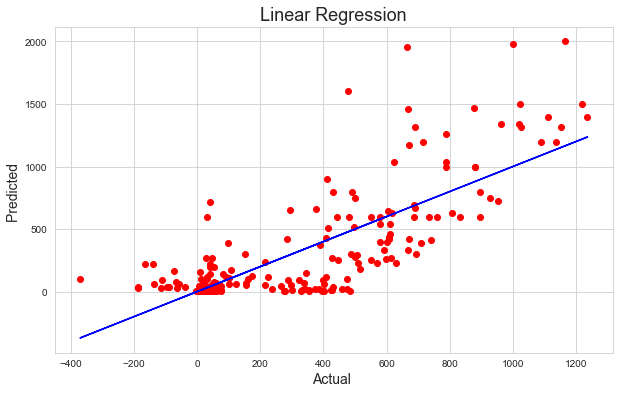

In [212]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='r')
plt.plot(pred_test,pred_test,color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

In [213]:
from sklearn.linear_model import ElasticNet
# Elastic Net Model
en=ElasticNet()
en.fit(x_train,y_train)

# training score
en_score_training=en.score(x_train,y_train)
en_score_training*100

61.16858779494861

In [214]:
pred_en=en.predict(x_test) # predict test

en_cv_score=cross_val_score(en,x,y,cv=5)
en_cv_mean=en_cv_score.mean()
en_cv_mean

0.6084371818554055

### Working With Other Models

# Model- Decision Tree Regressor

In [215]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

#training Dtc model
dtr.fit(x_train,y_train)
dtr_score=dtr.score(x_train,y_train)

#predict dtc
pred_train=dtr.predict(x_train)
pred_test=dtr.predict(x_test)

#result dtc
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.9998695307537091 Testing Accuracy R2_score  0.5769607500469975
Training Mean_squared_Error  22.6717774024024 Testing Mean_squared_error  76089.17102248454
Training Absolute_Error  0.5836711711711712 Testing Absolute Error 141.73040026246719


In [216]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    dtr_cv_score=cross_val_score(dtr,x,y,cv=i)
    cv_mean=dtr_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,The Training Score{train_accuracy}, Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score 0.5512248751232997 ,The Training Score0.9998695307537091, Testing Score0.5769607500469975
At CROSS_FOLD3, The Cross_Val_Score 0.5208091307239835 ,The Training Score0.9998695307537091, Testing Score0.5769607500469975
At CROSS_FOLD4, The Cross_Val_Score 0.5225950751858346 ,The Training Score0.9998695307537091, Testing Score0.5769607500469975
At CROSS_FOLD5, The Cross_Val_Score 0.5000422557759411 ,The Training Score0.9998695307537091, Testing Score0.5769607500469975
At CROSS_FOLD6, The Cross_Val_Score 0.4745305249047318 ,The Training Score0.9998695307537091, Testing Score0.5769607500469975
At CROSS_FOLD7, The Cross_Val_Score 0.46406283647516194 ,The Training Score0.9998695307537091, Testing Score0.5769607500469975
At CROSS_FOLD8, The Cross_Val_Score 0.47824598334715107 ,The Training Score0.9998695307537091, Testing Score0.5769607500469975
At CROSS_FOLD9, The Cross_Val_Score 0.4655266352145382 ,The Training Score0.9998695307537091, Testing Score0.5769607

In [217]:
#cross val with dtc
dtr_cv_score=cross_val_score(dtr,x,y,cv=2) 
dtr_mean=dtr_cv_score.mean() #mean value

print("Cv_score of Model is ",dtr_mean," The Training Score is ", train_accuracy," Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.5885322331585487  The Training Score is  0.9998695307537091  Testing Score Stands  0.5769607500469975


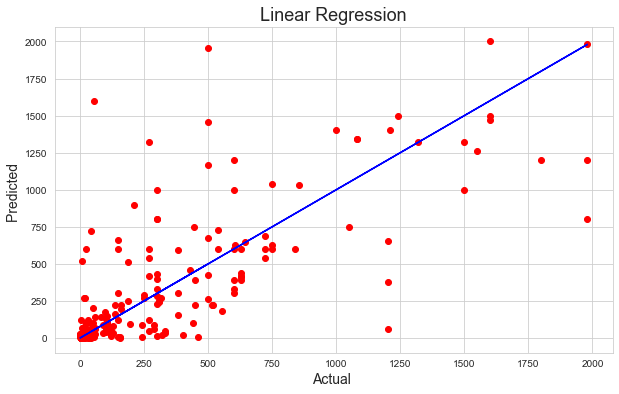

In [218]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='r')
plt.plot(pred_test,pred_test,color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# KNeighbors Regressor

In [219]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

#training knr model
knr.fit(x_train,y_train)
knr_score=knr.score(x_train,y_train)

#predict knr
pred_train=knr.predict(x_train)
pred_test=knr.predict(x_test)

#result knr
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.8336629683083758 Testing Accuracy R2_score  0.7255075830790639
Training Mean_squared_Error  28904.559990182974 Testing Mean_squared_error  49371.07007870441
Training Absolute_Error  87.03578581081081 Testing Absolute Error 115.90935511811024


In [220]:
#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    knr_cv_score=cross_val_score(knr,x,y,cv=i)
    cv_mean=knr_cv_score.mean()

    print(f"At CROSS_FOLD {i}, The Cross_Val_Mean {cv_mean} ,Training Score is {train_accuracy}, Testing Score{test_accuracy}")

At CROSS_FOLD 2, The Cross_Val_Mean 0.7126767292051736 ,Training Score is 0.8336629683083758, Testing Score0.7255075830790639
At CROSS_FOLD 3, The Cross_Val_Mean 0.7346158998762403 ,Training Score is 0.8336629683083758, Testing Score0.7255075830790639
At CROSS_FOLD 4, The Cross_Val_Mean 0.7294076952119453 ,Training Score is 0.8336629683083758, Testing Score0.7255075830790639
At CROSS_FOLD 5, The Cross_Val_Mean 0.7382913161343574 ,Training Score is 0.8336629683083758, Testing Score0.7255075830790639
At CROSS_FOLD 6, The Cross_Val_Mean 0.7429974647834187 ,Training Score is 0.8336629683083758, Testing Score0.7255075830790639
At CROSS_FOLD 7, The Cross_Val_Mean 0.7378867431324511 ,Training Score is 0.8336629683083758, Testing Score0.7255075830790639
At CROSS_FOLD 8, The Cross_Val_Mean 0.7432446015788878 ,Training Score is 0.8336629683083758, Testing Score0.7255075830790639
At CROSS_FOLD 9, The Cross_Val_Mean 0.7342960728795221 ,Training Score is 0.8336629683083758, Testing Score0.725507583

### # As this Cross Fold point 6 Cross_Val_Score is near to Training score.

In [221]:
#cross val with k-Neighbors
knr_cv_score=cross_val_score(knr,x,y,cv=6) 
knr_mean=knr_cv_score.mean() #mean value

print("Cv_score of Model is ",knr_mean," The Training Score", train_accuracy," Testing Score Stands" ,test_accuracy)

Cv_score of Model is  0.7429974647834187  The Training Score 0.8336629683083758  Testing Score Stands 0.7255075830790639


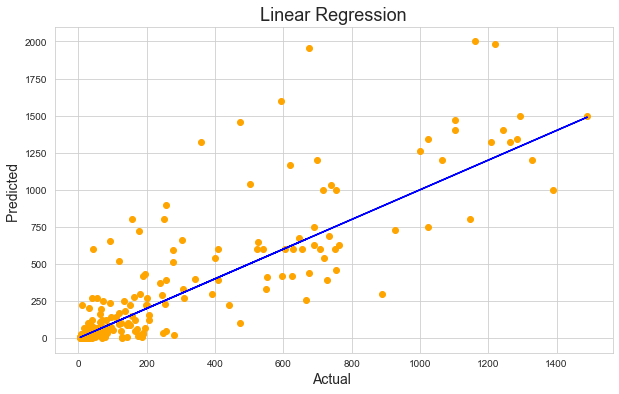

In [222]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orange')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Support Vector Machine(Regressor)

In [223]:
from sklearn.svm import SVR
svr=SVR()

#training SVR
svr.fit(x_train,y_train)
svr_score=svr.score(x_train,y_train)

#predict SVR
pred_train = svr.predict(x_train)
pred_test  = svr.predict(x_test)

#result SVR
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  -0.06802119562932107 Testing Accuracy R2_score  -0.10016497211753328
Training Mean_squared_Error  185591.16034417684 Testing Mean_squared_error  197879.134680051
Training Absolute_Error  218.84020415916402 Testing Absolute Error 233.7603302939523


# Model Cross_Validation

In [224]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    svr_cv_score=cross_val_score(svr,x,y,cv=i)
    cv_mean=svr_cv_score.mean()

    print(f"At CROSS_FOLD{i}, Cross_Val_Score{cv_mean} ,Training Score is {train_accuracy},Testing Score {test_accuracy} ")

At CROSS_FOLD2, Cross_Val_Score-0.12429759746827374 ,Training Score is -0.06802119562932107,Testing Score -0.10016497211753328 
At CROSS_FOLD3, Cross_Val_Score-0.08876216545149059 ,Training Score is -0.06802119562932107,Testing Score -0.10016497211753328 
At CROSS_FOLD4, Cross_Val_Score-0.07277655511123055 ,Training Score is -0.06802119562932107,Testing Score -0.10016497211753328 
At CROSS_FOLD5, Cross_Val_Score-0.06252312532430988 ,Training Score is -0.06802119562932107,Testing Score -0.10016497211753328 
At CROSS_FOLD6, Cross_Val_Score-0.05771256626516789 ,Training Score is -0.06802119562932107,Testing Score -0.10016497211753328 
At CROSS_FOLD7, Cross_Val_Score-0.05603702381885235 ,Training Score is -0.06802119562932107,Testing Score -0.10016497211753328 
At CROSS_FOLD8, Cross_Val_Score-0.05025836269945162 ,Training Score is -0.06802119562932107,Testing Score -0.10016497211753328 
At CROSS_FOLD9, Cross_Val_Score-0.04951260242600586 ,Training Score is -0.06802119562932107,Testing Scor

#### Selected Cross Fold is 3 as cv score is near to Training Score

In [225]:
svr_cv_score=cross_val_score(svr,x,y,cv=3) 
svr_mean=svr_cv_score.mean() # cross val mean

print("Cv_score of Model is ",svr_mean," The Training Score is ",train_accuracy," Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -0.08876216545149059  The Training Score is  -0.06802119562932107  Testing Score Stands  -0.10016497211753328


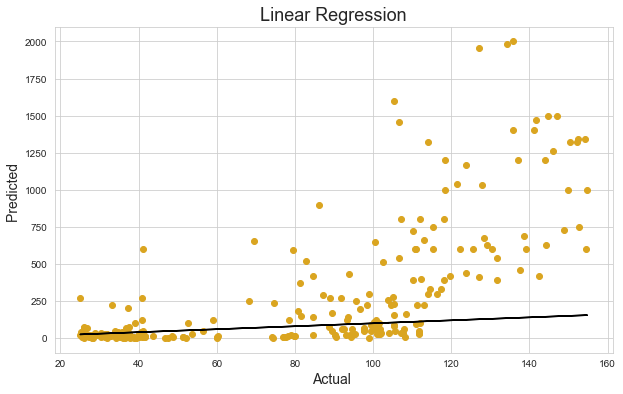

In [226]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='goldenrod')
plt.plot(pred_test,pred_test,color='black')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# SGD Regressor

In [227]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()

#training SGD
sgd.fit(x_train,y_train)
sgd_score=sgd.score(x_train,y_train)

#predict
pred_train=sgd.predict(x_train)
pred_test=sgd.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.6486043585027422 Testing Accuracy R2_score  0.6477204316699567
Training Mean_squared_Error  61062.388192525155 Testing Mean_squared_error  63362.11196802557
Training Absolute_Error  149.8548395799403 Testing Absolute Error 162.75874250135357


In [228]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    sgd_cv_score=cross_val_score(sgd,x,y,cv=i)
    cv_mean=sgd_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score 0.6118928980752254 ,Training Score is 0.6486043585027422,Testing Score0.6477204316699567
At CROSS_FOLD3, The Cross_Val_Score 0.6264954822243468 ,Training Score is 0.6486043585027422,Testing Score0.6477204316699567
At CROSS_FOLD4, The Cross_Val_Score 0.62604217042652 ,Training Score is 0.6486043585027422,Testing Score0.6477204316699567
At CROSS_FOLD5, The Cross_Val_Score 0.6352671681249362 ,Training Score is 0.6486043585027422,Testing Score0.6477204316699567
At CROSS_FOLD6, The Cross_Val_Score 0.6310880466204476 ,Training Score is 0.6486043585027422,Testing Score0.6477204316699567
At CROSS_FOLD7, The Cross_Val_Score 0.6088130283121831 ,Training Score is 0.6486043585027422,Testing Score0.6477204316699567
At CROSS_FOLD8, The Cross_Val_Score 0.6284038203334953 ,Training Score is 0.6486043585027422,Testing Score0.6477204316699567
At CROSS_FOLD9, The Cross_Val_Score 0.6170416895116847 ,Training Score is 0.6486043585027422,Testing Score0.6477204316699567


In [229]:
# As this Cross Fold 3 Cross_Val_Score is near to training score.

# pred training for SGD Regressor
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with SGD Regressor
sgd_cv_score=cross_val_score(sgd,x,y,cv=3) 
sgd_mean=sgd_cv_score.mean() #mean value

print("Cv_score of Model is ",sgd_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.6269671184515372  The Training Score is 0.6486043585027422 Testing Score Stands  0.6477204316699567


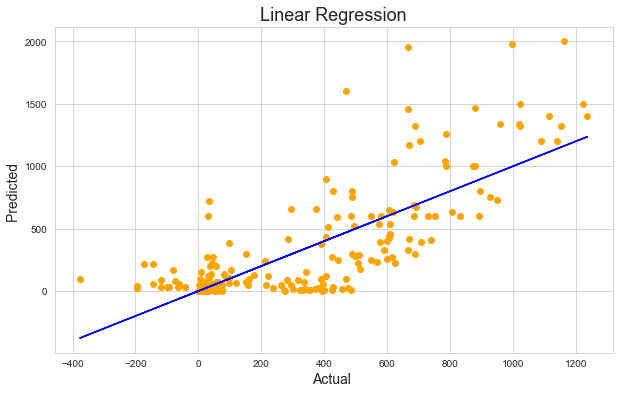

In [230]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orange')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Ensemble Techniques (Bagging)

## Extra Trees Regressor

In [231]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()

#training score
etr.fit(x_train,y_train)
etr_score=etr.score(x_train,y_train)

#predict
pred_train=etr.predict(x_train)
pred_test=etr.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.9998695307537091 Testing Accuracy R2_score  0.7687208380855945
Training Mean_squared_Error  22.6717774024024 Testing Mean_squared_error  41598.59801849858
Training Absolute_Error  0.5836711711711902 Testing Absolute Error 109.50703010498687


In [232]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,20):
    etr_cv_score=cross_val_score(etr,x,y,cv=i)
    cv_mean=etr_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score 0.7335899511396349 ,Training Score is 0.9998695307537091,Testing Score0.7687208380855945
At CROSS_FOLD3, The Cross_Val_Score 0.7615413858534609 ,Training Score is 0.9998695307537091,Testing Score0.7687208380855945
At CROSS_FOLD4, The Cross_Val_Score 0.7453385592548498 ,Training Score is 0.9998695307537091,Testing Score0.7687208380855945
At CROSS_FOLD5, The Cross_Val_Score 0.7442093171751538 ,Training Score is 0.9998695307537091,Testing Score0.7687208380855945
At CROSS_FOLD6, The Cross_Val_Score 0.7528193715671002 ,Training Score is 0.9998695307537091,Testing Score0.7687208380855945
At CROSS_FOLD7, The Cross_Val_Score 0.7507812145146221 ,Training Score is 0.9998695307537091,Testing Score0.7687208380855945
At CROSS_FOLD8, The Cross_Val_Score 0.75352399652937 ,Training Score is 0.9998695307537091,Testing Score0.7687208380855945
At CROSS_FOLD9, The Cross_Val_Score 0.7481822010252723 ,Training Score is 0.9998695307537091,Testing Score0.7687208380855945
At

### As this Cross Fold 15 Cross_Val_Score is near to training score.

In [233]:
# pred training for Extra Trees
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Extra Trees
etr_cv_score=cross_val_score(etr,x,y,cv=15) 
etr_mean=etr_cv_score.mean() #mean value

print("Cv_score of Model is ",etr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.7641309376655258  The Training Score is 0.9998695307537091 Testing Score Stands  0.7687208380855945


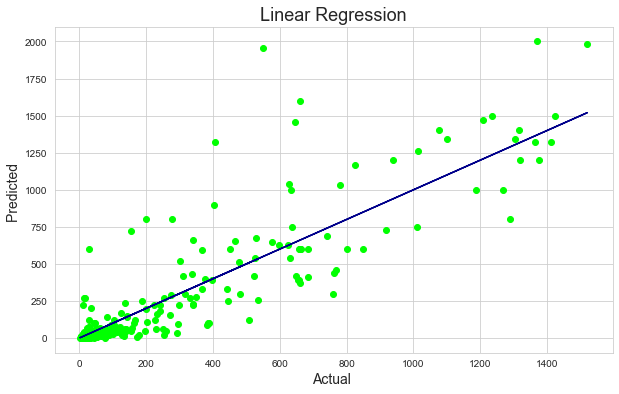

In [234]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='lime')
plt.plot(pred_test,pred_test,color='darkblue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Random Forest Regressor

In [235]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

#training Random Forest
rfr.fit(x_train,y_train)
rfr_score= rfr.score(x_train,y_train)

#predict Model
pred_train = rfr.predict(x_train)
pred_test = rfr.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.9605394799970915 Testing Accuracy R2_score  0.7732122355574956
Training Mean_squared_Error  6857.095837699233 Testing Mean_squared_error  40790.76113242382
Training Absolute_Error  41.04149744842105 Testing Absolute Error 111.80650788108437


## Model Cross_Validation

In [236]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    rfr_cv_score=cross_val_score(rfr,x,y,cv=i)
    cv_mean=rfr_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score 0.7310583690871415 ,Training Score is 0.9605394799970915,Testing Score0.7732122355574956
At CROSS_FOLD3, The Cross_Val_Score 0.7274429232338462 ,Training Score is 0.9605394799970915,Testing Score0.7732122355574956
At CROSS_FOLD4, The Cross_Val_Score 0.7225755791622663 ,Training Score is 0.9605394799970915,Testing Score0.7732122355574956
At CROSS_FOLD5, The Cross_Val_Score 0.7210995326872505 ,Training Score is 0.9605394799970915,Testing Score0.7732122355574956
At CROSS_FOLD6, The Cross_Val_Score 0.7337182223167024 ,Training Score is 0.9605394799970915,Testing Score0.7732122355574956
At CROSS_FOLD7, The Cross_Val_Score 0.7266048288959824 ,Training Score is 0.9605394799970915,Testing Score0.7732122355574956
At CROSS_FOLD8, The Cross_Val_Score 0.7339193908246258 ,Training Score is 0.9605394799970915,Testing Score0.7732122355574956
At CROSS_FOLD9, The Cross_Val_Score 0.721584055622973 ,Training Score is 0.9605394799970915,Testing Score0.7732122355574956


### Selected Cross Fold 3 Cross_Val_Score is near to training score

In [237]:
# pred training for Random Forest
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Random Forest
rfr_cv_score=cross_val_score(rfr,x,y,cv=3) 
rfr_mean=rfr_cv_score.mean()

print("Cv_score of Model is ",rfr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.7310344830671526  The Training Score is 0.9605394799970915 Testing Score Stands  0.7732122355574956


### Graph Ploting for Random Forest Regressor

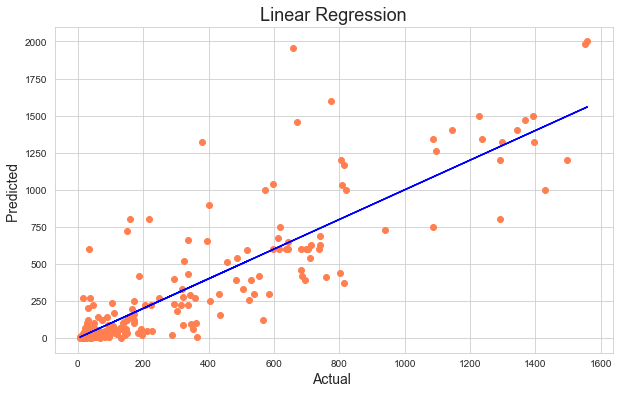

In [238]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='coral')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Ensemble Techniques (Boosting )

# Ada Boost

In [239]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

#training_ada_Boost
ada.fit(x_train,y_train)
ada_score= ada.score(x_train,y_train)

#predict_ada_Boost
pred_train = ada.predict(x_train)
pred_test = ada.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.7144355129331577 Testing Accuracy R2_score  0.5989927990865976
Training Mean_squared_Error  49622.83962594605 Testing Mean_squared_error  72126.41733583222
Training Absolute_Error  205.6521998100793 Testing Absolute Error 229.39481982743277


## Model Cross Validation

In [240]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    ada_cv_score=cross_val_score(ada,x,y,cv=i)
    cv_mean=ada_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score 0.5321642896449708 ,Training Score is 0.7144355129331577,Testing Score0.5989927990865976
At CROSS_FOLD3, The Cross_Val_Score 0.5413240695029544 ,Training Score is 0.7144355129331577,Testing Score0.5989927990865976
At CROSS_FOLD4, The Cross_Val_Score 0.4874928983662362 ,Training Score is 0.7144355129331577,Testing Score0.5989927990865976
At CROSS_FOLD5, The Cross_Val_Score 0.4734932677813079 ,Training Score is 0.7144355129331577,Testing Score0.5989927990865976
At CROSS_FOLD6, The Cross_Val_Score 0.45907269011426904 ,Training Score is 0.7144355129331577,Testing Score0.5989927990865976
At CROSS_FOLD7, The Cross_Val_Score 0.43663667105932863 ,Training Score is 0.7144355129331577,Testing Score0.5989927990865976
At CROSS_FOLD8, The Cross_Val_Score 0.41576337247573203 ,Training Score is 0.7144355129331577,Testing Score0.5989927990865976
At CROSS_FOLD9, The Cross_Val_Score 0.4175315478066613 ,Training Score is 0.7144355129331577,Testing Score0.59899279908659

### As this Cross Fold 3 Cross_Val_Score is near to Training score

In [241]:
# pred training for Ada Boost
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Ada Boost
ada_cv_score=cross_val_score(ada,x,y,cv=3) 
ada_mean=ada_cv_score.mean() # mean value

print("Cv_score of Model is ",ada_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.550132458736476  The Training Score is 0.7144355129331577 Testing Score Stands  0.5989927990865976


## Graph Ploting 

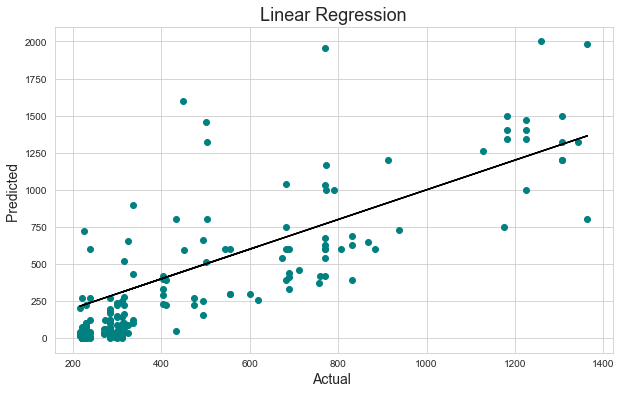

In [242]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='teal')
plt.plot(pred_test,pred_test,color='black')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Gradient Boost

In [335]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

#training_Gradient_Boost
gbr.fit(x_train,y_train)
gbr_score= gbr.score(x_train,y_train)

#predict_gbr
pred_train = gbr.predict(x_train)
pred_test = gbr.predict(x_test)

#result_gbr
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.9627069557576021 Testing Accuracy R2_score  0.7547340363043479
Training Mean_squared_Error  6480.451307555807 Testing Mean_squared_error  44114.30821065948
Training Absolute_Error  52.76277197653644 Testing Absolute Error 115.09269394198296


In [336]:
from sklearn.model_selection import cross_val_score

# testing
train_accuracy=r2_score(y_train,pred_train)
test_accuracy =r2_score(y_test,pred_test)

#cross validation
for i in range(2,20):
    gbr_cv_score=cross_val_score(gbr,x,y,cv=i)
    cv_mean=gbr_cv_score.mean()
    
    print(f"At CROSS_FOLD{i}, Cross_Val_Score is {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, Cross_Val_Score is 0.7311041444413864 ,Training Score is 0.9627069557576021,Testing Score0.7547340363043479
At CROSS_FOLD3, Cross_Val_Score is 0.7240453880917167 ,Training Score is 0.9627069557576021,Testing Score0.7547340363043479
At CROSS_FOLD4, Cross_Val_Score is 0.6976148706823596 ,Training Score is 0.9627069557576021,Testing Score0.7547340363043479
At CROSS_FOLD5, Cross_Val_Score is 0.7013486501036942 ,Training Score is 0.9627069557576021,Testing Score0.7547340363043479
At CROSS_FOLD6, Cross_Val_Score is 0.7204676998465062 ,Training Score is 0.9627069557576021,Testing Score0.7547340363043479
At CROSS_FOLD7, Cross_Val_Score is 0.7167950392348917 ,Training Score is 0.9627069557576021,Testing Score0.7547340363043479
At CROSS_FOLD8, Cross_Val_Score is 0.7203159869934738 ,Training Score is 0.9627069557576021,Testing Score0.7547340363043479
At CROSS_FOLD9, Cross_Val_Score is 0.7142020697461364 ,Training Score is 0.9627069557576021,Testing Score0.7547340363043479
At CROSS

### Selected Model Cross Fold 2 Cross_val_score is near to Training score

In [245]:
# As this Cross Fold 2 Cross_Val_Score is near to training score.

# pred training for Gradient Boost
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Gradient Boost
gbr_cv_score=cross_val_score(gbr,x,y,cv=2) 
gbr_mean=gbr_cv_score.mean() # mean value

print("Cv_score of Model is ",gbr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.7312330341772459  The Training Score is 0.9627069557576021 Testing Score Stands  0.7555794189129598


## Model Graph Ploting

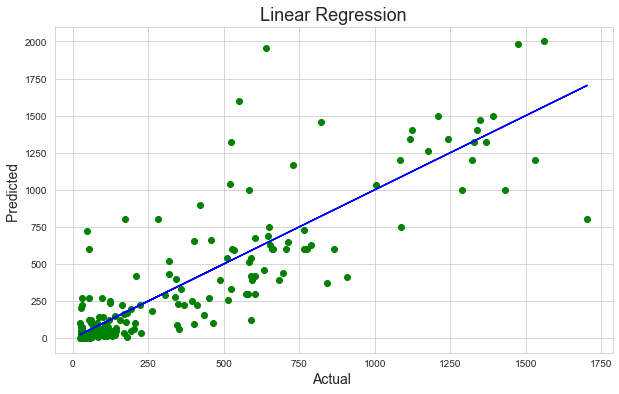

In [246]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='green')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Neural Network (MLPRegressor)

In [247]:
from sklearn.neural_network import MLPRegressor
mlp= MLPRegressor()

#training
#training_mlp
mlp.fit(x_train,y_train)
mlp_score= mlp.score(x_train,y_train)

#predict_mlp
pred_train = mlp.predict(x_train)
pred_test = mlp.predict(x_test)

#result_mlp
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.20739950410756514 Testing Accuracy R2_score  0.1720279497600592
Training Mean_squared_Error  137731.017253239 Testing Mean_squared_error  148921.6590175568
Training Absolute_Error  192.64293319156332 Testing Absolute Error 201.75826612757402


### Model Cross validation

In [248]:
from sklearn.model_selection import cross_val_score

# testing
train_accuracy=r2_score(y_train,pred_train)
test_accuracy =r2_score(y_test,pred_test)

#cross validation
for i in range(2,10):
    mlp_cv_score=cross_val_score(mlp,x,y,cv=i)
    cv_mean=mlp_cv_score.mean()
    
    print(f"At CROSS_FOLD{i}, Cross_Val_Score is {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, Cross_Val_Score is 0.15229666820828086 ,Training Score is 0.20739950410756514,Testing Score0.1720279497600592
At CROSS_FOLD3, Cross_Val_Score is 0.17144322486773667 ,Training Score is 0.20739950410756514,Testing Score0.1720279497600592
At CROSS_FOLD4, Cross_Val_Score is 0.43741867834770576 ,Training Score is 0.20739950410756514,Testing Score0.1720279497600592
At CROSS_FOLD5, Cross_Val_Score is 0.4742555162298725 ,Training Score is 0.20739950410756514,Testing Score0.1720279497600592
At CROSS_FOLD6, Cross_Val_Score is 0.484810648939447 ,Training Score is 0.20739950410756514,Testing Score0.1720279497600592
At CROSS_FOLD7, Cross_Val_Score is 0.4641229438503083 ,Training Score is 0.20739950410756514,Testing Score0.1720279497600592
At CROSS_FOLD8, Cross_Val_Score is 0.47796775744930226 ,Training Score is 0.20739950410756514,Testing Score0.1720279497600592
At CROSS_FOLD9, Cross_Val_Score is 0.47786522488564004 ,Training Score is 0.20739950410756514,Testing Score0.1720279497600

### Selected Cross Fold 5 Cross_Val_Score is near to training score

In [249]:
# pred training for MLP Regressor
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with MLP Regressor
mlp_cv_score=cross_val_score(mlp,x,y,cv=5) 
mlp_mean=mlp_cv_score.mean() # mean value

print("Cv_score of Model is ",mlp_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.4753042636588277  The Training Score is 0.20739950410756514 Testing Score Stands  0.1720279497600592


## Graph plot for Model

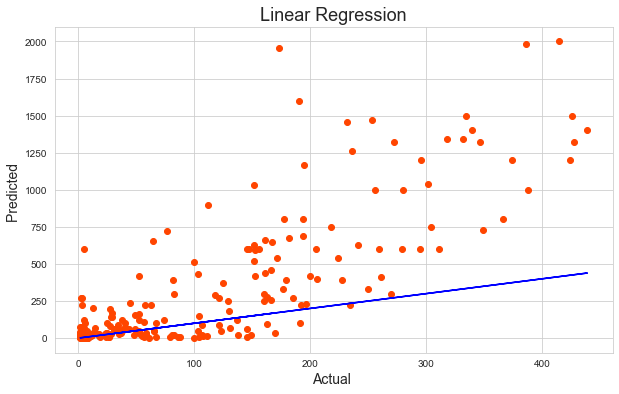

In [250]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orangered')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# BaggingRegressor

In [251]:
from sklearn.ensemble import BaggingRegressor
br= BaggingRegressor()

#training
#training_mlp
br.fit(x_train,y_train)
br_score= br.score(x_train,y_train)

#predict_mlp
pred_train = br.predict(x_train)
pred_test = br.predict(x_test)

#result_mlp
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.9598590451447048 Testing Accuracy R2_score  0.7363547663638756
Training Mean_squared_Error  6975.33571375213 Testing Mean_squared_error  47420.06155133499
Training Absolute_Error  43.3330567227536 Testing Absolute Error 117.95085891536286


## Bagging Regressor(Cross_val_score)

In [252]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    br_cv_score=cross_val_score(br,x,y,cv=i)
    cv_mean=br_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score 0.7134463245582318 ,Training Score is 0.9598590451447048,Testing Score0.7363547663638756
At CROSS_FOLD3, The Cross_Val_Score 0.720777744658028 ,Training Score is 0.9598590451447048,Testing Score0.7363547663638756
At CROSS_FOLD4, The Cross_Val_Score 0.7134304021778998 ,Training Score is 0.9598590451447048,Testing Score0.7363547663638756
At CROSS_FOLD5, The Cross_Val_Score 0.6753874252295533 ,Training Score is 0.9598590451447048,Testing Score0.7363547663638756
At CROSS_FOLD6, The Cross_Val_Score 0.7296587627669241 ,Training Score is 0.9598590451447048,Testing Score0.7363547663638756
At CROSS_FOLD7, The Cross_Val_Score 0.7052549664300151 ,Training Score is 0.9598590451447048,Testing Score0.7363547663638756
At CROSS_FOLD8, The Cross_Val_Score 0.7117489419126464 ,Training Score is 0.9598590451447048,Testing Score0.7363547663638756
At CROSS_FOLD9, The Cross_Val_Score 0.7135344850362986 ,Training Score is 0.9598590451447048,Testing Score0.7363547663638756


### Selected Cross Fold 2 Cross_Val_Score is near to training score.

In [253]:
# pred training for Random Forest
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Random Forest
br_cv_score=cross_val_score(br,x,y,cv=2) 
br_mean=br_cv_score.mean()

print("Cv_score of Model is ",br_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.7052425167810186  The Training Score is 0.9598590451447048 Testing Score Stands  0.7363547663638756


## Model Graph 

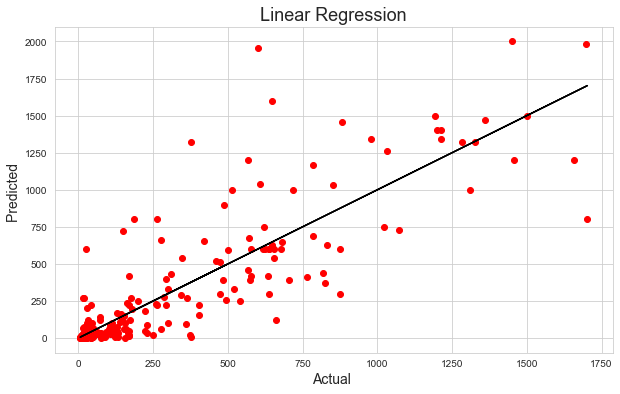

In [254]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='red')
plt.plot(pred_test,pred_test,color='black')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

-------------------------

# Hyper-Parameter With Models

###### Extra Trees Regressor and Random Forest, Gradient Boost Regressor  are working very close 

###### we selected them due the following reasons:

- R2 Score is better for the model.
- CV Score better for these model they are nearer to training score.
- "MSE" and "MAE" are less on compare to other models.(They are close to the mean)

# Extra Trees with Grid Search CV

In [259]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()

parameters={'n_estimators':list(range(100,105)),
            'criterion':['squared_error', 'absolute_error'],
            'min_samples_split':[2],
            'min_samples_leaf':[1],
            'min_weight_fraction_leaf':[0.0],
            'max_features':['sqrt', 'log2'],
           'n_jobs':[1,2],
           'min_impurity_decrease':[0.0],
           'verbose':[0],
              'ccp_alpha':[0,0] }

gsv=GridSearchCV(etr,parameters,cv=15)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Best Parameter  {'ccp_alpha': 0, 'criterion': 'absolute_error', 'max_features': 1, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 102, 'n_jobs': 2, 'verbose': 0} Best Score  0.7004232636595429


In [288]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()

parameters={'n_estimators':list(range(100,101)),
            'criterion':['squared_error', 'absolute_error'],
            'max_features':['sqrt', 'log2','None']}


gsv=GridSearchCV(etr,parameters,cv=15)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Best Parameter  {'criterion': 'absolute_error', 'max_features': 'log2', 'n_estimators': 100} Best Score  0.7291671983060876


In [301]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor(n_estimators=102,min_samples_leaf= 1, max_leaf_nodes=10008,min_weight_fraction_leaf= 0.000001,
                        min_impurity_decrease=0.0 ,criterion= 'absolute_error',min_samples_split= 3 ,ccp_alpha=0.1 ,max_features= 'sqrt',random_state=42,n_jobs=3 )

#training score
etr.fit(x_train,y_train)
etr_score=rfr.score(x_train,y_train)

#predict
pred_train=etr.predict(x_train)
pred_test=etr.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test)) 

Training Accuracy r2_score  0.9763156459622445 Testing Accuracy R2_score  0.7500581354672499
Training Mean_squared_Error  4115.654975629257 Testing Mean_squared_error  44955.330452727205
Training Absolute_Error  27.809285605458406 Testing Absolute Error 110.69301752354484


## Cross Validation_Model

In [302]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,20):
    etr_cv_score=cross_val_score(etr,x,y,cv=i)
    cv_mean=etr_cv_score.mean()

    print(f"At CROSS_FOLD {i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD 2, The Cross_Val_Score 0.7299361585788328 ,Training Score is 0.9763156459622445,Testing Score0.7500581354672499
At CROSS_FOLD 3, The Cross_Val_Score 0.7530737685880617 ,Training Score is 0.9763156459622445,Testing Score0.7500581354672499
At CROSS_FOLD 4, The Cross_Val_Score 0.7494655588840737 ,Training Score is 0.9763156459622445,Testing Score0.7500581354672499
At CROSS_FOLD 5, The Cross_Val_Score 0.7553213581376458 ,Training Score is 0.9763156459622445,Testing Score0.7500581354672499
At CROSS_FOLD 6, The Cross_Val_Score 0.761069319037155 ,Training Score is 0.9763156459622445,Testing Score0.7500581354672499
At CROSS_FOLD 7, The Cross_Val_Score 0.7570288169465631 ,Training Score is 0.9763156459622445,Testing Score0.7500581354672499
At CROSS_FOLD 8, The Cross_Val_Score 0.7646786000821513 ,Training Score is 0.9763156459622445,Testing Score0.7500581354672499
At CROSS_FOLD 9, The Cross_Val_Score 0.7588436287710044 ,Training Score is 0.9763156459622445,Testing Score0.7500581354

##### selected cross fold 15 as cv score is close to traning score

In [303]:
# pred training for Extra Trees
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Extra Trees
etr_cv_score=cross_val_score(etr,x,y,cv=6) 
etr_mean=etr_cv_score.mean() #mean value

print("Cv_score of Model is ",etr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.761069319037155  The Training Score is 0.9763156459622445 Testing Score Stands  0.7500581354672499


## Model Graph

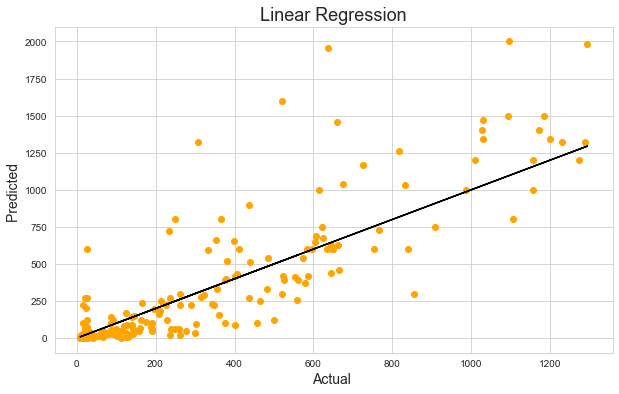

In [304]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orange')
plt.plot(pred_test,pred_test,color='black')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Gradient Boosting Regressor

In [338]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={ 'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
           'criterion':['friedman_mse', 'squared_error', 'mse'],
           'max_features':['auto', 'sqrt', 'log2']}

gsv=GridSearchCV(gbr,parameters,cv=15,)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Best Parameter  {'criterion': 'friedman_mse', 'loss': 'huber', 'max_features': 'auto'} Best Score  0.7542077462121832


In [363]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(criterion= 'friedman_mse', loss='huber', max_features= 'auto', n_estimators= 119,
                              min_impurity_decrease=0.0000001,min_samples_split=2 ,ccp_alpha=0.0001)

#training_Gradient_Boost
gbr.fit(x_train,y_train)
gbr_score= gbr.score(x_train,y_train)

#predict_gbr
pred_train = gbr.predict(x_train)
pred_test = gbr.predict(x_test)

#result_gbr
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.9219692445789962 Testing Accuracy R2_score  0.7596846813270941
Training Mean_squared_Error  13559.485991833237 Testing Mean_squared_error  43223.86961459729
Training Absolute_Error  51.59861409122738 Testing Absolute Error 109.03407029675073


# Model Cross Val Score

In [364]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,20):
    etr_cv_score=cross_val_score(etr,x,y,cv=i)
    cv_mean=etr_cv_score.mean()

    print(f"At CROSS_FOLD {i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD 2, The Cross_Val_Score 0.7299361585788328 ,Training Score is 0.9219692445789962,Testing Score0.7596846813270941
At CROSS_FOLD 3, The Cross_Val_Score 0.7530737685880617 ,Training Score is 0.9219692445789962,Testing Score0.7596846813270941
At CROSS_FOLD 4, The Cross_Val_Score 0.7494655588840737 ,Training Score is 0.9219692445789962,Testing Score0.7596846813270941
At CROSS_FOLD 5, The Cross_Val_Score 0.7553213581376458 ,Training Score is 0.9219692445789962,Testing Score0.7596846813270941
At CROSS_FOLD 6, The Cross_Val_Score 0.761069319037155 ,Training Score is 0.9219692445789962,Testing Score0.7596846813270941
At CROSS_FOLD 7, The Cross_Val_Score 0.7570288169465631 ,Training Score is 0.9219692445789962,Testing Score0.7596846813270941
At CROSS_FOLD 8, The Cross_Val_Score 0.7646786000821513 ,Training Score is 0.9219692445789962,Testing Score0.7596846813270941
At CROSS_FOLD 9, The Cross_Val_Score 0.7588436287710044 ,Training Score is 0.9219692445789962,Testing Score0.7596846813

### selecting Cross fold 15 as cv_score is closer to training score

In [365]:
# pred training for Extra Trees
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Extra Trees
etr_cv_score=cross_val_score(etr,x,y,cv=15) 
etr_mean=etr_cv_score.mean() #mean value

print("Cv_score of Model is ",etr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.7721519645396974  The Training Score is 0.9219692445789962 Testing Score Stands  0.7596846813270941


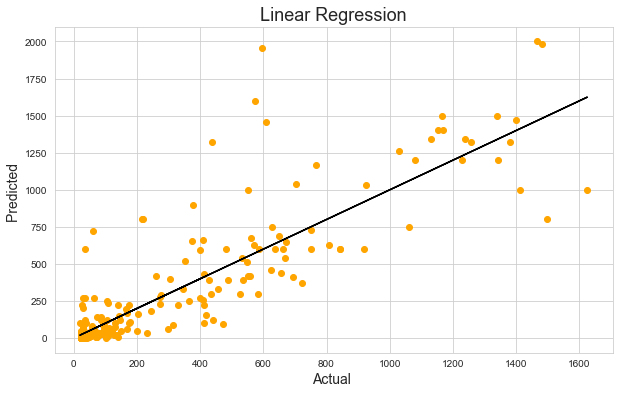

In [366]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orange')
plt.plot(pred_test,pred_test,color='black')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Saving Model

selected this model as its:
- R2 Score is better for the model.
- CV Score better for these model they are nearer to training score.
- "MSE" and "MAE" are less on compare to other models.(They are close to the mean)

In [370]:
import pickle
filename="global_pred.pkl"
pickle.dump(gbr, open(filename, 'wb'))

In [371]:
import pickle
model = pickle.load(open('global_pred.pkl', 'rb'))
result=model.score(x_test,y_test)
print(result*100)

75.9684681327094


In [372]:
new_df1=pd.DataFrame([model.predict(x_test)[:],pred_test[:]],index=["Predicted","Original"])

In [373]:
new_df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,...,241,242,243,244,245,246,247,248,249,250,251,252,253
Predicted,410.737117,177.421399,23.107356,572.436401,29.486035,67.47277,536.596138,29.486035,312.79856,173.681014,427.471078,84.888727,139.157834,...,23.107356,71.33552,410.779415,702.618885,94.885775,70.932099,36.461209,305.696481,29.486035,141.984194,29.486035,29.486035,64.824056
Original,410.737117,177.421399,23.107356,572.436401,29.486035,67.47277,536.596138,29.486035,312.79856,173.681014,427.471078,84.888727,139.157834,...,23.107356,71.33552,410.779415,702.618885,94.885775,70.932099,36.461209,305.696481,29.486035,141.984194,29.486035,29.486035,64.824056


-----------------------------

# Logistic Regression

------------------

# Data Cleansing

In [174]:
df.head(5)

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Year_of_capacity_data
0,1,2.5,28.1839,73.2407,1,1,1,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,1,98.0,24.7663,74.6090,0,1,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,1,39.2,21.9038,69.3732,1,1,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,0,135.0,23.8712,91.3602,0,1,2,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,0,1800.0,21.9603,82.4091,0,1,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0


In [163]:
df['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [164]:
df.corr().primary_fuel.sort_values()

geolocation_source      -0.483217
capacity_mw             -0.380395
longitude               -0.352056
generation_gwh_2018     -0.271198
generation_gwh_2017     -0.263599
generation_gwh_2016     -0.259708
generation_gwh_2015     -0.249304
generation_gwh_2014     -0.240656
latitude                -0.007538
other_fuel1              0.032156
Year_of_capacity_data    0.054885
gppd_idnr                0.500558
primary_fuel             1.000000
Name: primary_fuel, dtype: float64

#### deleting as these shows no good relation with Target variable.

- geolocation_source  is very poorly correlated with target variable
- latitude close to zero.


In [165]:
delete=pd.DataFrame({'Columns':['geolocation_source','latitude'],'Values':[-0.483217,-0.007538],
        'Outliers':['Y','Y'],'Normalised':['N','Y']})

In [166]:
delete

,Columns,Values,Outliers,Normalised
0,geolocation_source,-0.483217,Y,N
1,latitude,-0.007538,Y,Y


In [167]:
df.drop(['geolocation_source','latitude'],axis=1,inplace=True)

In [168]:
df.columns

Index(['gppd_idnr', 'capacity_mw', 'longitude', 'primary_fuel', 'other_fuel1',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'Year_of_capacity_data'],
      dtype='object')

# Removing Outliers

In [169]:
from scipy.stats import zscore

In [170]:
z=np.abs(zscore(df))
z.head()

,gppd_idnr,capacity_mw,longitude,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Year_of_capacity_data
0,1.156559,0.548908,0.869917,1.225688,0.033223,0.257022,0.267783,0.275737,0.275565,0.288394,0.933076
1,1.156559,0.386977,0.585590,0.967877,0.033223,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
2,1.156559,0.486679,1.673567,1.664401,0.033223,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
3,0.864634,0.324240,2.895239,0.529164,0.033223,0.322873,0.223348,0.226194,0.326203,0.327990,0.400812
4,0.864634,2.498942,1.035238,0.967877,0.033223,0.545554,1.476964,1.557432,1.224379,1.772608,1.237227


In [171]:
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       179, 183, 209, 209, 209, 209, 209, 209, 219, 222, 244, 308, 308,
       308, 308, 308, 308, 323, 333, 340, 342, 360, 363, 364, 364, 364,
       364, 364, 364, 371, 375, 416, 427, 444, 454, 478, 482, 482, 484,
       493, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494, 494, 499,
       519, 532, 538, 541, 546, 573, 577, 583, 592, 601, 621, 623, 638,
       648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657, 657, 695,
       695, 695, 695, 695, 695, 706, 709, 721, 721, 721, 721, 721, 724,
       724, 724, 724, 724, 726, 726, 726, 726, 726, 726, 728, 767, 786,
       786, 786, 786, 786, 786, 788, 807, 808, 808, 808, 808, 808, 808,
       811, 818, 847, 848, 880, 880, 880, 880, 880, 880], dtype=int64), array([ 1,  6,  7,  8,  9,  1,  5,  6,  7,  8,  9,  1,  5,  2,  2,  1,  5,
        6,  7,  8,  9, 10, 10,  2,  1,  5,  6,  7,  8,  9,  2,  2,  2, 10,
        2,  1,  1,  5,  6,  7,  8,  9, 10,  1,  2,  2, 10

In [172]:
z.iloc[15,1]

3.906294028602196

In [173]:
new_df=df[(z<3).all(axis=1)]

In [174]:
new_df

,gppd_idnr,capacity_mw,longitude,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Year_of_capacity_data
0,1,2.5,73.2407,6,1,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,1,98.0,74.6090,1,1,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,1,39.2,69.3732,7,1,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,0,135.0,91.3602,2,1,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,0,1800.0,82.4091,1,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...
902,0,1600.0,77.3568,1,1,801.123775,0.994875,233.596650,865.400000,686.500000,3.0
903,1,3.0,78.1654,6,1,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
904,1,25.5,75.5811,7,1,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
905,1,80.0,73.7477,1,1,801.123775,711.181225,737.205450,817.977250,751.644375,18.0


# Data Loss percentage

In [175]:
print(" Old Data Set ",df.shape[0])
print(" New Data Set ",new_df.shape[0])

 Old Data Set  907
 New Data Set  845


In [176]:
print("Total Loss Percentage ",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Total Loss Percentage  6.835722160970231


#However The loss percentage is not excceding 8 percentage we will use new_df

In [177]:
df.head(2)

,gppd_idnr,capacity_mw,longitude,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Year_of_capacity_data
0,1,2.5,73.2407,6,1,801.123775,711.181225,737.20545,817.97725,751.644375,8.0
1,1,98.0,74.6090,1,1,801.123775,711.181225,737.20545,817.97725,751.644375,18.0


In [178]:
x=new_df.drop(['primary_fuel'],axis=1)

In [179]:
x.head(2)

,gppd_idnr,capacity_mw,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Year_of_capacity_data
0,1,2.5,73.2407,1,801.123775,711.181225,737.20545,817.97725,751.644375,8.0
1,1,98.0,74.6090,1,801.123775,711.181225,737.20545,817.97725,751.644375,18.0


In [180]:
y=new_df.iloc[:,3]

In [181]:
y.head(2)

0    6
1    1
Name: primary_fuel, dtype: int32

In [183]:
print("X DataFrame",x.shape,"Y DataFrame ",y.shape)

X DataFrame (845, 10) Y DataFrame  (845,)


# Remove Skewness

In [184]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')
x

array([[ 1.08787064, -1.67585387, -0.91757206, ..., -0.02495201,
        -0.04690402, -1.10755063],
       [ 1.08787064,  0.23302591, -0.49594158, ..., -0.02495201,
        -0.04690402,  0.03914642],
       [ 1.08787064, -0.26523429, -2.37244231, ..., -0.02495201,
        -0.04690402,  0.03914642],
       ...,
       [ 1.08787064, -0.49965675, -0.22095583, ..., -0.02495201,
        -0.04690402,  0.03914642],
       [ 1.08787064,  0.12310762, -0.75637746, ..., -0.02495201,
        -0.04690402,  0.03914642],
       [ 1.08787064, -0.73565386,  0.26325054, ..., -0.02495201,
        -0.04690402,  0.03914642]])

In [185]:
x=pd.DataFrame(data=x,columns=['gppd_idnr','capacity_mw','longitude','other_fuel1','generation_gwh_2014',
                               'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Year_of_capacity_data'])
                               

In [186]:
x.skew()

gppd_idnr                0.168944
capacity_mw              0.015562
longitude                0.000615
other_fuel1              0.000000
generation_gwh_2014      0.235519
generation_gwh_2015      0.169044
generation_gwh_2016      0.154285
generation_gwh_2017      0.131212
generation_gwh_2018      0.137148
Year_of_capacity_data    0.040457
dtype: float64

In [187]:
x.drop(['other_fuel1'],axis=1,inplace=True)

In [188]:
x.head(5)

,gppd_idnr,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Year_of_capacity_data
0,1.087871,-1.675854,-0.917572,-0.037196,-0.040396,-0.040033,-0.024952,-0.046904,-1.107551
1,1.087871,0.233026,-0.495942,-0.037196,-0.040396,-0.040033,-0.024952,-0.046904,0.039146
2,1.087871,-0.265234,-2.372442,-0.037196,-0.040396,-0.040033,-0.024952,-0.046904,0.039146
3,-0.919227,0.405772,2.425331,-0.262138,0.103007,0.112809,-0.191063,-0.185943,-0.257291
4,-0.919227,1.758714,1.261709,1.433156,2.302977,2.300981,2.020269,2.411064,-1.788023


In [189]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(x)

In [190]:
x

array([[ 1.08787064, -1.67585387, -0.91757223, ..., -0.02495201,
        -0.04690402, -1.10755063],
       [ 1.08787064,  0.23302591, -0.49594175, ..., -0.02495201,
        -0.04690402,  0.03914642],
       [ 1.08787064, -0.26523429, -2.37244248, ..., -0.02495201,
        -0.04690402,  0.03914642],
       ...,
       [ 1.08787064, -0.49965675, -0.220956  , ..., -0.02495201,
        -0.04690402,  0.03914642],
       [ 1.08787064,  0.12310762, -0.75637763, ..., -0.02495201,
        -0.04690402,  0.03914642],
       [ 1.08787064, -0.73565386,  0.26325036, ..., -0.02495201,
        -0.04690402,  0.03914642]])

In [191]:
print("Mean Value ",round(x.mean(),2),"Standard Deviation",round(x.std(),2))

Mean Value  -0.0 Standard Deviation 1.0


# PCA

In [192]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)

In [193]:
x=pca.fit_transform(x)

# Checking Unique values in Target varible

In [194]:
y.unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

" Here Y data shows more than two variable then we will use classification Methord"

1    232
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

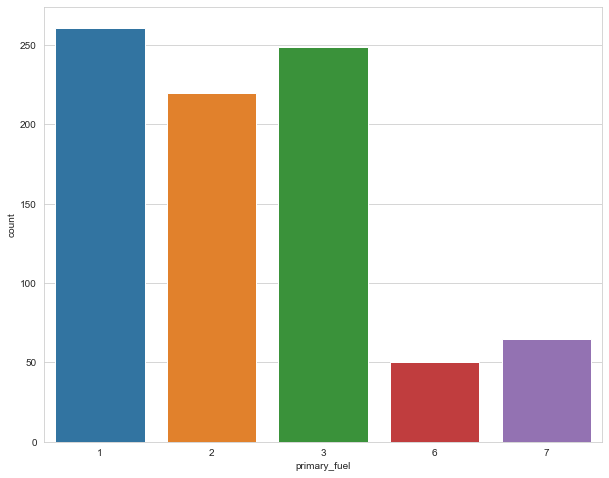

In [195]:
plt.figure(figsize=(10,8))
sns.countplot(x=y,data=y)
y.value_counts()

### Data is Imbalanced we will use SMOTE technique

In [196]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [199]:
y.value_counts()

6    232
1    232
7    232
2    232
3    232
0    232
5    232
4    232
Name: primary_fuel, dtype: int64

# We are use the classification Model

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [201]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [202]:
x.shape

(1856, 5)

In [203]:
y.shape

(1856,)

In [205]:
print("X_Train",x_train.shape,"X_Test",x_test.shape)

X_Train (1484, 5) X_Test (372, 5)


In [206]:
print("Y_train",y_train.shape,"Y_test",y_test.shape)

Y_train (1484,) Y_test (372,)


# Model Selection

----------------------

# Model1: Decision Tree Classifier

In [207]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

#train and score
dtc.fit(x_train,y_train)
dtc_score=dtc.score(x_train,y_train)

#predict
pred_train=dtc.predict(x_train)
pred_test=dtc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_test,pred_test),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test),)

Accuracy Training Score = 1.0  Accuracy Test Score = 0.7634408602150538 

Training Confusion_Matrix 
 [[45  0  0  0  0  0  3  3]
 [ 4 21  2  1  3  0  2  6]
 [ 0  3 24  8  0  0  1  1]
 [ 0  5  7 31  0  0  1  0]
 [ 0  0  0  0 46  0  0  0]
 [ 0  2  2  1  0 43  1  0]
 [ 9  6  0  0  0  0 38  5]
 [ 4  4  0  0  0  0  4 36]] Testing Confusion_Matrix 
 [[45  0  0  0  0  0  3  3]
 [ 4 21  2  1  3  0  2  6]
 [ 0  3 24  8  0  0  1  1]
 [ 0  5  7 31  0  0  1  0]
 [ 0  0  0  0 46  0  0  0]
 [ 0  2  2  1  0 43  1  0]
 [ 9  6  0  0  0  0 38  5]
 [ 4  4  0  0  0  0  4 36]]
Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.88      0.80        51
           1       0.51      0.54      0.53        39
           2       0.69      0.65      0.67        37
           3       0.76      0.70      0.73        44
           4       0.94      1.00      0.97        46
           5       1.00      0.88      0.93        49
           6       0.76      0.66 

## Model Cross Validation Score

In [208]:
from sklearn.model_selection import cross_val_score

train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

for i in range(2,10):
    cv_score=cross_val_score(dtc,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.7467672413793103 Training Score  1.0 Testing Score  0.7634408602150538
A cross-fold  3 CV_mean  0.7527016641309974 Training Score  1.0 Testing Score  0.7634408602150538
A cross-fold  4 CV_mean  0.7629310344827587 Training Score  1.0 Testing Score  0.7634408602150538
A cross-fold  5 CV_mean  0.7715589948700113 Training Score  1.0 Testing Score  0.7634408602150538
A cross-fold  6 CV_mean  0.7904269756759579 Training Score  1.0 Testing Score  0.7634408602150538
A cross-fold  7 CV_mean  0.7785582554769673 Training Score  1.0 Testing Score  0.7634408602150538
A cross-fold  8 CV_mean  0.7693965517241379 Training Score  1.0 Testing Score  0.7634408602150538
A cross-fold  9 CV_mean  0.7721182558666729 Training Score  1.0 Testing Score  0.7634408602150538


#### Selected Cross_Fold  , as Cv_score is close to training Score

In [209]:
from sklearn.model_selection import cross_val_score

# accuracy score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#score and mean
cv_score =cross_val_score(dtc,x,y,cv=6)
cv_mean  =cv_score.mean()

# result
print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  9 CV_mean  0.7898928211017155 Training Score  1.0 Testing Score  0.7634408602150538


### Model Score

In [210]:
from sklearn.metrics import roc_auc_score
y_pred_proba=dtc.predict_proba(x_test)
y_pred_proba

roc_auc_score(y_test,y_pred_proba,multi_class='ovr')

0.8616670949280334

In [211]:
y_pred_proba

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [212]:
print("Decision Tree Model Score ", roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

Decision Tree Model Score  0.8616670949280334


# Model2 :Kneighbors Classifier

In [213]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()

# train and score
knc.fit(x_train,y_train)
knc_score=knc.score(x_train,y_train)

#predict
pred_train= knc.predict(x_train)
pred_test = knc.predict(x_test)

#result
print("Training Score",knc_score)
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_test,pred_test),"\n","Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test),)

Training Score 0.8450134770889488
Accuracy Training Score = 0.8450134770889488  Accuracy Test Score = 0.7580645161290323 

Training Confusion_Matrix 
 [[46  0  0  0  0  1  4  0]
 [ 5 15  4  1  7  0  0  7]
 [ 1  3 27  2  1  2  0  1]
 [ 0  3  8 28  3  2  0  0]
 [ 0  0  0  2 44  0  0  0]
 [ 0  1  0  0  0 47  0  1]
 [10  0  1  0  0  0 44  3]
 [ 8  1  0  0  0  0  8 31]] 
 Testing Confusion_Matrix 
 [[46  0  0  0  0  1  4  0]
 [ 5 15  4  1  7  0  0  7]
 [ 1  3 27  2  1  2  0  1]
 [ 0  3  8 28  3  2  0  0]
 [ 0  0  0  2 44  0  0  0]
 [ 0  1  0  0  0 47  0  1]
 [10  0  1  0  0  0 44  3]
 [ 8  1  0  0  0  0  8 31]]
Classification Report 
               precision    recall  f1-score   support

           0       0.66      0.90      0.76        51
           1       0.65      0.38      0.48        39
           2       0.68      0.73      0.70        37
           3       0.85      0.64      0.73        44
           4       0.80      0.96      0.87        46
           5       0.90      0.96    

## Model Cross Validation

In [215]:
from sklearn.model_selection import cross_val_score

train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

for i in range(2,10):
    cv_score=cross_val_score(knc,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.7602370689655172 Training Score  0.8450134770889488 Testing Score  0.7580645161290323
A cross-fold  3 CV_mean  0.7731778471383534 Training Score  0.8450134770889488 Testing Score  0.7580645161290323
A cross-fold  4 CV_mean  0.78125 Training Score  0.8450134770889488 Testing Score  0.7580645161290323
A cross-fold  5 CV_mean  0.7801727386024405 Training Score  0.8450134770889488 Testing Score  0.7580645161290323
A cross-fold  6 CV_mean  0.7888140724501512 Training Score  0.8450134770889488 Testing Score  0.7580645161290323
A cross-fold  7 CV_mean  0.7844942545041851 Training Score  0.8450134770889488 Testing Score  0.7580645161290323
A cross-fold  8 CV_mean  0.7850215517241379 Training Score  0.8450134770889488 Testing Score  0.7580645161290323
A cross-fold  9 CV_mean  0.7904335318856214 Training Score  0.8450134770889488 Testing Score  0.7580645161290323


#### Selected Cross_Fold 9  , as Cv_score is close to training Score

In [216]:
#cross val score(K_neighbors)
knc_cv_score=cross_val_score(knc,x,y,cv=9) # cv_score is near to training score
knc_mean=knc_cv_score.mean()

#predict result
print(" Cross Validation_mean ",knc_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

 Cross Validation_mean  0.7904335318856214 Training Score  0.8450134770889488 Testing Score  0.7580645161290323


### Model AUC_ROC_Score

In [217]:
from sklearn.metrics import roc_auc_score

y_pred_proba=knc.predict_proba(x_test)
y_pred_proba

array([[0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0.2, 0. , ..., 0. , 0. , 0. ],
       [0. , 0.2, 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.2, 0.8],
       [0. , 0. , 0.6, ..., 0. , 0. , 0. ]])

In [218]:
print("Model KNeighbour ROC_AUC Score ",roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

Model KNeighbour ROC_AUC Score  0.9352069943255293


# Model3:  Support Vector Machine

In [219]:
from sklearn.svm import SVC
svc=SVC()

#train and score
svc.fit(x_train,y_train)
svc_score=svc.score(x_train,y_train)

# predict
pred_train=svc.predict(x_train)
pred_test=svc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_test,pred_test),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test),)

Accuracy Training Score = 0.6637466307277629  Accuracy Test Score = 0.6182795698924731 

Training Confusion_Matrix 
 [[51  0  0  0  0  0  0  0]
 [13 12  4  1  7  0  0  2]
 [ 3  3 23  0  3  5  0  0]
 [ 0  5  8 25  4  2  0  0]
 [ 0  0  4  1 41  0  0  0]
 [16  0  0  1  0 32  0  0]
 [16  0  0  0  0  1 38  3]
 [31  0  0  0  0  3  6  8]] Testing Confusion_Matrix 
 [[51  0  0  0  0  0  0  0]
 [13 12  4  1  7  0  0  2]
 [ 3  3 23  0  3  5  0  0]
 [ 0  5  8 25  4  2  0  0]
 [ 0  0  4  1 41  0  0  0]
 [16  0  0  1  0 32  0  0]
 [16  0  0  0  0  1 38  3]
 [31  0  0  0  0  3  6  8]]
Classification Report 
               precision    recall  f1-score   support

           0       0.39      1.00      0.56        51
           1       0.60      0.31      0.41        39
           2       0.59      0.62      0.61        37
           3       0.89      0.57      0.69        44
           4       0.75      0.89      0.81        46
           5       0.74      0.65      0.70        49
           6       

In [220]:
from sklearn.model_selection import cross_val_score
#score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val 
for i in range(2,6):
    cv_svc_score=cross_val_score(svc,x,y,cv=i)
    cv_mean=cv_svc_score.mean()    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.6239224137931034 Training Score  0.6637466307277629 Testing Score  0.6182795698924731
A cross-fold  3 CV_mean  0.6347059059310263 Training Score  0.6637466307277629 Testing Score  0.6182795698924731
A cross-fold  4 CV_mean  0.6400862068965517 Training Score  0.6637466307277629 Testing Score  0.6182795698924731
A cross-fold  5 CV_mean  0.6449366721734341 Training Score  0.6637466307277629 Testing Score  0.6182795698924731


In [221]:
#cross val score
svc_cv_score=cross_val_score(svc,x,y,cv=5)
svc_mean=svc_cv_score.mean()

print(" CV_mean ",svc_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

 CV_mean  0.6449366721734341 Training Score  0.6637466307277629 Testing Score  0.6182795698924731


### Score prediction doesn't work for SVC Model graph

# Ensamble Technique

# Extra Trees Classifier

In [224]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()

# train and score
etc.fit(x_train,y_train)
etc_score=etc.score(x_train,y_train)

#predict
pred_train=etc.predict(x_train)
pred_test=etc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 1.0  Accuracy Test Score = 0.8118279569892473 

Training Confusion_Matrix 
 [[181   0   0   0   0   0   0   0]
 [  0 193   0   0   0   0   0   0]
 [  0   0 195   0   0   0   0   0]
 [  0   0   0 188   0   0   0   0]
 [  0   0   0   0 186   0   0   0]
 [  0   0   0   0   0 183   0   0]
 [  0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0 184]] Testing Confusion_Matrix 
 [[48  1  0  0  0  0  1  1]
 [ 4 19  2  2  5  0  0  7]
 [ 1  3 29  2  1  0  0  1]
 [ 0  4  5 33  1  1  0  0]
 [ 0  0  0  0 46  0  0  0]
 [ 0  0  2  0  0 47  0  0]
 [ 9  2  0  0  0  0 43  4]
 [ 4  3  0  0  0  0  4 37]]
Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.94      0.82        51
           1       0.59      0.49      0.54        39
           2       0.76      0.78      0.77        37
           3       0.89      0.75      0.81        44
           4       0.87      1.00      0.93        46
           5       0.98 

### Cross-Validation Extra Trees Classifier

In [225]:
from sklearn.model_selection import cross_val_score
#
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,20):
    cv_etc_score=cross_val_score(etc,x,y,cv=i)
    cv_mean=cv_etc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.8351293103448276 Training Score  1.0 Testing Score  0.8118279569892473
A cross-fold  3 CV_mean  0.830282687914007 Training Score  1.0 Testing Score  0.8118279569892473
A cross-fold  4 CV_mean  0.8345905172413793 Training Score  1.0 Testing Score  0.8118279569892473
A cross-fold  5 CV_mean  0.8297394429469902 Training Score  1.0 Testing Score  0.8118279569892473
A cross-fold  6 CV_mean  0.8335195044715871 Training Score  1.0 Testing Score  0.8118279569892473
A cross-fold  7 CV_mean  0.8302839308513874 Training Score  1.0 Testing Score  0.8118279569892473
A cross-fold  8 CV_mean  0.8318965517241379 Training Score  1.0 Testing Score  0.8118279569892473
A cross-fold  9 CV_mean  0.8367702161145245 Training Score  1.0 Testing Score  0.8118279569892473
A cross-fold  10 CV_mean  0.8324469630921243 Training Score  1.0 Testing Score  0.8118279569892473
A cross-fold  11 CV_mean  0.8367754040830964 Training Score  1.0 Testing Score  0.8118279569892473
A cross-fold  12 CV

### Slected Cross Fold 11 as cross val score is close to training score

In [228]:
#etc_predict test

etc_test=etc.predict(x_test)

#cross val score
etc_cv_score=cross_val_score(etc,x,y,cv=18)
etc_mean=etc_cv_score.mean()

print(" CV_mean ",etc_mean,"Testing Accuracy Score ",accuracy_score(y_test,etc_test))

 CV_mean  0.8432287776947972 Testing Accuracy Score  0.8118279569892473


### Model Training Score

In [226]:
from sklearn.metrics import roc_auc_score

y_predict_proba=etc.predict_proba(x_test)
y_predict_proba

array([[0.  , 0.  , 0.  , ..., 0.  , 0.8 , 0.2 ],
       [0.  , 0.31, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.04, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.92, 0.01, ..., 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.  , ..., 0.  , 0.15, 0.84],
       [0.  , 0.19, 0.42, ..., 0.  , 0.  , 0.  ]])

In [232]:
print("Model Extra Trees Classifier Train Score",roc_auc_score(y_test,y_predict_proba,multi_class='ovr'))

Model Extra Trees Classifier Train Score 0.9648019116628898


# MLP Classifier

In [233]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()

#train
mlp.fit(x_train,y_train)
mlp_score=mlp.score(x_train,y_train)

#predict
pred_train=mlp.predict(x_train)
pred_test=mlp.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.7675202156334232  Accuracy Test Score = 0.7016129032258065 

Training Confusion_Matrix 
 [[151   0   0   0   0   2   0  28]
 [ 20 118  15  10  11  11   2   6]
 [  4   4 134   7  10  32   0   4]
 [  0  12  21 145   6   4   0   0]
 [  0   0   2   0 184   0   0   0]
 [  1   4   0   4   0 173   0   1]
 [ 20   0   0   1   0   3 129  21]
 [ 42   4   0   0   0  12  21 105]] Testing Confusion_Matrix 
 [[45  0  0  0  0  1  0  5]
 [ 4 16  4  1  6  2  1  5]
 [ 1  3 24  1  2  4  0  2]
 [ 0  4  9 28  0  3  0  0]
 [ 0  0  0  1 45  0  0  0]
 [ 1  0  0  1  0 46  0  1]
 [11  0  0  0  0  0 40  7]
 [17  0  0  0  0  8  6 17]]
Classification Report 
               precision    recall  f1-score   support

           0       0.57      0.88      0.69        51
           1       0.70      0.41      0.52        39
           2       0.65      0.65      0.65        37
           3       0.88      0.64      0.74        44
           4       0.85      0.98      0.91        46
         

## Model Cross Validation Score

In [234]:
from sklearn.model_selection import cross_val_score

train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,20):
    cv_mlp_score=cross_val_score(mlp,x,y,cv=i)
    cv_mean=cv_mlp_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.6794181034482758 Training Score  0.7675202156334232 Testing Score  0.7016129032258065
A cross-fold  3 CV_mean  0.7096057426374097 Training Score  0.7675202156334232 Testing Score  0.7016129032258065
A cross-fold  4 CV_mean  0.7176724137931034 Training Score  0.7675202156334232 Testing Score  0.7016129032258065
A cross-fold  5 CV_mean  0.726316552183868 Training Score  0.7675202156334232 Testing Score  0.7016129032258065
A cross-fold  6 CV_mean  0.7241517903747782 Training Score  0.7675202156334232 Testing Score  0.7016129032258065
A cross-fold  7 CV_mean  0.7279330401475387 Training Score  0.7675202156334232 Testing Score  0.7016129032258065
A cross-fold  8 CV_mean  0.7182112068965517 Training Score  0.7675202156334232 Testing Score  0.7016129032258065
A cross-fold  9 CV_mean  0.7279286462486125 Training Score  0.7675202156334232 Testing Score  0.7016129032258065
A cross-fold  10 CV_mean  0.7381836675385063 Training Score  0.7675202156334232 Testing Score  0.

### Selecting Cross Fold  7 as Training score is close to cross Val score 

In [235]:
from sklearn.model_selection import cross_val_score
#mlp_predict test
mlp_test=mlp.predict(x_test)

#cross val score
mlp_cv_score=cross_val_score(mlp,x,y,cv=7)
cv_mean=mlp_cv_score.mean()

print(" CV_mean ",cv_mean,"Testing Accuracy Score ",accuracy_score(y_test,mlp_test))

 CV_mean  0.7306284579372961 Testing Accuracy Score  0.7016129032258065


## MLP AUC_ROC_Score

In [236]:
from sklearn.metrics import roc_auc_score
y_pred_proba=mlp.predict_proba(x_test)
y_pred_proba

array([[1.73339338e-02, 6.60276572e-03, 7.41840394e-03, ...,
        1.82492087e-02, 8.61282738e-01, 8.91084548e-02],
       [2.51298160e-10, 1.09618582e-01, 1.08903001e-03, ...,
        1.87814725e-10, 4.87739213e-08, 2.25936895e-06],
       [2.05020348e-09, 2.99777248e-02, 5.43235514e-02, ...,
        6.52270460e-05, 5.55129209e-07, 2.33494465e-05],
       ...,
       [5.25750200e-11, 8.62020901e-01, 9.02490821e-02, ...,
        1.65503792e-06, 3.17069174e-03, 2.84462142e-06],
       [1.44766125e-01, 2.27239172e-02, 5.64397715e-04, ...,
        3.70816457e-05, 3.22541998e-01, 5.09259519e-01],
       [1.23132939e-07, 2.27945049e-01, 4.14551940e-01, ...,
        1.35783476e-05, 1.01287872e-04, 6.59973386e-06]])

In [237]:
print("MLP Modal Score",roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

MLP Modal Score 0.9440421135858102


# Ada Boost Classifier

In [238]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

ada.fit(x_train,y_train)
ada_score=ada.score(x_train,y_train)

#predict
pred_train=ada.predict(x_train)
pred_test=ada.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.3160377358490566  Accuracy Test Score = 0.27419354838709675 

Training Confusion_Matrix 
 [[  0   0   0   0   0   0   0 181]
 [  0   3  91  23  40   2   0  34]
 [  0   0 130  31   7   0   0  27]
 [  0   0  68 106   1  13   0   0]
 [  0  15  23  96  52   0   0   0]
 [  0   0 106  16   0   0   0  61]
 [  0   0   6   0   0   0   0 168]
 [  0   0   6   0   0   0   0 178]] Testing Confusion_Matrix 
 [[ 0  0  0  0  0  0  0 51]
 [ 0  0 14  8  5  1  0 11]
 [ 0  0 20  9  2  0  0  6]
 [ 0  0 16 23  1  4  0  0]
 [ 0  3  9 22 12  0  0  0]
 [ 0  0 23  9  0  0  0 17]
 [ 0  0  2  0  0  0  0 56]
 [ 0  0  1  0  0  0  0 47]]
Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.00      0.00      0.00        39
           2       0.24      0.54      0.33        37
           3       0.32      0.52      0.40        44
           4       0.60      0.26      0.36        46
        

## Model Cross Validation

In [239]:
from sklearn.model_selection import cross_val_score

#train and score for Ada Boost
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val for Ada Boost
for i in range(2,10):
    cv_ada_score=cross_val_score(ada,x,y,cv=i)
    cv_mean=cv_ada_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.3011853448275862 Training Score  0.3160377358490566 Testing Score  0.27419354838709675
A cross-fold  3 CV_mean  0.3087321130751656 Training Score  0.3160377358490566 Testing Score  0.27419354838709675
A cross-fold  4 CV_mean  0.31034482758620685 Training Score  0.3160377358490566 Testing Score  0.27419354838709675
A cross-fold  5 CV_mean  0.29956960264324844 Training Score  0.3160377358490566 Testing Score  0.27419354838709675
A cross-fold  6 CV_mean  0.2952674252705571 Training Score  0.3160377358490566 Testing Score  0.27419354838709675
A cross-fold  7 CV_mean  0.2947267089556776 Training Score  0.3160377358490566 Testing Score  0.27419354838709675
A cross-fold  8 CV_mean  0.2957974137931034 Training Score  0.3160377358490566 Testing Score  0.27419354838709675
A cross-fold  9 CV_mean  0.29741673571700306 Training Score  0.3160377358490566 Testing Score  0.27419354838709675


### Slected Cross fold as cv score is close to training score

In [240]:
#Model_predict test
ada_test=ada.predict(x_test)

#cross val score
ada_cv_score=cross_val_score(ada,x,y,cv=4) #accuracy score is low 
ada_mean=ada_cv_score.mean()

print(" CV_mean ",ada_mean,"Testing Accuracy Score ",accuracy_score(y_test,ada_test))

 CV_mean  0.31034482758620685 Testing Accuracy Score  0.27419354838709675


### Modal Ada Boost Classifier

In [241]:
from sklearn.metrics import roc_auc_score
y_pred_proba=ada.predict_proba(x_test)
y_pred_proba

array([[1.69206778e-01, 1.63747000e-01, 1.62986967e-01, ...,
        1.65669053e-01, 1.69131230e-01, 1.69241110e-01],
       [1.77182623e-11, 1.79898875e-04, 9.89626325e-05, ...,
        6.62036175e-05, 6.36438166e-07, 3.30129441e-11],
       [2.97241867e-11, 9.78469199e-05, 9.65357948e-05, ...,
        1.11080741e-04, 1.06785740e-06, 5.53825707e-11],
       ...,
       [4.41975162e-06, 1.73241008e-01, 1.75056659e-01, ...,
        1.74124125e-01, 1.58867268e-01, 8.23937509e-06],
       [1.69206778e-01, 1.63747000e-01, 1.62986967e-01, ...,
        1.65669053e-01, 1.69131230e-01, 1.69241110e-01],
       [4.41975162e-06, 1.73241008e-01, 1.75056659e-01, ...,
        1.74124125e-01, 1.58867268e-01, 8.23937509e-06]])

In [242]:
print("Model Ada Boost Classifier",roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

Model Ada Boost Classifier 0.727349393282191


# Random Forest

In [243]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

rfc.fit(x_train,y_train)
rfc_score=rfc.score(x_train,y_train)

#predict
pred_train=rfc.predict(x_train)
pred_test=rfc.predict(x_test)
      
#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 1.0  Accuracy Test Score = 0.8064516129032258 

Training Confusion_Matrix 
 [[181   0   0   0   0   0   0   0]
 [  0 193   0   0   0   0   0   0]
 [  0   0 195   0   0   0   0   0]
 [  0   0   0 188   0   0   0   0]
 [  0   0   0   0 186   0   0   0]
 [  0   0   0   0   0 183   0   0]
 [  0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0 184]] Testing Confusion_Matrix 
 [[48  0  0  0  0  0  2  1]
 [ 4 19  2  2  4  0  1  7]
 [ 1  4 29  2  0  0  0  1]
 [ 0  5  5 32  1  1  0  0]
 [ 0  0  0  0 46  0  0  0]
 [ 0  0  2  0  0 47  0  0]
 [ 9  2  0  0  0  0 43  4]
 [ 2  5  0  0  0  0  5 36]]
Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.94      0.83        51
           1       0.54      0.49      0.51        39
           2       0.76      0.78      0.77        37
           3       0.89      0.73      0.80        44
           4       0.90      1.00      0.95        46
           5       0.98 

### Cross validation Score

In [244]:
from sklearn.model_selection import cross_val_score

#train and score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_rfc_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_rfc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.8238146551724137 Training Score  1.0 Testing Score  0.8064516129032258
A cross-fold  3 CV_mean  0.8270577696915197 Training Score  1.0 Testing Score  0.8064516129032258
A cross-fold  4 CV_mean  0.8216594827586207 Training Score  1.0 Testing Score  0.8064516129032258
A cross-fold  5 CV_mean  0.8265179839434251 Training Score  1.0 Testing Score  0.8064516129032258
A cross-fold  6 CV_mean  0.8254480286738352 Training Score  1.0 Testing Score  0.8064516129032258
A cross-fold  7 CV_mean  0.8238270879354721 Training Score  1.0 Testing Score  0.8064516129032258
A cross-fold  8 CV_mean  0.8227370689655172 Training Score  1.0 Testing Score  0.8064516129032258
A cross-fold  9 CV_mean  0.8324604328544106 Training Score  1.0 Testing Score  0.8064516129032258


### Selected Cross Fold as cv_score is close to training score

In [245]:
#rfc_predict test
rfc_test=rfc.predict(x_test)

# model cross val score
rfc_cv_score=cross_val_score(rfc,x,y,cv=9) #accuracy would increase with increase in fold
rfc_mean=rfc_cv_score.mean()# mean value

print(" CV_mean ",rfc_mean,"Testing Accuracy Score ",accuracy_score(y_test,rfc_test))

 CV_mean  0.8308501268962787 Testing Accuracy Score  0.8064516129032258


## Model AUC_ROC Score

In [246]:
from sklearn.metrics import roc_auc_score
y_pred_proba=rfc.predict_proba(x_test)
y_pred_proba

array([[0.  , 0.02, 0.01, ..., 0.  , 0.68, 0.29],
       [0.  , 0.11, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.05, 0.07, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.93, 0.01, ..., 0.  , 0.  , 0.  ],
       [0.03, 0.03, 0.  , ..., 0.  , 0.32, 0.62],
       [0.  , 0.22, 0.33, ..., 0.  , 0.  , 0.  ]])

In [247]:
print("Model Random Forest Classifier",roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

Model Random Forest Classifier 0.9673452258783546


# Gradient Booster

In [248]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

#train and score gradient Boosting Classifier
gbc.fit(x_train,y_train)
gbc_score=gbc.score(x_train,y_train)

#predict Gradient Boosting Classifier
pred_train=gbc.predict(x_train)
pred_test=gbc.predict(x_test)

#result gradient Boosting classifier
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.9703504043126685  Accuracy Test Score = 0.782258064516129 

Training Confusion_Matrix 
 [[179   0   1   0   0   0   0   1]
 [  5 177   0   0   0   2   1   8]
 [  1   1 191   0   1   0   0   1]
 [  0   1   2 185   0   0   0   0]
 [  0   0   0   0 186   0   0   0]
 [  0   1   0   0   0 181   0   1]
 [  4   2   0   0   0   0 164   4]
 [  3   2   0   0   0   1   1 177]] Testing Confusion_Matrix 
 [[48  0  0  0  0  0  1  2]
 [ 3 18  2  3  5  0  1  7]
 [ 1  5 25  2  0  2  0  2]
 [ 0  4  6 33  0  1  0  0]
 [ 0  0  1  1 44  0  0  0]
 [ 0  0  0  1  0 46  0  2]
 [ 9  3  1  0  0  0 43  2]
 [ 5  0  1  0  0  1  7 34]]
Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.94      0.82        51
           1       0.60      0.46      0.52        39
           2       0.69      0.68      0.68        37
           3       0.82      0.75      0.79        44
           4       0.90      0.96      0.93        46
          

## Model Cross Validation 

In [249]:
from sklearn.model_selection import cross_val_score

#predict model 
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_gbc_score=cross_val_score(gbc,x,y,cv=i)
    cv_mean=cv_gbc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.7704741379310345 Training Score  0.9703504043126685 Testing Score  0.782258064516129
A cross-fold  3 CV_mean  0.7764097362729668 Training Score  0.9703504043126685 Testing Score  0.782258064516129
A cross-fold  4 CV_mean  0.7817887931034483 Training Score  0.9703504043126685 Testing Score  0.782258064516129
A cross-fold  5 CV_mean  0.7904298176970117 Training Score  0.9703504043126685 Testing Score  0.782258064516129
A cross-fold  6 CV_mean  0.7936806208024497 Training Score  0.9703504043126685 Testing Score  0.782258064516129
A cross-fold  7 CV_mean  0.7947490018847658 Training Score  0.9703504043126685 Testing Score  0.782258064516129
A cross-fold  8 CV_mean  0.7990301724137931 Training Score  0.9703504043126685 Testing Score  0.782258064516129
A cross-fold  9 CV_mean  0.7942247862045244 Training Score  0.9703504043126685 Testing Score  0.782258064516129


### Model selected cross fold 8 as cv_score is close to training Score

In [250]:
#dtc_predict test
gbc_test=gbc.predict(x_test)

#cross val score
gbc_cv_score=cross_val_score(gbc,x,y,cv=8)
gbc_mean=gbc_cv_score.mean()

print(" CV_mean ",gbc_mean,"Testing Accuracy Score ",accuracy_score(y_test,gbc_test))

 CV_mean  0.7984913793103449 Testing Accuracy Score  0.782258064516129


### Model AUC_ROC Score

In [251]:
from sklearn.metrics import roc_auc_score
y_pred_proba = gbc.predict_proba(x_test)
y_pred_proba

array([[1.17081399e-03, 3.77990824e-03, 7.41453120e-03, ...,
        4.15891733e-04, 9.75054854e-01, 1.16887563e-02],
       [1.65631108e-04, 4.11195640e-02, 1.33840621e-03, ...,
        5.27102796e-04, 7.22700004e-04, 4.13165840e-04],
       [2.49368792e-04, 6.80393110e-03, 1.10974072e-02, ...,
        4.56184300e-03, 9.33539337e-04, 8.99128460e-04],
       ...,
       [6.85158389e-04, 9.38984970e-01, 2.25372530e-02, ...,
        7.10712211e-04, 2.38254068e-03, 3.43079450e-03],
       [2.32600863e-02, 9.35068124e-02, 1.37853364e-02, ...,
        4.07828635e-03, 4.53562233e-01, 4.05500845e-01],
       [4.01716137e-03, 1.22787000e-01, 2.58367961e-01, ...,
        1.25531218e-02, 1.49562774e-02, 1.89469867e-02]])

In [252]:
print("Model Gradient Booster Classifier ",roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

Model Gradient Booster Classifier  0.9590792699245039


# Using Best parameter (Hyper-Parameter)

- Random Forest Classifier
- Extra Trees Classifier 

* selected both Training and testing accuracy along cv is better then other models. ROC score is better

### Random Forest Classifier

In [255]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()

parameter={'criterion':['entropy','gini', 'log_loss'],
           'max_features':['None','sqrt', 'log2'],
          'class_weight':['balanced', 'balanced_subsample']}

gsv=GridSearchCV(rf,parameter,cv=9)
gsv.fit(x_train,y_train)

print("Best Score ",gsv.best_score_,"Best Params ",gsv.best_params_,)

Best Score  0.8281432208261477 Best Params  {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'sqrt'}


In [277]:
#import lib with best parameters
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(class_weight='balanced_subsample', criterion='gini',max_features='sqrt',min_samples_split=2,min_samples_leaf=1,
                          min_impurity_decrease=0.0000001,n_jobs=5)

#train model
rfc.fit(x_train,y_train)
rfc_score=rfc.score(x_train,y_train)

#predict
pred_train=rfc.predict(x_train)
pred_test=rfc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Testing Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 1.0  Accuracy Test Score = 0.803763440860215 

Training Confusion_Matrix 
 [[181   0   0   0   0   0   0   0]
 [  0 193   0   0   0   0   0   0]
 [  0   0 195   0   0   0   0   0]
 [  0   0   0 188   0   0   0   0]
 [  0   0   0   0 186   0   0   0]
 [  0   0   0   0   0 183   0   0]
 [  0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0 184]] Testing Confusion_Matrix 
 [[47  0  0  0  0  0  2  2]
 [ 4 18  3  2  4  0  1  7]
 [ 1  4 29  1  1  0  0  1]
 [ 0  5  6 32  0  1  0  0]
 [ 0  0  0  0 46  0  0  0]
 [ 0  0  2  0  0 47  0  0]
 [10  2  0  0  0  0 42  4]
 [ 2  4  0  0  0  0  4 38]]
Classification Testing Report 
               precision    recall  f1-score   support

           0       0.73      0.92      0.82        51
           1       0.55      0.46      0.50        39
           2       0.72      0.78      0.75        37
           3       0.91      0.73      0.81        44
           4       0.90      1.00      0.95        46
           5     

## Model Cross Val Score

In [278]:
from sklearn.model_selection import cross_val_score

#train and score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_rfc_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_rfc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.8248922413793103 Training Score  1.0 Testing Score  0.803763440860215
A cross-fold  3 CV_mean  0.8195091432226178 Training Score  1.0 Testing Score  0.803763440860215
A cross-fold  4 CV_mean  0.8216594827586208 Training Score  1.0 Testing Score  0.803763440860215
A cross-fold  5 CV_mean  0.8254456134249196 Training Score  1.0 Testing Score  0.803763440860215
A cross-fold  6 CV_mean  0.8249103942652329 Training Score  1.0 Testing Score  0.803763440860215
A cross-fold  7 CV_mean  0.8243681981233407 Training Score  1.0 Testing Score  0.803763440860215
A cross-fold  8 CV_mean  0.8232758620689655 Training Score  1.0 Testing Score  0.803763440860215
A cross-fold  9 CV_mean  0.833007624199407 Training Score  1.0 Testing Score  0.803763440860215


In [279]:
# Cross val score(Random Forest)
rfc_cv_score=cross_val_score(rfc,x,y,cv=9)#cv score would increase with cv increase
rfc_mean=rfc_cv_score.mean()

print(" CV_Score ",rfc_mean,"Testing Accuracy Score ",test_accuracy)

 CV_Score  0.8260061806565253 Testing Accuracy Score  0.803763440860215


In [280]:
from sklearn.metrics import roc_auc_score
y_pred_proba = rfc.predict_proba(x_test)
y_pred_proba

array([[0.  , 0.01, 0.04, ..., 0.  , 0.65, 0.3 ],
       [0.  , 0.18, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.06, 0.03, ..., 0.01, 0.  , 0.  ],
       ...,
       [0.  , 0.98, 0.01, ..., 0.  , 0.  , 0.  ],
       [0.04, 0.01, 0.  , ..., 0.  , 0.29, 0.66],
       [0.  , 0.2 , 0.31, ..., 0.  , 0.  , 0.  ]])

In [281]:
print("Model  Random Forest Classifier ",roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

Model  Random Forest Classifier  0.9653762213142689


# Model 2: By Hyper parameter

In [283]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

etc= ExtraTreesClassifier()

#Parameter  
parameters={'criterion':['gini', 'entropy', 'log_loss'],
           'max_features':['sqrt', 'log2','None'],
           'class_weight':['balanced','balanced_subsample'],
            'ccp_alpha':[0.0000001,0.0000001],
            'min_impurity_decrease':[0.00000001,0.0000001,0.0000001,0.000000001]}

gsv=GridSearchCV(etc,parameters,cv=18)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Best Parameter  {'ccp_alpha': 1e-07, 'class_weight': 'balanced_subsample', 'criterion': 'log_loss', 'max_features': 'log2', 'min_impurity_decrease': 1e-07} Best Score  0.8429163809710386


In [284]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(ccp_alpha= 1e-07, class_weight= 'balanced_subsample', criterion= 'log_loss', max_features= 'log2', 
                         min_impurity_decrease= 1e-07)

# train and score
etc.fit(x_train,y_train)
etc_score=etc.score(x_train,y_train)

#predict
pred_train=etc.predict(x_train)
pred_test=etc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 1.0  Accuracy Test Score = 0.803763440860215 

Training Confusion_Matrix 
 [[181   0   0   0   0   0   0   0]
 [  0 193   0   0   0   0   0   0]
 [  0   0 195   0   0   0   0   0]
 [  0   0   0 188   0   0   0   0]
 [  0   0   0   0 186   0   0   0]
 [  0   0   0   0   0 183   0   0]
 [  0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0 184]] Testing Confusion_Matrix 
 [[46  1  0  0  0  0  2  2]
 [ 4 18  2  3  5  0  0  7]
 [ 1  3 30  2  0  0  0  1]
 [ 0  4  5 33  1  1  0  0]
 [ 0  0  0  0 46  0  0  0]
 [ 0  0  1  0  0 47  1  0]
 [10  1  0  0  0  0 43  4]
 [ 4  4  0  0  0  0  4 36]]
Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.90      0.79        51
           1       0.58      0.46      0.51        39
           2       0.79      0.81      0.80        37
           3       0.87      0.75      0.80        44
           4       0.88      1.00      0.94        46
           5       0.98  

## Model Cross Validation

In [285]:
from sklearn.model_selection import cross_val_score

#train and score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_etc_score=cross_val_score(etc,x,y,cv=i)
    cv_mean=cv_etc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_Score ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_Score  0.834051724137931 Training Score  1.0 Testing Score  0.803763440860215
A cross-fold  3 CV_Score  0.8297502845003512 Training Score  1.0 Testing Score  0.803763440860215
A cross-fold  4 CV_Score  0.8313577586206897 Training Score  1.0 Testing Score  0.803763440860215
A cross-fold  5 CV_Score  0.8313581427701939 Training Score  1.0 Testing Score  0.803763440860215
A cross-fold  6 CV_Score  0.8351376274489334 Training Score  1.0 Testing Score  0.803763440860215
A cross-fold  7 CV_Score  0.8265143992055611 Training Score  1.0 Testing Score  0.803763440860215
A cross-fold  8 CV_Score  0.8313577586206896 Training Score  1.0 Testing Score  0.803763440860215
A cross-fold  9 CV_Score  0.8373121961133781 Training Score  1.0 Testing Score  0.803763440860215


### Selected Cross Fold  as cv_score is close to the training Score

In [286]:
# Cross val score(Random Forest)
etc_cv_score=cross_val_score(etc,x,y,cv=9)#cv score would increase with cv increase
etc_mean=etc_cv_score.mean()

print(" CV_Score ",etc_mean,"Testing Accuracy Score ",test_accuracy)

 CV_Score  0.8324578271813392 Testing Accuracy Score  0.803763440860215


### Model Score

In [289]:
from sklearn.metrics import roc_auc_score
y_pred_proba = etc.predict_proba(x_test)
y_pred_proba

array([[0.        , 0.        , 0.01      , ..., 0.        , 0.73      ,
        0.26      ],
       [0.        , 0.36      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03      , 0.03      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.87      , 0.02      , ..., 0.        , 0.        ,
        0.        ],
       [0.02      , 0.        , 0.        , ..., 0.        , 0.21027933,
        0.76972067],
       [0.        , 0.17      , 0.38490862, ..., 0.        , 0.        ,
        0.        ]])

In [290]:
print("Model Extra Trees Classifier ",roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

Model Extra Trees Classifier  0.9690540235664884


## However Extra Trees Models is working at the best of 97 percentage we will select it

- Selecting Extra Trees as Training score little better and cv score is better and auc_roc_score= 97%.

# Saving Model

In [291]:
import pickle
filename="Global_pred.pkl"
pickle.dump(etc, open(filename, 'wb'))

In [292]:
import pickle
model = pickle.load(open('Global_pred.pkl', 'rb'))
result=model.score(x_test,y_test)
print(result*100)

80.3763440860215


In [293]:
df2=pd.DataFrame([model.predict(x_test)[:],pred_test[:]],index=["Predicted","Original"])

In [294]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,...,359,360,361,362,363,364,365,366,367,368,369,370,371
Predicted,6,4,3,4,3,4,7,7,2,2,7,6,4,...,5,1,2,6,6,0,4,6,7,5,1,7,2
Original,6,4,3,4,3,4,7,7,2,2,7,6,4,...,5,1,2,6,6,0,4,6,7,5,1,7,2
